In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import fnmatch

import pandas as pd
import numpy as np
import cv2 as cv

from matplotlib import pyplot as plt
from skimage import feature
from skimage import measure
from skimage.filters import threshold_otsu

from sklearn import preprocessing

from scipy import ndimage

from skimage.feature import peak_local_max
from skimage.morphology import extrema
from skimage.measure import label
from skimage import color

import json

## Load Data

In [3]:
dest_path = "data\\sorted\\agg\\"
id_file_name = 'ids.csv'
json_file_name = 'img_data.json'

In [4]:
imgs = []

'''for file in os.listdir(dest_path):
    if fnmatch.fnmatch(file, '*.npy'):
        imgs.append(np.load(dest_path+file))

'''       

df = pd.read_csv(dest_path+id_file_name)

for path in df['name']:
    imgs.append(np.load(dest_path+path+".npy"))
    
imgs = np.array(imgs) 

In [5]:
print(imgs.shape)

(402, 991, 507)


## Peak Point

In [6]:
peak = imgs.max(1).max(1)
df['peak_val'] = peak
print(df.shape)

(402, 22)


## Drop other objects

Image Peak: 58.49642700829465
1


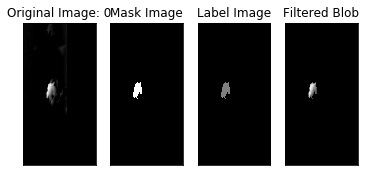

Image Peak: 5.237538121006949
1


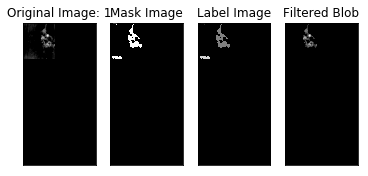

Image Peak: 16.62320607035906
1


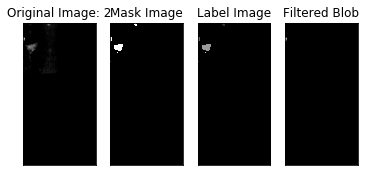

Image Peak: 12.46570728390383
1


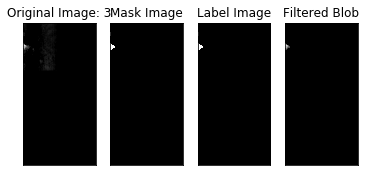

Image Peak: 4.629928019001791
1


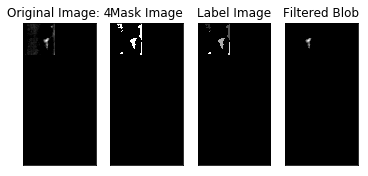

Image Peak: 16.393006355940962
2


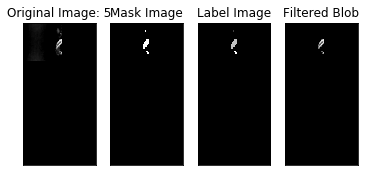

Image Peak: 9.703866893037896
1


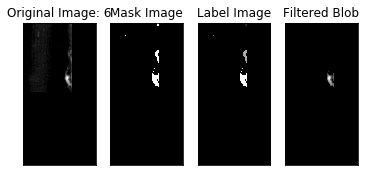

Image Peak: 11.378425482934961
2


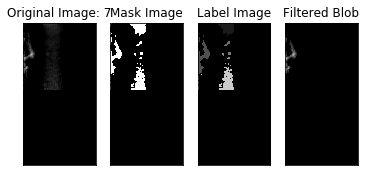

Image Peak: 8.153116362240594
1


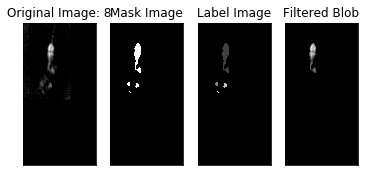

Image Peak: 3.6714341552634893
1


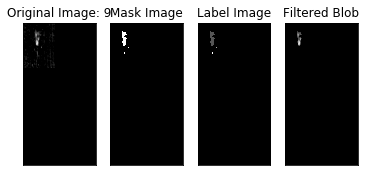

Image Peak: 10.871285495897926
1


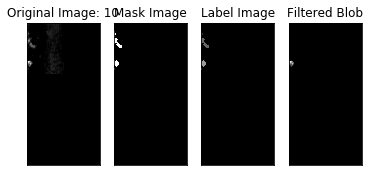

Image Peak: 14.033560248130104
1


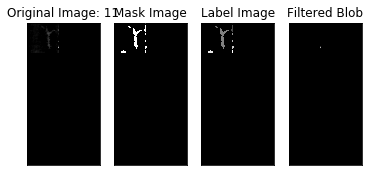

Image Peak: 12.532233608962418
1


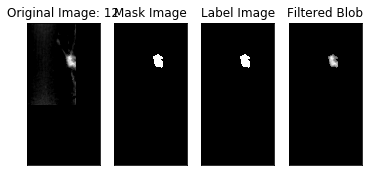

Image Peak: 8.268838206834436
1


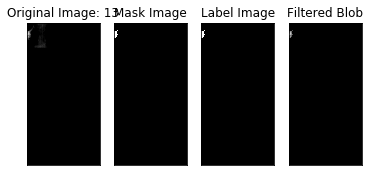

Image Peak: 23.74172035493951
1


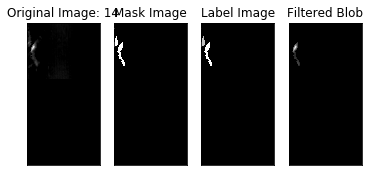

Image Peak: 3.819488585768213
2


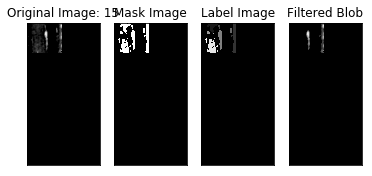

Image Peak: 11.008716866291715
3


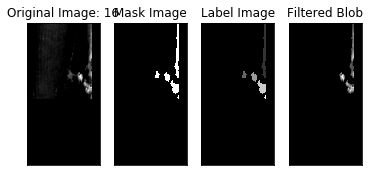

Image Peak: 16.551449326678124
3


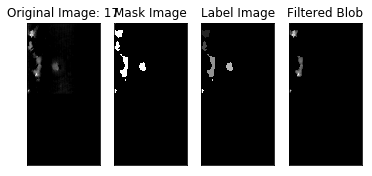

Image Peak: 20.959488868792405
1


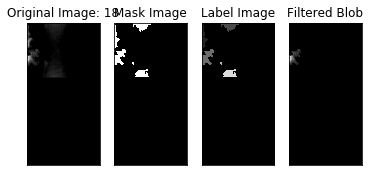

Image Peak: 3.982488475970104
1


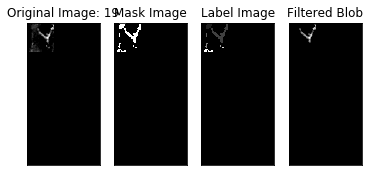

Image Peak: 12.160163422978558
1


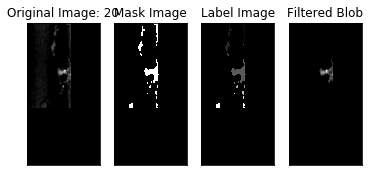

Image Peak: 7.8157163031173384
1


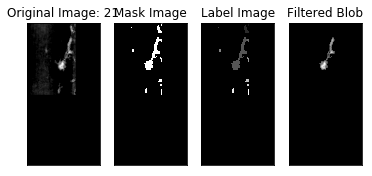

Image Peak: 7.134446682434441
1


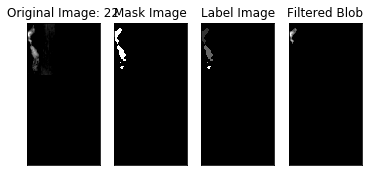

Image Peak: 3.3094165238391295
1


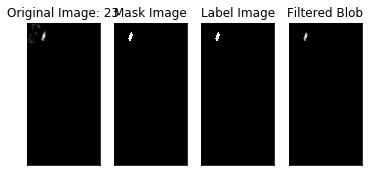

Image Peak: 6.088398059507494
1


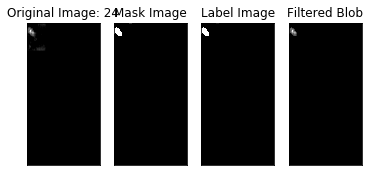

Image Peak: 1.9199000756059026
1


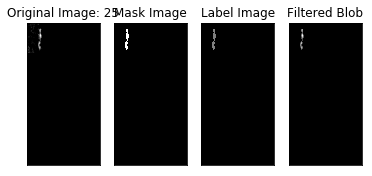

Image Peak: 5.242387856845691
1


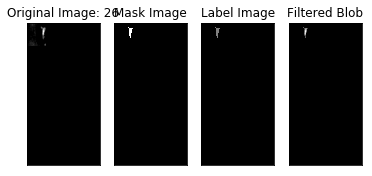

Image Peak: 3.4062183286179173
1


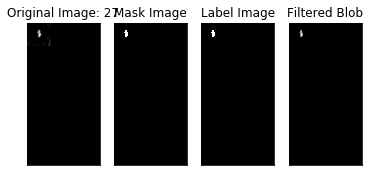

Image Peak: 13.20241124262862
1


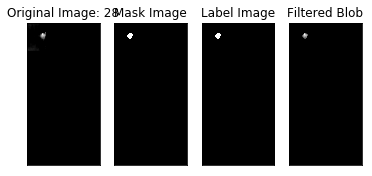

Image Peak: 9.239290807656184
1


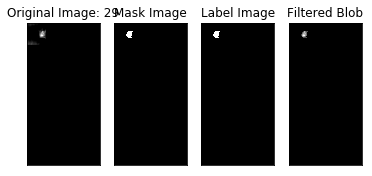

Image Peak: 6.529545868543843
1


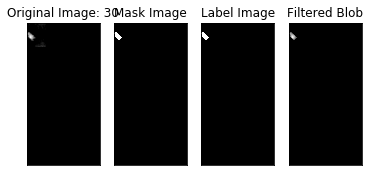

Image Peak: 10.356258068871899
1


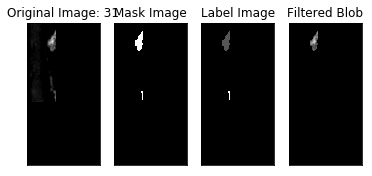

Image Peak: 8.839535604114765
1


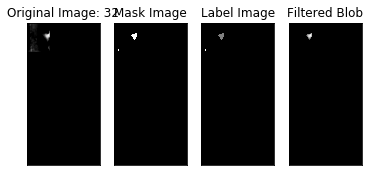

Image Peak: 9.412703235590431
1


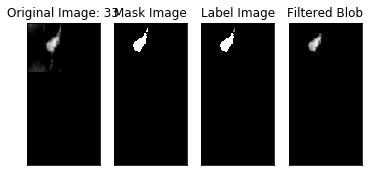

Image Peak: 23.32952685029605
1


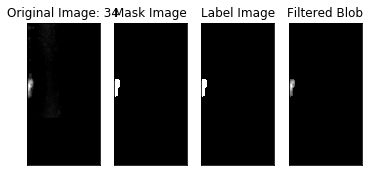

Image Peak: 4.824365871653022
1


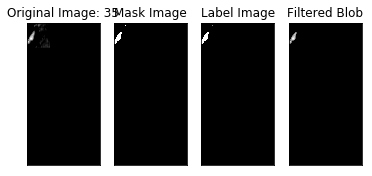

Image Peak: 11.271276816757181
1


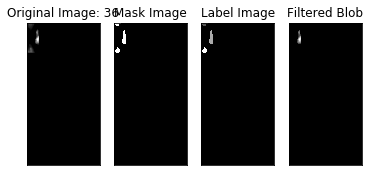

Image Peak: 6.683693048485441
1


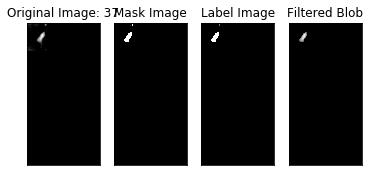

Image Peak: 3.9552961976172845
1


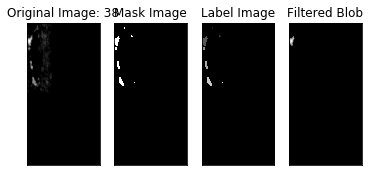

Image Peak: 5.700994552614695
2


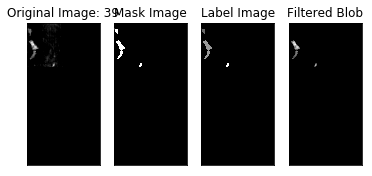

Image Peak: 6.070059487514487
1


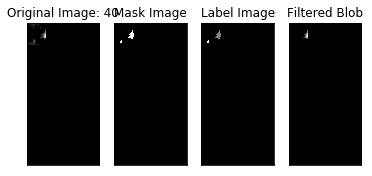

Image Peak: 9.925909262753832
1


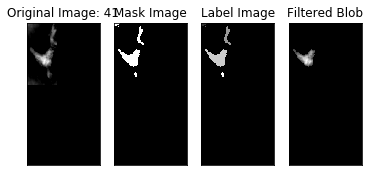

Image Peak: 12.553519206439061
1


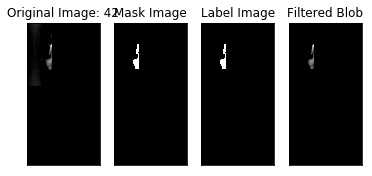

Image Peak: 4.504092426523356
1


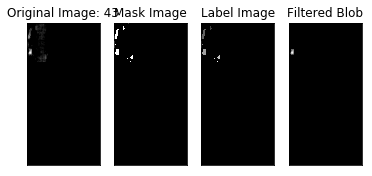

Image Peak: 6.920207247134636
1


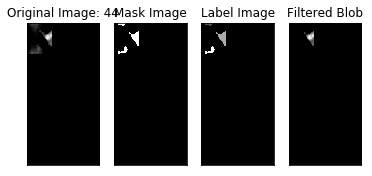

Image Peak: 13.746417390093809
1


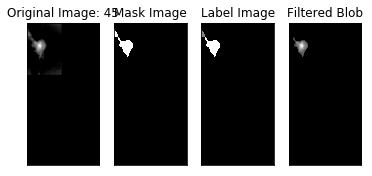

Image Peak: 4.974612448809016
1


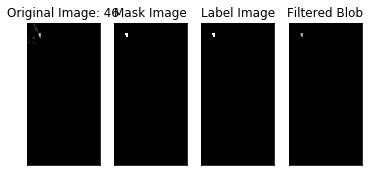

Image Peak: 4.989847275602248
1


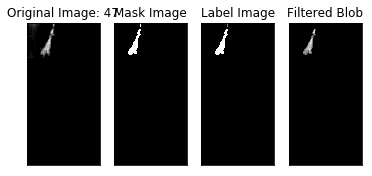

Image Peak: 8.641901406941251
1


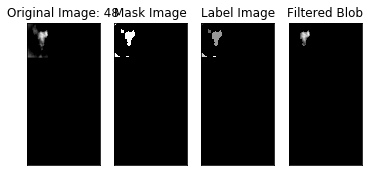

Image Peak: 28.533870011916466
2


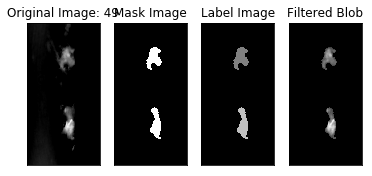

Image Peak: 10.05225399170304
1


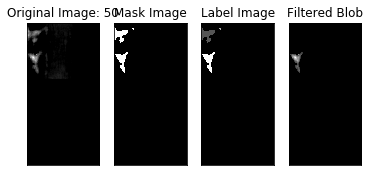

Image Peak: 4.661666312341646
1


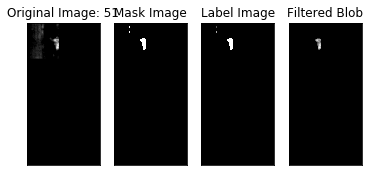

Image Peak: 7.665951287772606
1


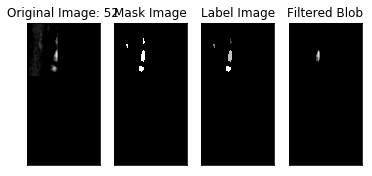

Image Peak: 8.094108541477432
1


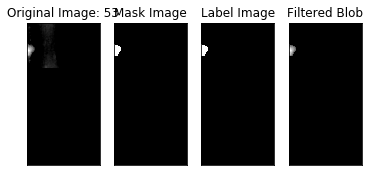

Image Peak: 6.917842953632238
1


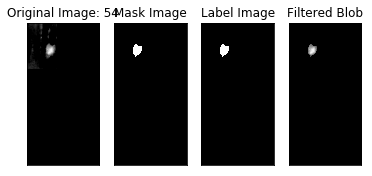

Image Peak: 7.769837578871186
1


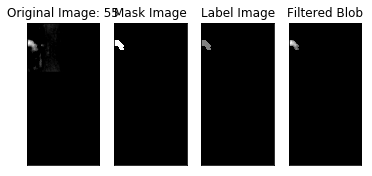

Image Peak: 1.2879390153188073
2


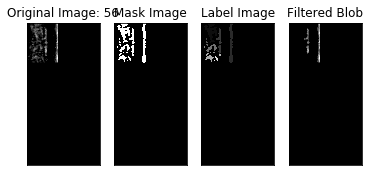

Image Peak: 11.109794863363959
1


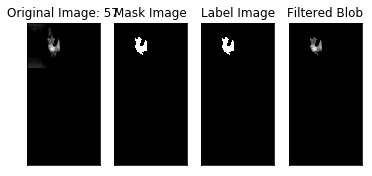

Image Peak: 6.398699626905022
1


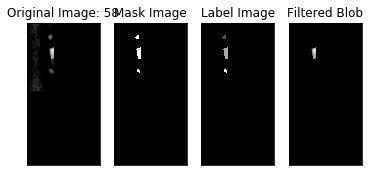

Image Peak: 19.513187167851356
2


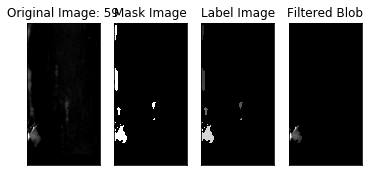

Image Peak: 7.290147646931412
2


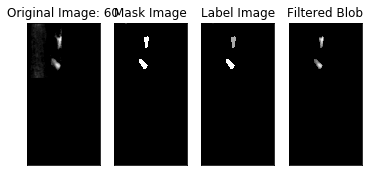

Image Peak: 5.209282121951803
1


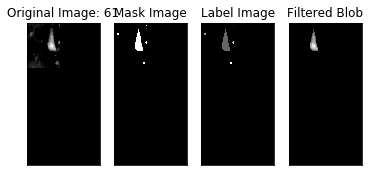

Image Peak: 8.905957866272942
1


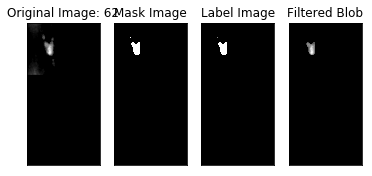

Image Peak: 9.828684560557534
3


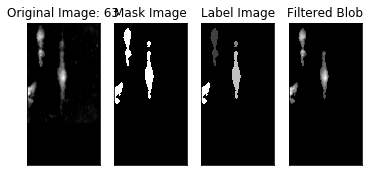

Image Peak: 4.952458361443391
1


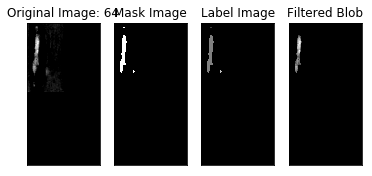

Image Peak: 10.346990574929585
1


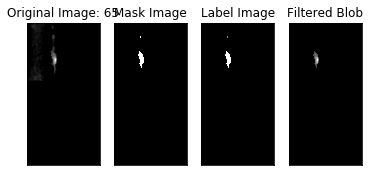

Image Peak: 4.064578278721073
1


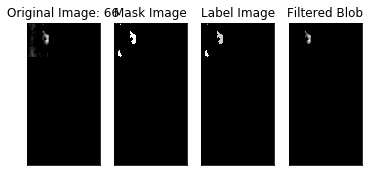

Image Peak: 16.901203306740932
1


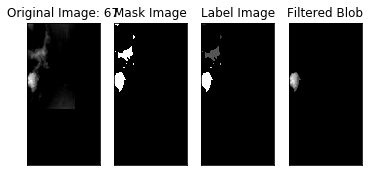

Image Peak: 8.174290755719358
2


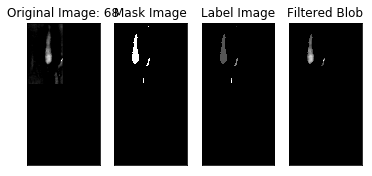

Image Peak: 10.1383714338767
1


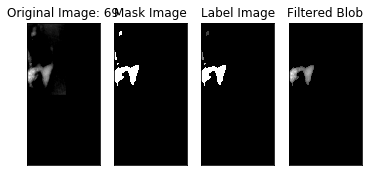

Image Peak: 6.696278146278006
1


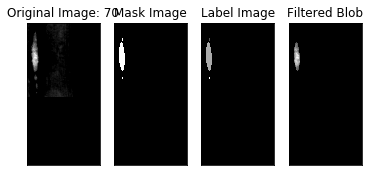

Image Peak: 8.459170296670704
1


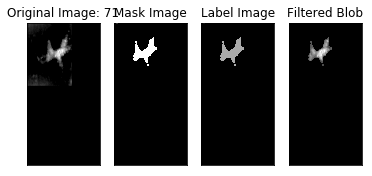

Image Peak: 6.577711384849547
1


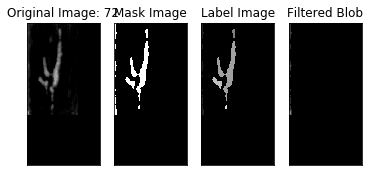

Image Peak: 8.775024211856886
1


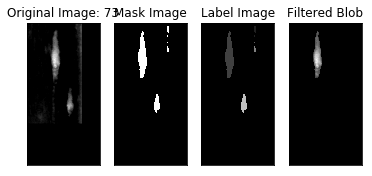

Image Peak: 11.714176343635462
1


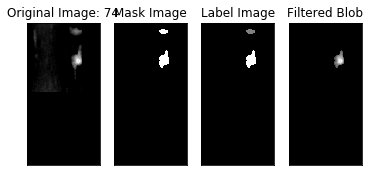

Image Peak: 12.802490968669064
2


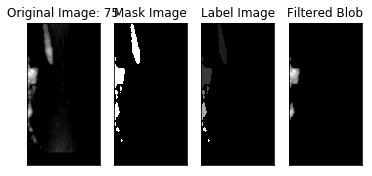

Image Peak: 9.708417504248098
1


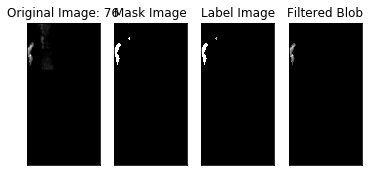

Image Peak: 8.562640871884144
1


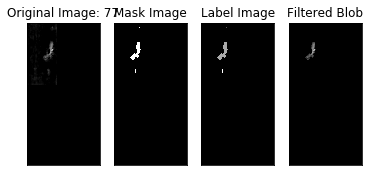

Image Peak: 5.9933282794282885
2


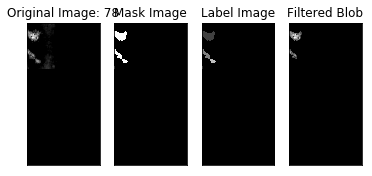

Image Peak: 18.74132920755083
1


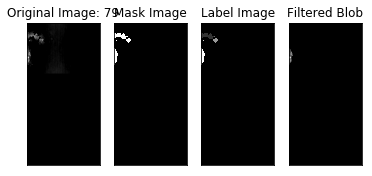

Image Peak: 22.062539887990535
1


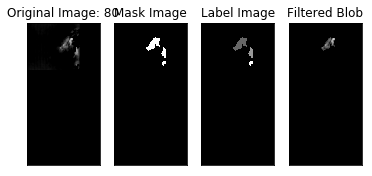

Image Peak: 11.283185624331786
1


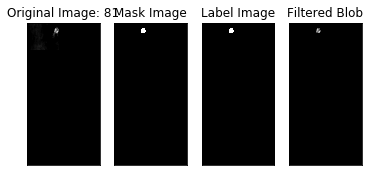

Image Peak: 11.061322698950633
1


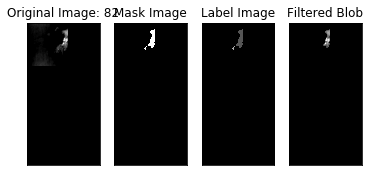

Image Peak: 11.694712894293003
1


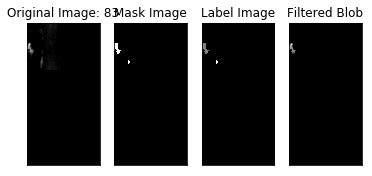

Image Peak: 21.4273353150707
1


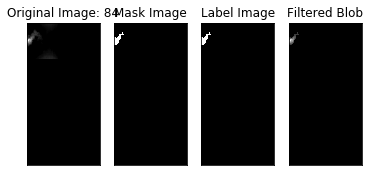

Image Peak: 5.58003284404962
1


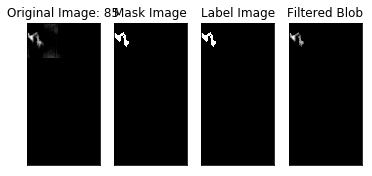

Image Peak: 15.963822535185086
1


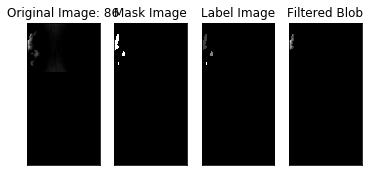

Image Peak: 5.980978848110395
1


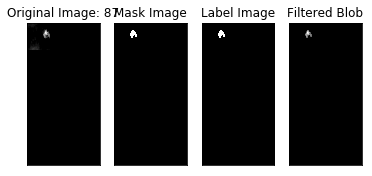

Image Peak: 33.704193471161716
1


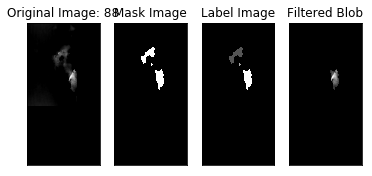

Image Peak: 5.347917948752371
1


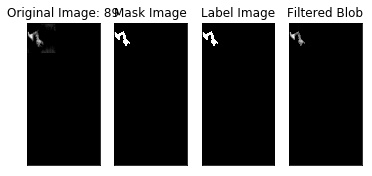

Image Peak: 8.81422772716142
1


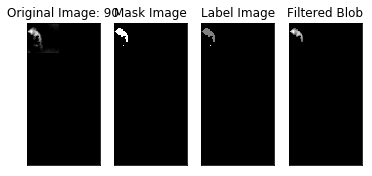

Image Peak: 8.279027545072038
1


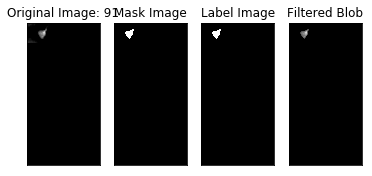

Image Peak: 4.982725421545554
2


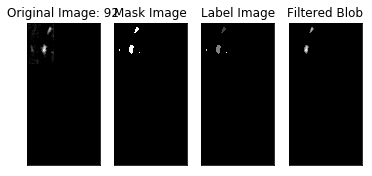

Image Peak: 5.070633700143265
1


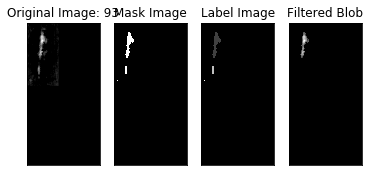

Image Peak: 12.097402292917083
1


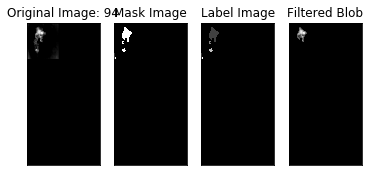

Image Peak: 4.640026532495113
1


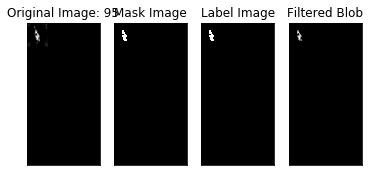

Image Peak: 3.2460031863698995
1


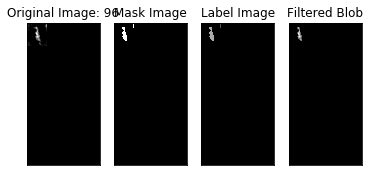

Image Peak: 5.141912525443123
1


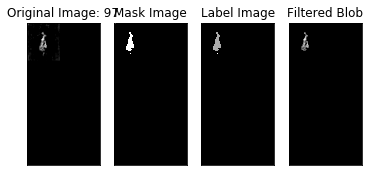

Image Peak: 9.21858955000867
1


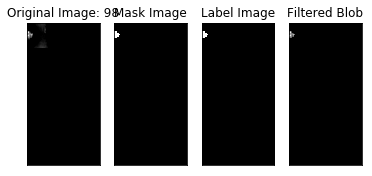

Image Peak: 7.249988854876749
1


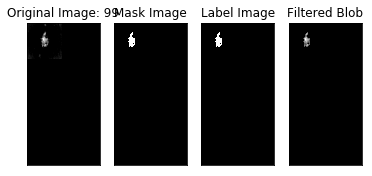

Image Peak: 9.073147527941423
2


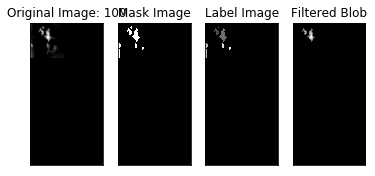

Image Peak: 16.06377324488988
1


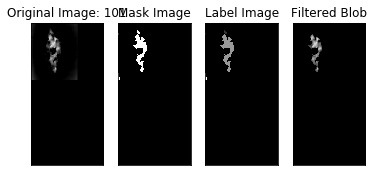

Image Peak: 4.499124143780264
2


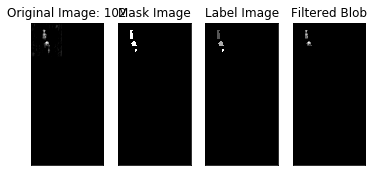

Image Peak: 11.424866068077968
1


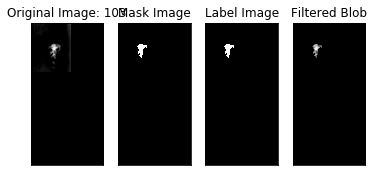

Image Peak: 11.985813173726694
1


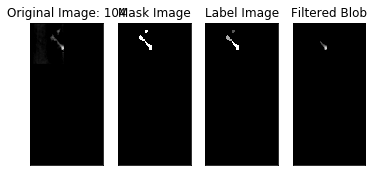

Image Peak: 9.31234703067937
2


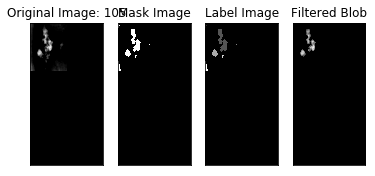

Image Peak: 7.24599017988489
1


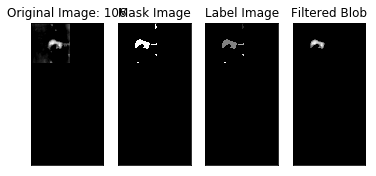

Image Peak: 12.887909418403153
2


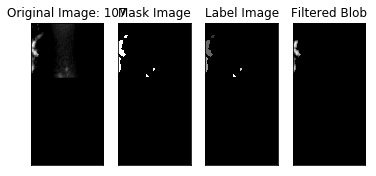

Image Peak: 20.34599397321767
1


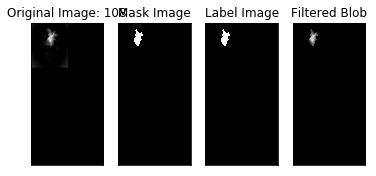

Image Peak: 5.670301764493
2


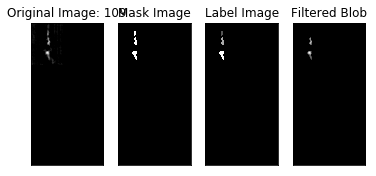

Image Peak: 16.187334416500182
1


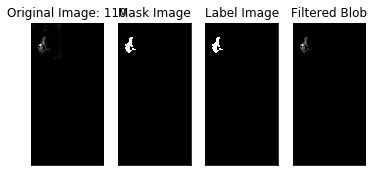

Image Peak: 34.36737079202217
2


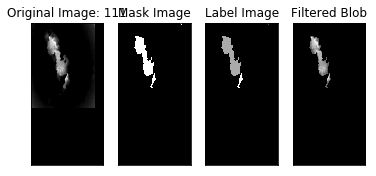

Image Peak: 14.088193555267202
1


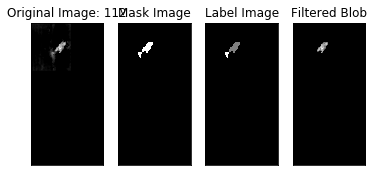

Image Peak: 7.070157384975791
1


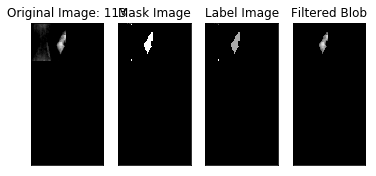

Image Peak: 11.334183918439027
1


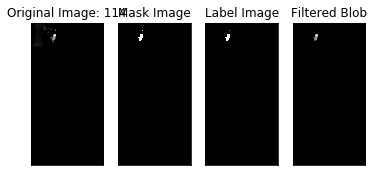

Image Peak: 5.874934795512158
1


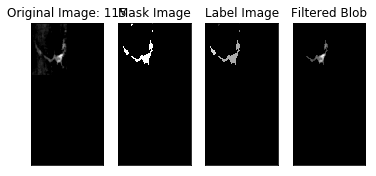

Image Peak: 3.8434988818471383
1


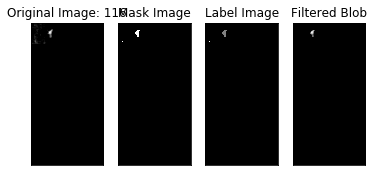

Image Peak: 6.171184118195622
1


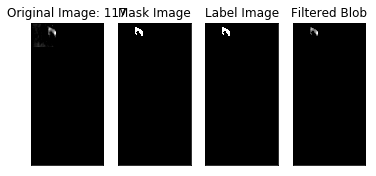

Image Peak: 8.531225680765928
1


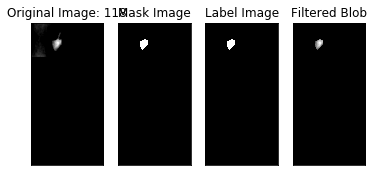

Image Peak: 6.317281805809348
1


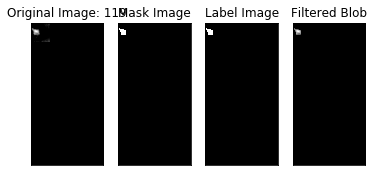

Image Peak: 4.854191841725597
1


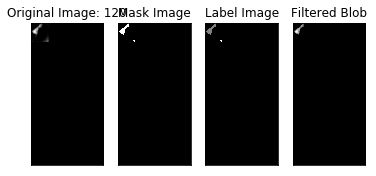

Image Peak: 6.432116047093833
1


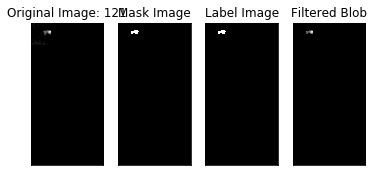

Image Peak: 4.319408942841026
1


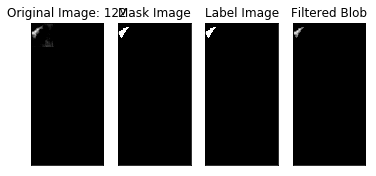

Image Peak: 6.571412586210204
1


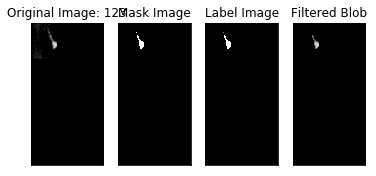

Image Peak: 5.608431631153071
1


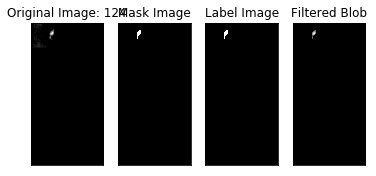

Image Peak: 13.60656638721101
1


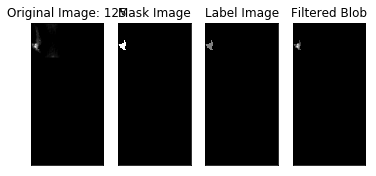

Image Peak: 6.576826951074869
1


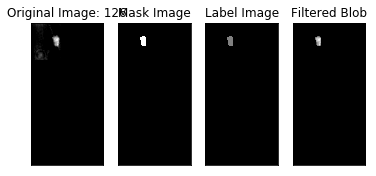

Image Peak: 11.30480754611029
1


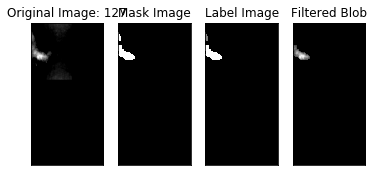

Image Peak: 13.905409855181137
1


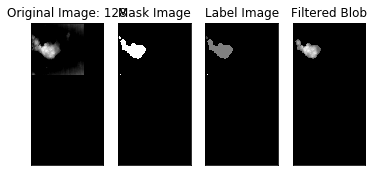

Image Peak: 8.15062809287394
1


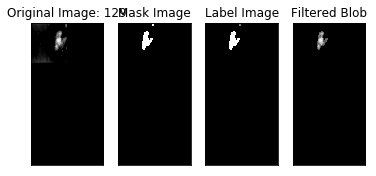

Image Peak: 11.389703257467334
1


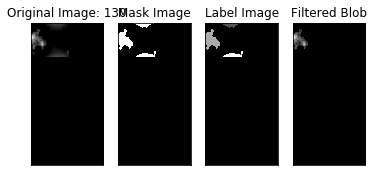

Image Peak: 10.088847424797914
1


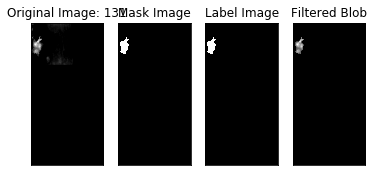

Image Peak: 9.358412064124655
1


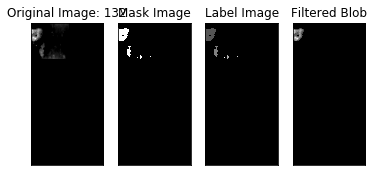

Image Peak: 7.61821519523827
1


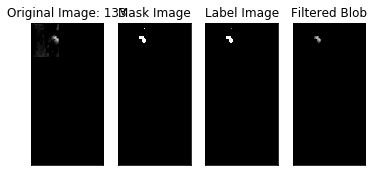

Image Peak: 9.930319088673794
1


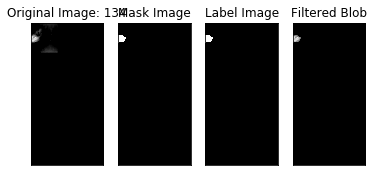

Image Peak: 10.352459857864247
1


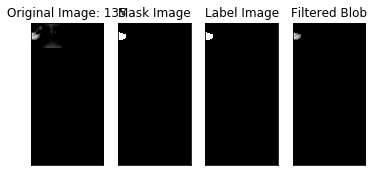

Image Peak: 16.359544562604057
1


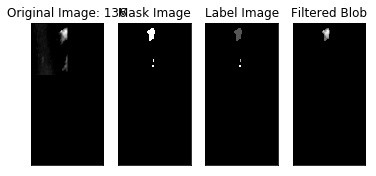

Image Peak: 12.672682413114584
1


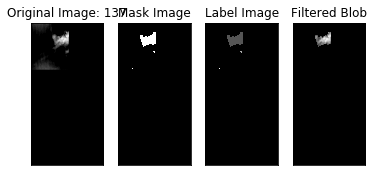

Image Peak: 7.487761552037317
1


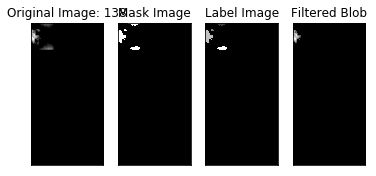

Image Peak: 12.283208178713576
1


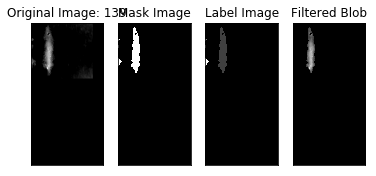

Image Peak: 16.060614814555613
1


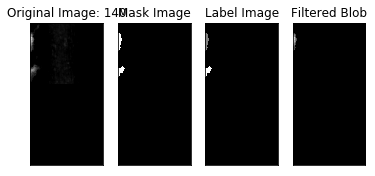

Image Peak: 14.26202843089446
1


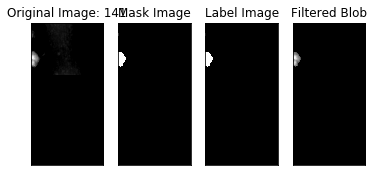

Image Peak: 6.4849218441995
2


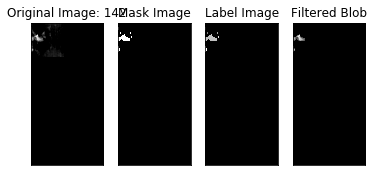

Image Peak: 6.609705900751833
2


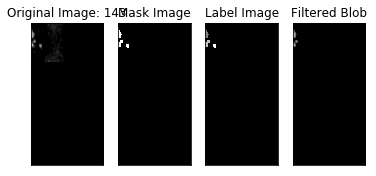

Image Peak: 13.17366813500947
1


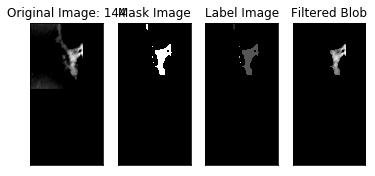

Image Peak: 7.8833839278071745
1


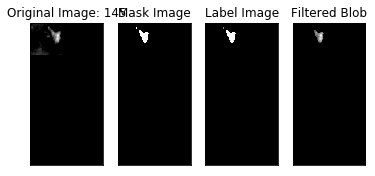

Image Peak: 9.26316490285745
2


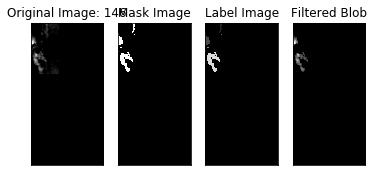

Image Peak: 12.072265359112436
1


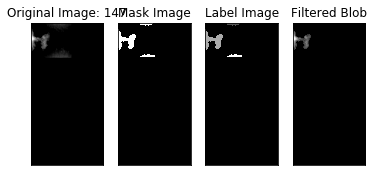

Image Peak: 15.800243096795535
1


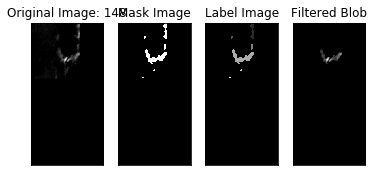

Image Peak: 7.659231492664745
1


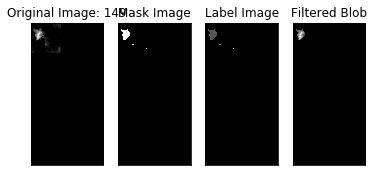

Image Peak: 17.31713422946404
1


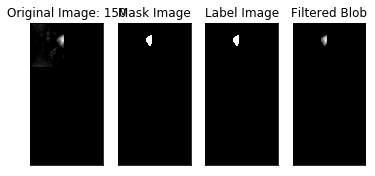

Image Peak: 7.654747471459097
1


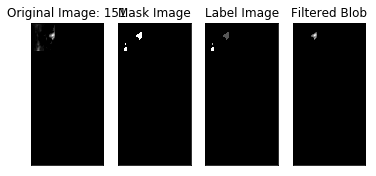

Image Peak: 7.7486267469875845
1


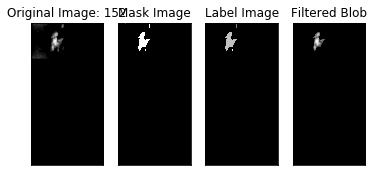

Image Peak: 12.149007671817674
1


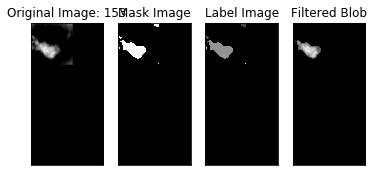

Image Peak: 9.714595589564983
1


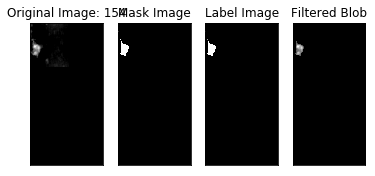

Image Peak: 11.227733284968465
1


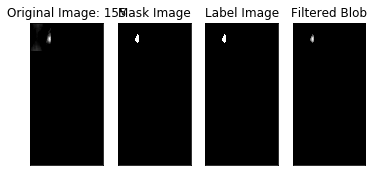

Image Peak: 4.3276741051557535
1


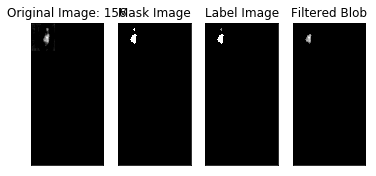

Image Peak: 9.043372560741942
1


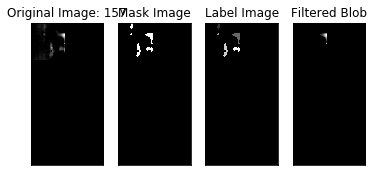

Image Peak: 6.356704577076831
1


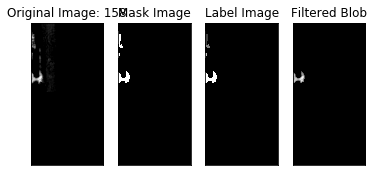

Image Peak: 9.024320506276304
1


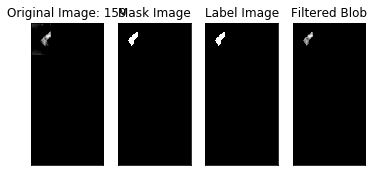

Image Peak: 10.678041752037045
1


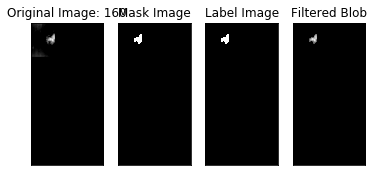

Image Peak: 9.710840123443903
1


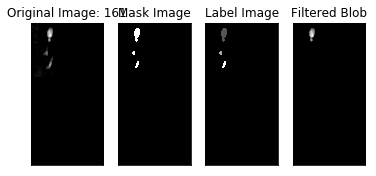

Image Peak: 5.546212998915645
1


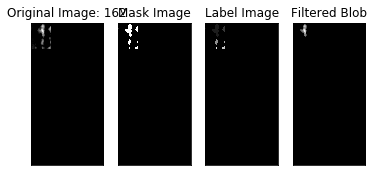

Image Peak: 6.226681805736652
1


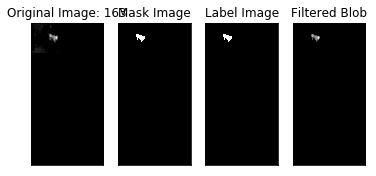

Image Peak: 10.599678322789272
1


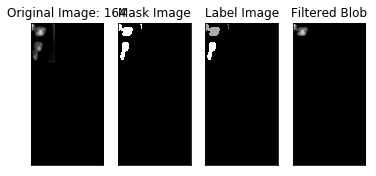

Image Peak: 3.9150016283097804
1


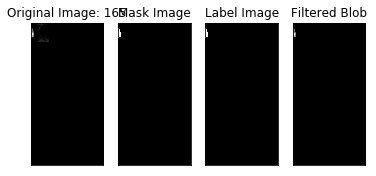

Image Peak: 11.34736684109794
1


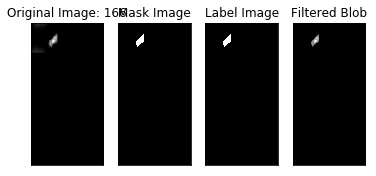

Image Peak: 11.1070118484532
1


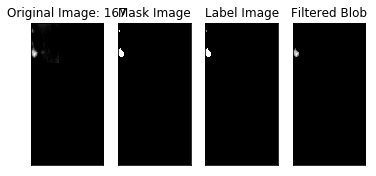

Image Peak: 4.943038288076372
1


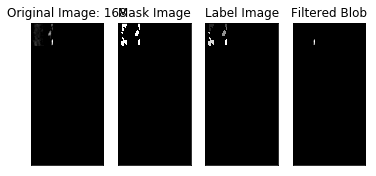

Image Peak: 7.325133243346376
2


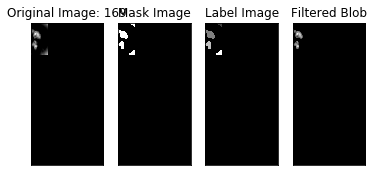

Image Peak: 9.693168457134556
1


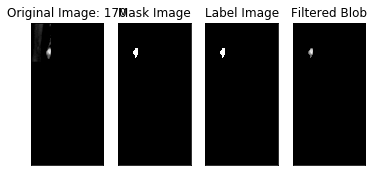

Image Peak: 5.169917266634892
1


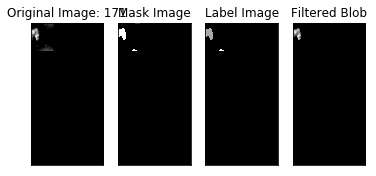

Image Peak: 9.454931466914534
1


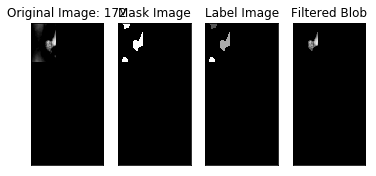

Image Peak: 16.556012016436267
1


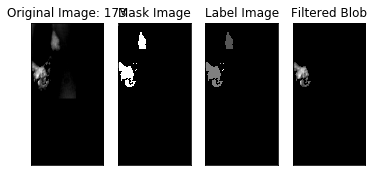

Image Peak: 18.629438505022343
1


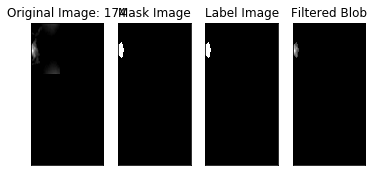

Image Peak: 5.278981495016675
1


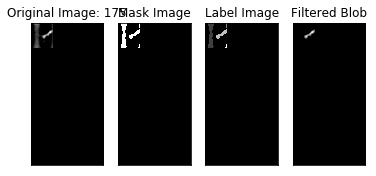

Image Peak: 18.28685043360995
1


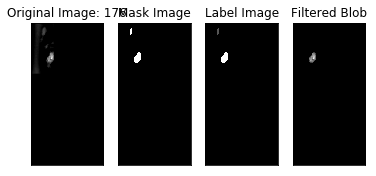

Image Peak: 14.9918199518292
1


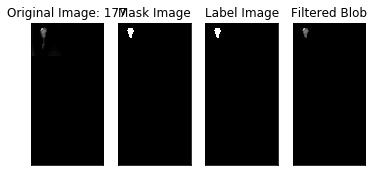

Image Peak: 7.557547280344041
1


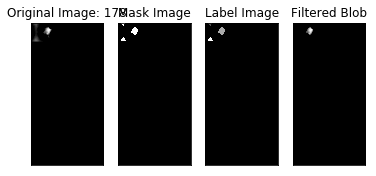

Image Peak: 9.817342635618282
1


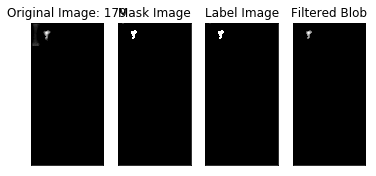

Image Peak: 11.622769136007427
1


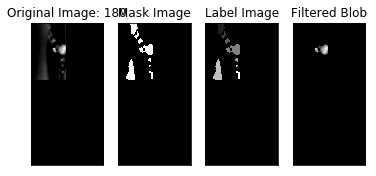

Image Peak: 14.189005876659136
1


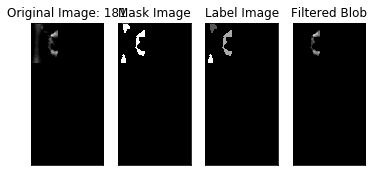

Image Peak: 6.983784789752436
1


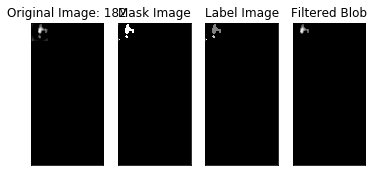

Image Peak: 5.400517047388022
1


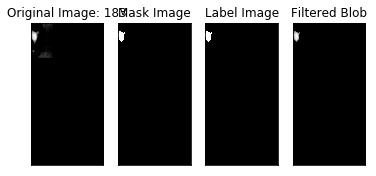

Image Peak: 12.088204619528337
1


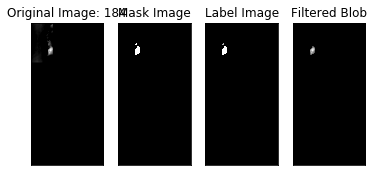

Image Peak: 8.050953422542458
3


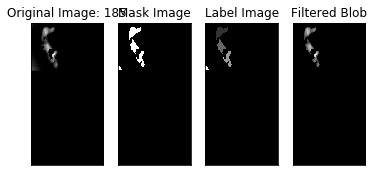

Image Peak: 6.453484475023269
1


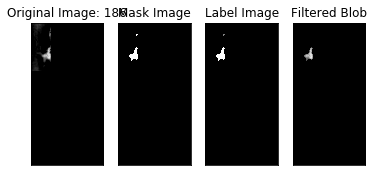

Image Peak: 9.282661376638117
1


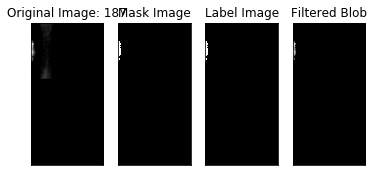

Image Peak: 7.461677734493437
1


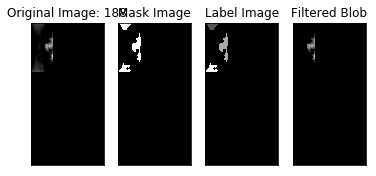

Image Peak: 5.656018413885275
1


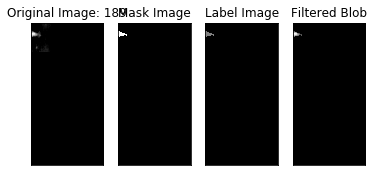

Image Peak: 5.695984856327093
1


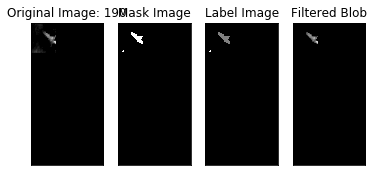

Image Peak: 5.958819596292758
1


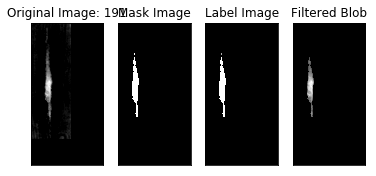

Image Peak: 9.496953650691218
2


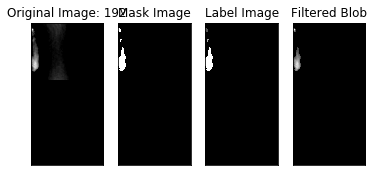

Image Peak: 22.020838474150185
1


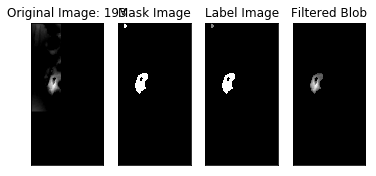

Image Peak: 14.120051607264559
1


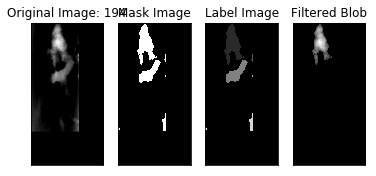

Image Peak: 17.581477851668918
1


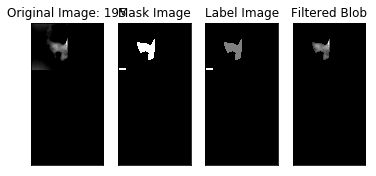

Image Peak: 7.647111458693186
1


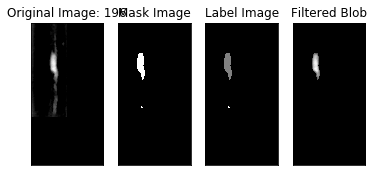

Image Peak: 19.083013454993555
2


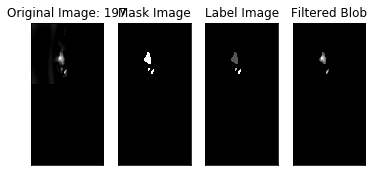

Image Peak: 6.8489887444596285
1


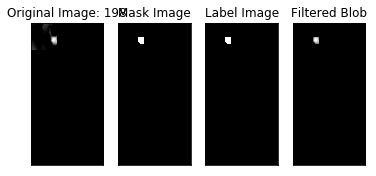

Image Peak: 14.07909175688631
2


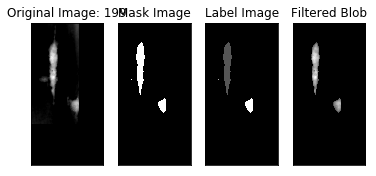

Image Peak: 13.639774041143031
1


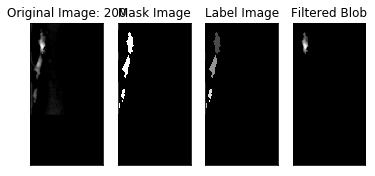

Image Peak: 58.49642700829465
1


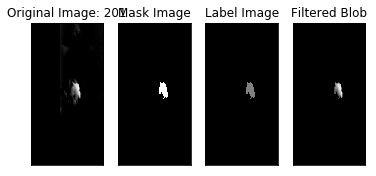

Image Peak: 5.237538121006949
1


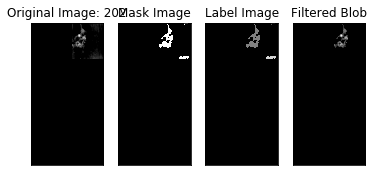

Image Peak: 10.871285495897926
1


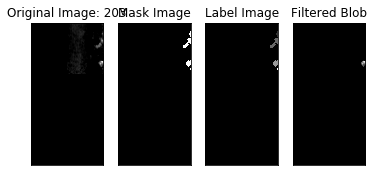

Image Peak: 9.073147527941423
2


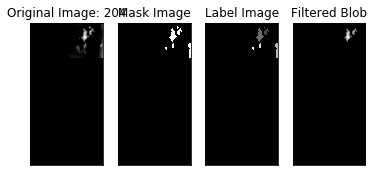

Image Peak: 16.06377324488988
1


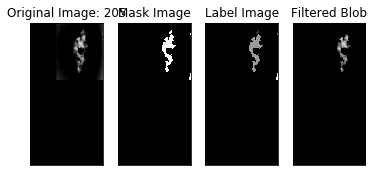

Image Peak: 4.499124143780264
2


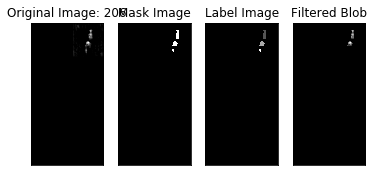

Image Peak: 11.424866068077968
1


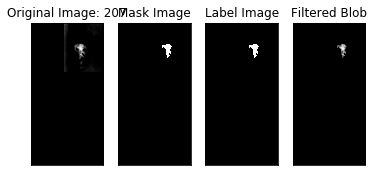

Image Peak: 11.985813173726694
1


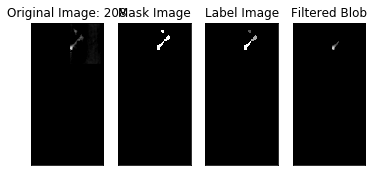

Image Peak: 9.31234703067937
2


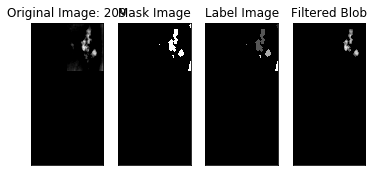

Image Peak: 7.24599017988489
1


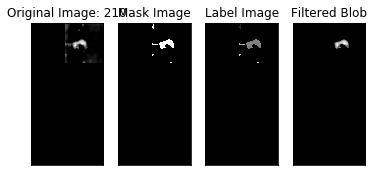

Image Peak: 12.887909418403153
2


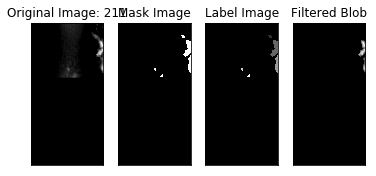

Image Peak: 20.34599397321767
1


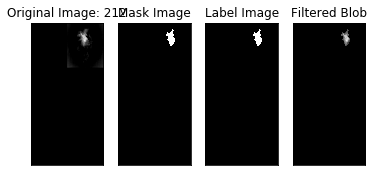

Image Peak: 5.670301764493
2


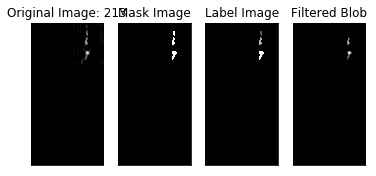

Image Peak: 14.033560248130104
1


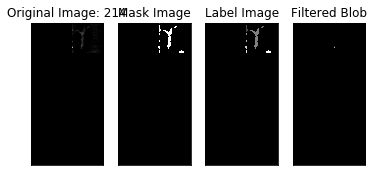

Image Peak: 16.187334416500182
1


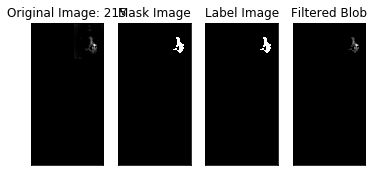

Image Peak: 34.36737079202217
2


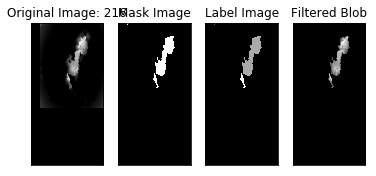

Image Peak: 14.088193555267202
1


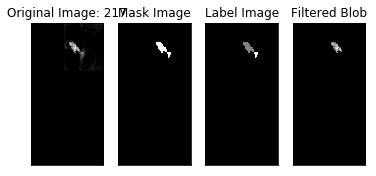

Image Peak: 7.070157384975791
1


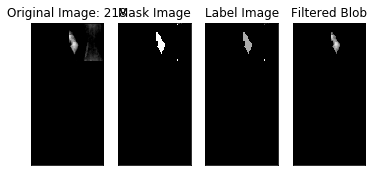

Image Peak: 11.334183918439027
1


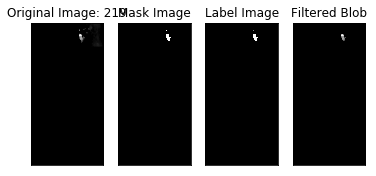

Image Peak: 5.874934795512158
1


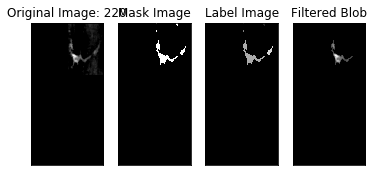

Image Peak: 3.8434988818471383
1


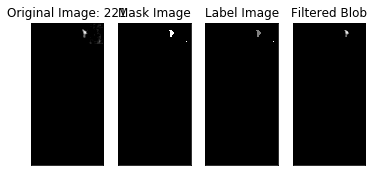

Image Peak: 6.171184118195622
1


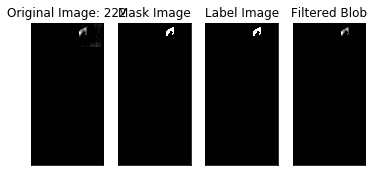

Image Peak: 8.531225680765928
1


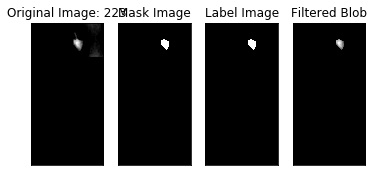

Image Peak: 6.317281805809348
1


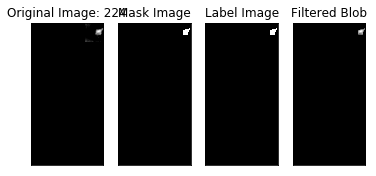

Image Peak: 12.532233608962418
1


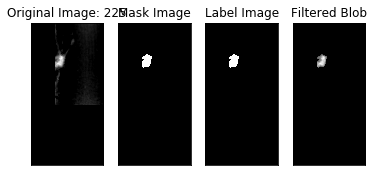

Image Peak: 4.854191841725597
1


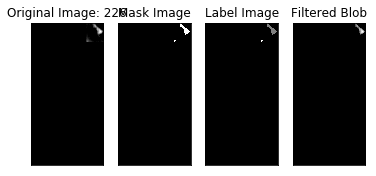

Image Peak: 6.432116047093833
1


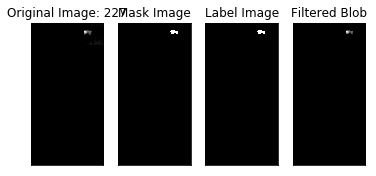

Image Peak: 4.319408942841026
1


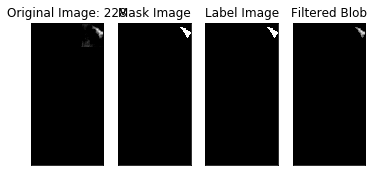

Image Peak: 6.571412586210204
1


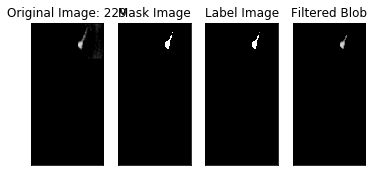

Image Peak: 5.608431631153071
1


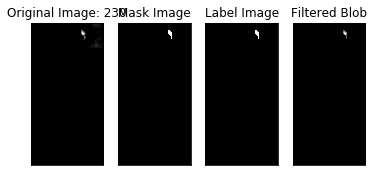

Image Peak: 13.60656638721101
1


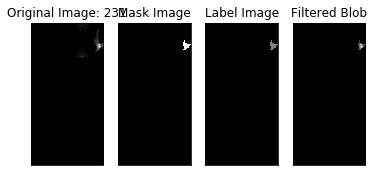

Image Peak: 6.576826951074869
1


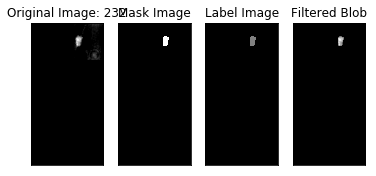

Image Peak: 11.30480754611029
1


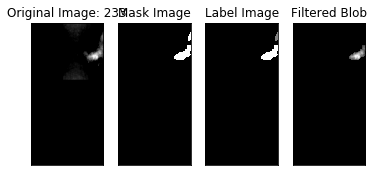

Image Peak: 13.905409855181137
1


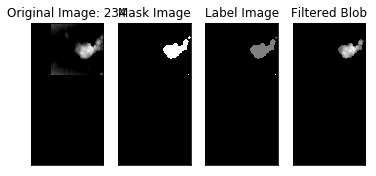

Image Peak: 8.15062809287394
1


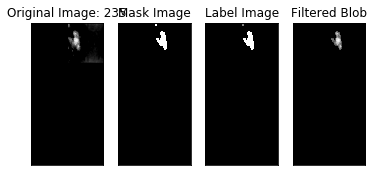

Image Peak: 8.268838206834436
1


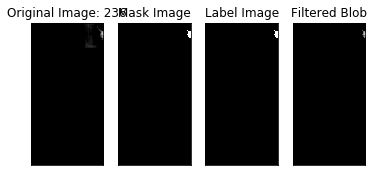

Image Peak: 11.389703257467334
1


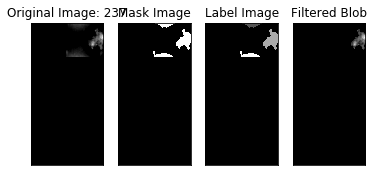

Image Peak: 10.088847424797914
1


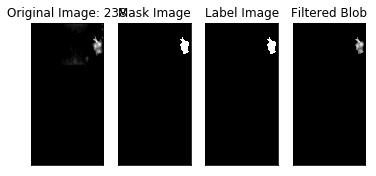

Image Peak: 9.358412064124655
1


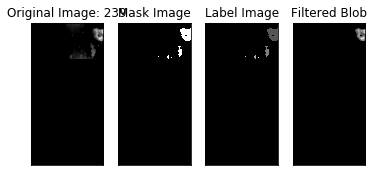

Image Peak: 7.61821519523827
1


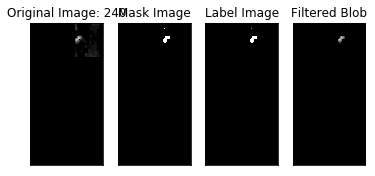

Image Peak: 9.930319088673794
1


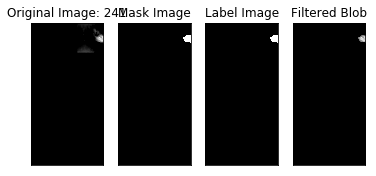

Image Peak: 10.352459857864247
1


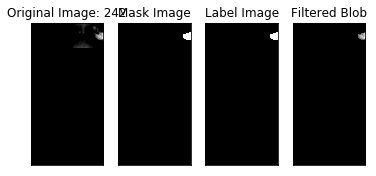

Image Peak: 16.359544562604057
1


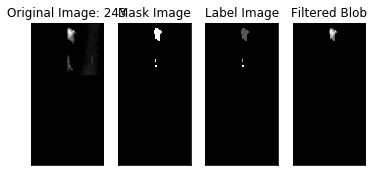

Image Peak: 12.672682413114584
1


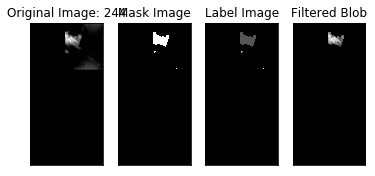

Image Peak: 7.487761552037317
1


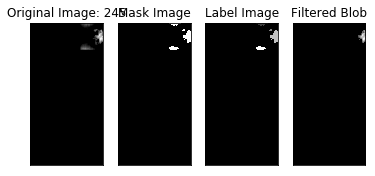

Image Peak: 12.283208178713576
1


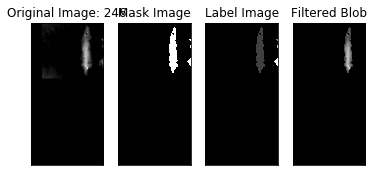

Image Peak: 23.74172035493951
1


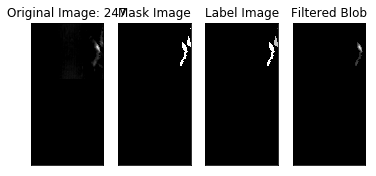

Image Peak: 16.060614814555613
1


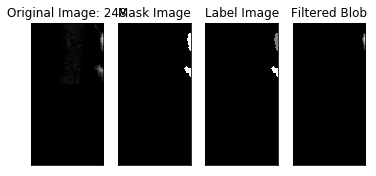

Image Peak: 14.26202843089446
1


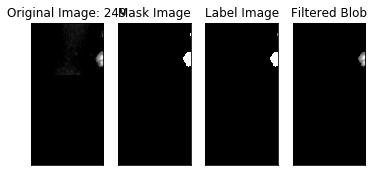

Image Peak: 6.4849218441995
2


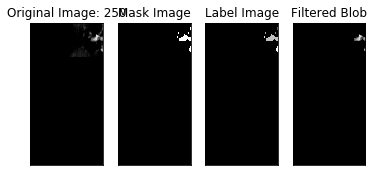

Image Peak: 6.609705900751833
2


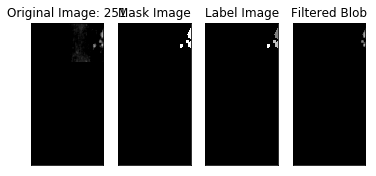

Image Peak: 13.17366813500947
1


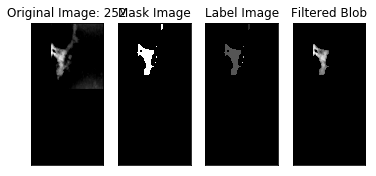

Image Peak: 7.8833839278071745
1


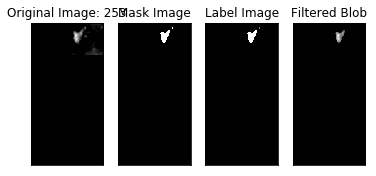

Image Peak: 9.26316490285745
2


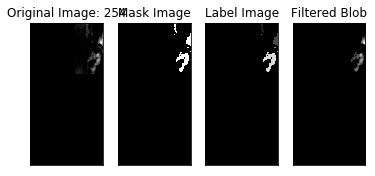

Image Peak: 12.072265359112436
1


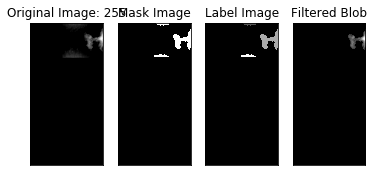

Image Peak: 15.800243096795535
1


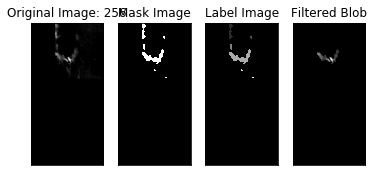

Image Peak: 7.659231492664745
1


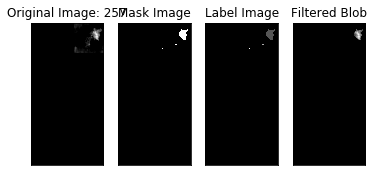

Image Peak: 3.819488585768213
2


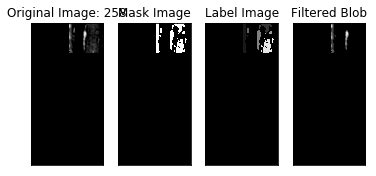

Image Peak: 17.31713422946404
1


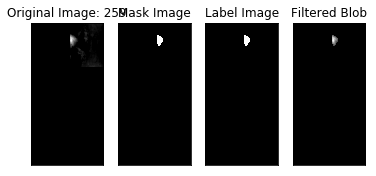

Image Peak: 7.654747471459097
1


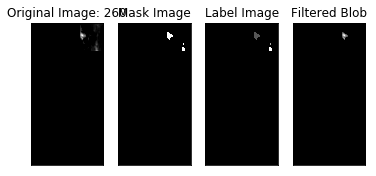

Image Peak: 7.7486267469875845
1


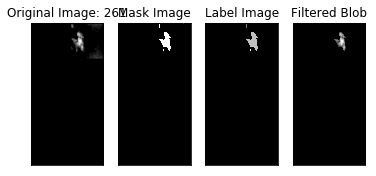

Image Peak: 12.149007671817674
1


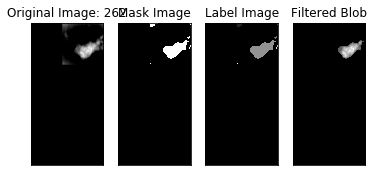

Image Peak: 9.714595589564983
1


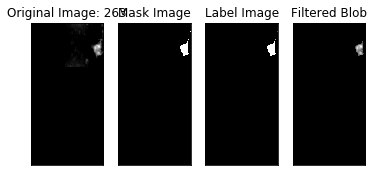

Image Peak: 11.227733284968465
1


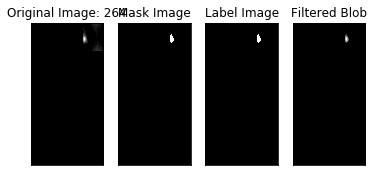

Image Peak: 4.3276741051557535
1


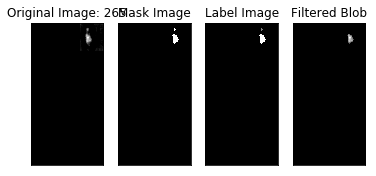

Image Peak: 9.043372560741942
1


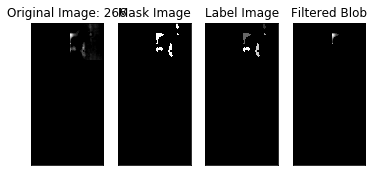

Image Peak: 6.356704577076831
1


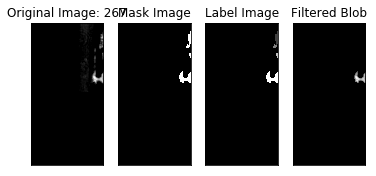

Image Peak: 9.024320506276304
1


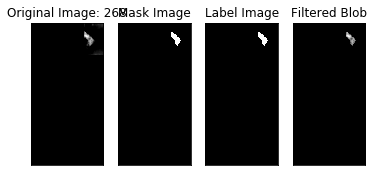

Image Peak: 11.008716866291715
3


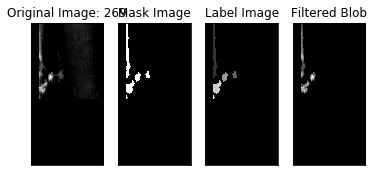

Image Peak: 10.678041752037045
1


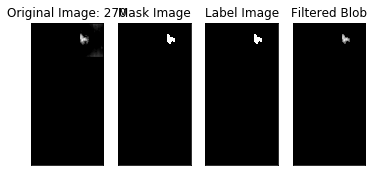

Image Peak: 9.710840123443903
1


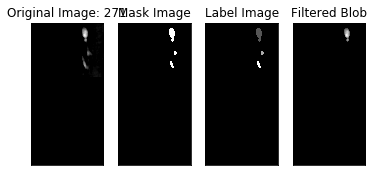

Image Peak: 5.546212998915645
1


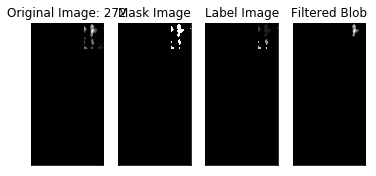

Image Peak: 6.226681805736652
1


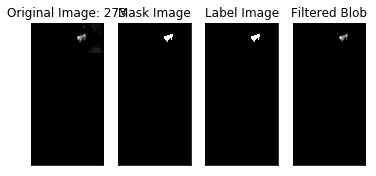

Image Peak: 10.599678322789272
1


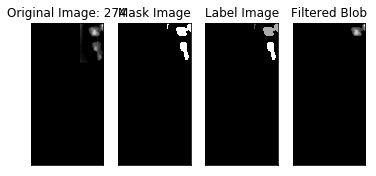

Image Peak: 3.9150016283097804
1


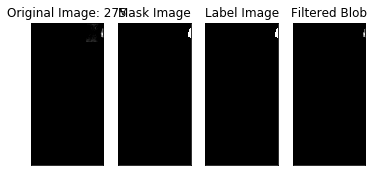

Image Peak: 11.34736684109794
1


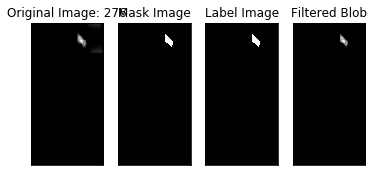

Image Peak: 11.1070118484532
1


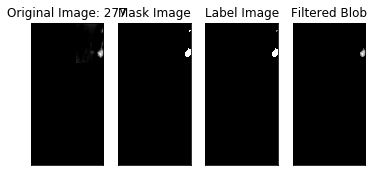

Image Peak: 4.943038288076372
1


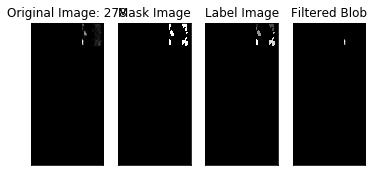

Image Peak: 7.325133243346376
2


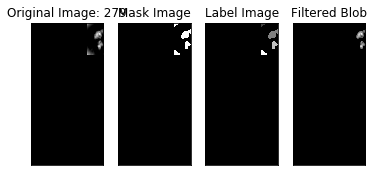

Image Peak: 16.551449326678124
3


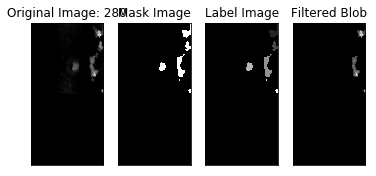

Image Peak: 9.693168457134556
1


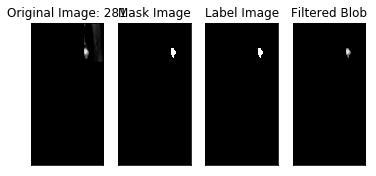

Image Peak: 5.169917266634892
1


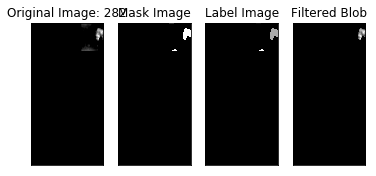

Image Peak: 9.454931466914534
1


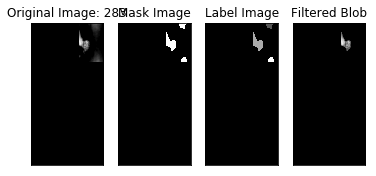

Image Peak: 16.556012016436267
1


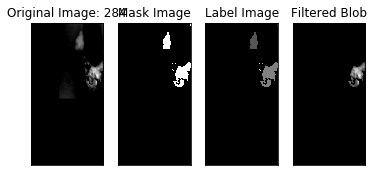

Image Peak: 18.629438505022343
1


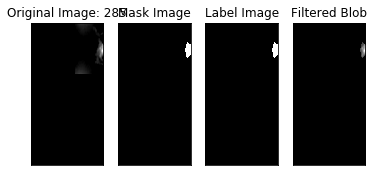

Image Peak: 5.278981495016675
1


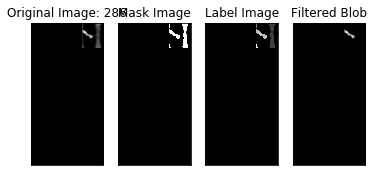

Image Peak: 18.28685043360995
1


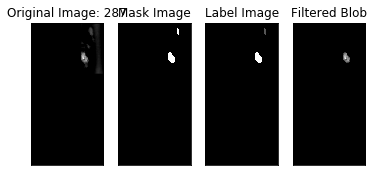

Image Peak: 14.9918199518292
1


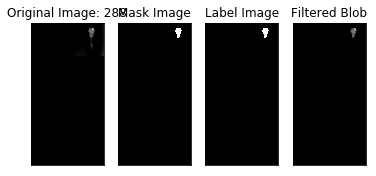

Image Peak: 7.557547280344041
1


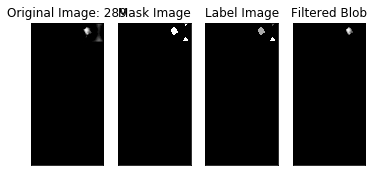

Image Peak: 9.817342635618282
1


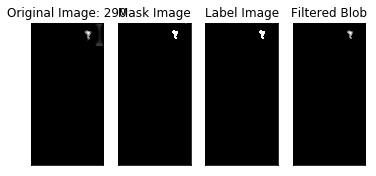

Image Peak: 20.959488868792405
1


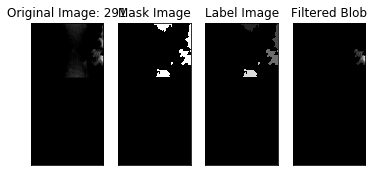

Image Peak: 11.622769136007427
1


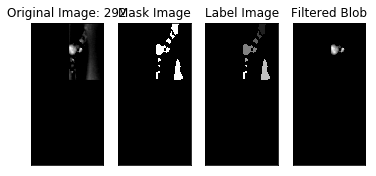

Image Peak: 14.189005876659136
1


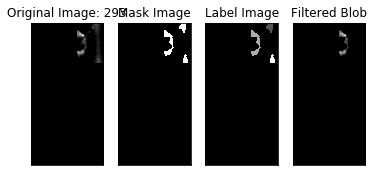

Image Peak: 6.983784789752436
1


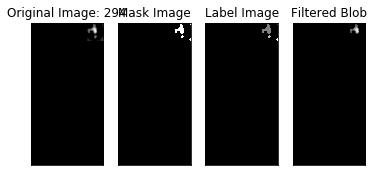

Image Peak: 5.400517047388022
1


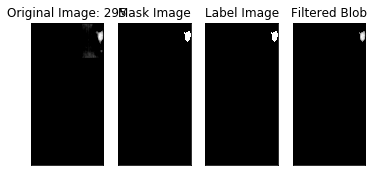

Image Peak: 12.088204619528337
1


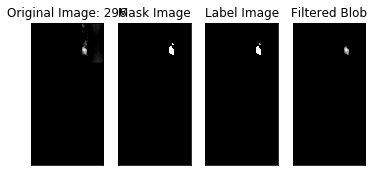

Image Peak: 8.050953422542458
3


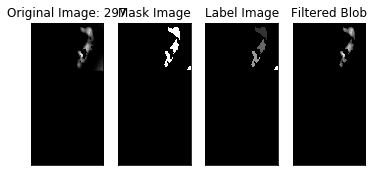

Image Peak: 6.453484475023269
1


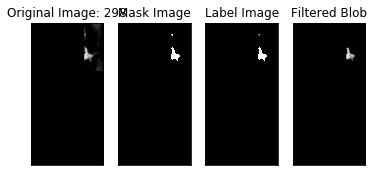

Image Peak: 9.282661376638117
1


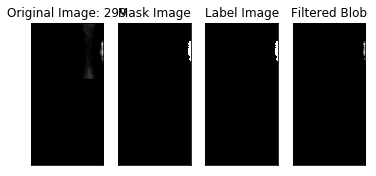

Image Peak: 7.461677734493437
1


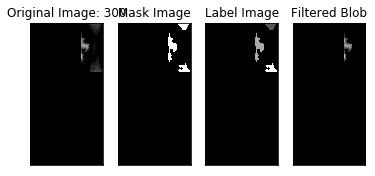

Image Peak: 5.656018413885275
1


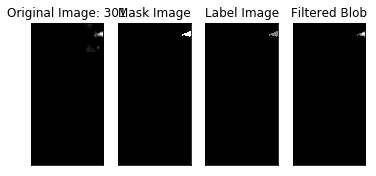

Image Peak: 3.982488475970104
1


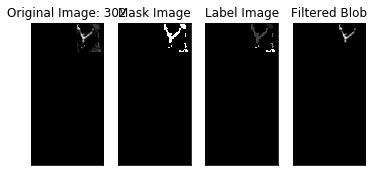

Image Peak: 5.695984856327093
1


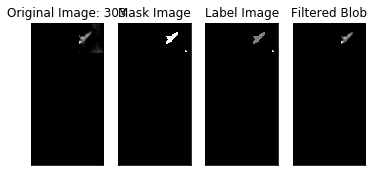

Image Peak: 5.958819596292758
1


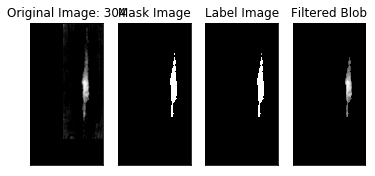

Image Peak: 9.496953650691218
2


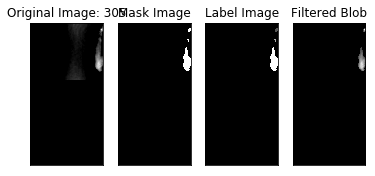

Image Peak: 22.020838474150185
1


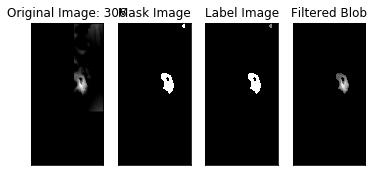

Image Peak: 14.120051607264559
1


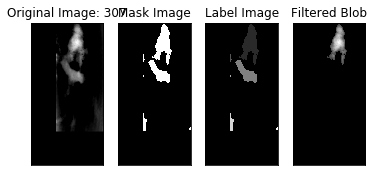

Image Peak: 17.581477851668918
1


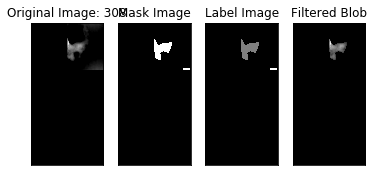

Image Peak: 7.647111458693186
1


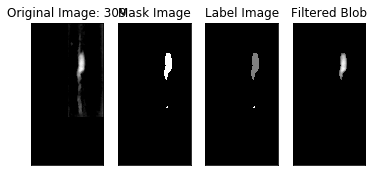

Image Peak: 19.083013454993555
2


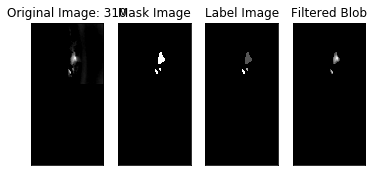

Image Peak: 6.8489887444596285
1


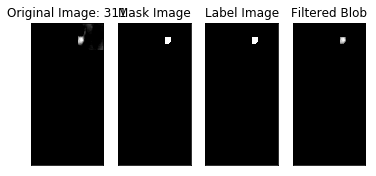

Image Peak: 14.07909175688631
2


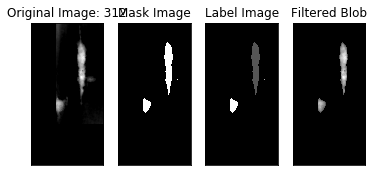

Image Peak: 16.62320607035906
1


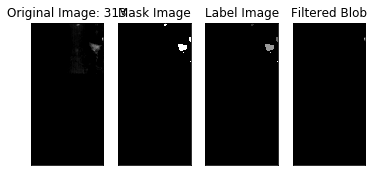

Image Peak: 12.160163422978558
1


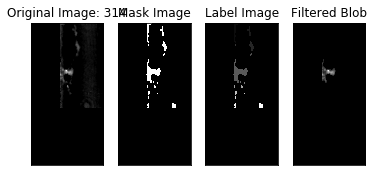

Image Peak: 13.639774041143031
1


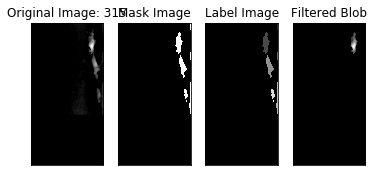

Image Peak: 7.8157163031173384
1


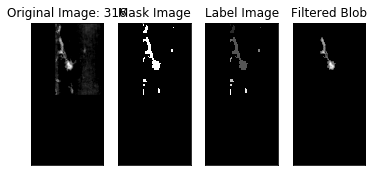

Image Peak: 7.134446682434441
1


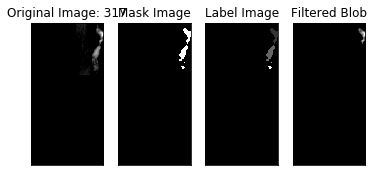

Image Peak: 3.3094165238391295
1


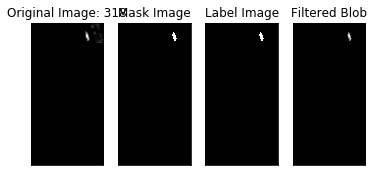

Image Peak: 6.088398059507494
1


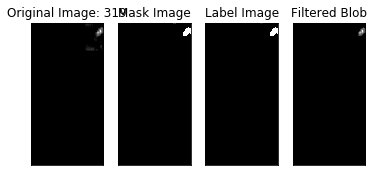

Image Peak: 1.9199000756059026
1


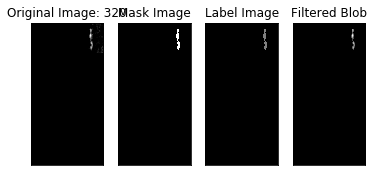

Image Peak: 5.242387856845691
1


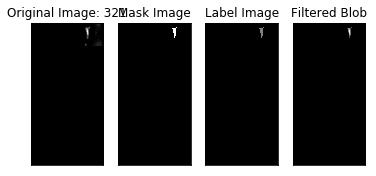

Image Peak: 3.4062183286179173
1


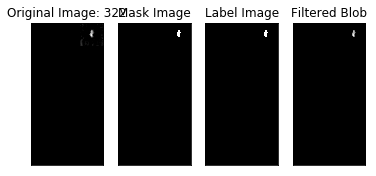

Image Peak: 13.20241124262862
1


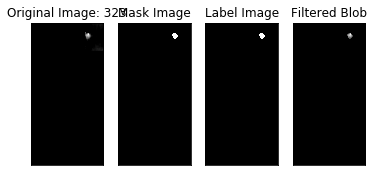

Image Peak: 9.239290807656184
1


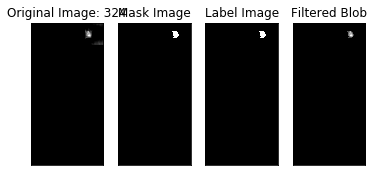

Image Peak: 12.46570728390383
1


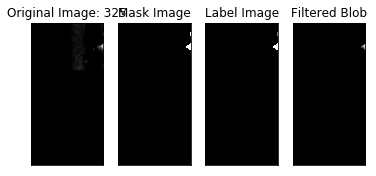

Image Peak: 6.529545868543843
1


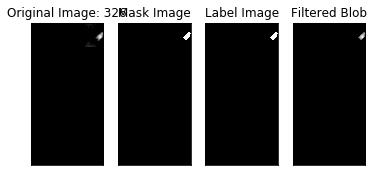

Image Peak: 10.356258068871899
1


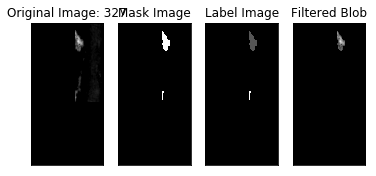

Image Peak: 8.839535604114765
1


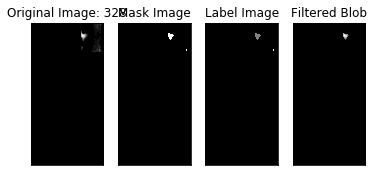

Image Peak: 9.412703235590431
1


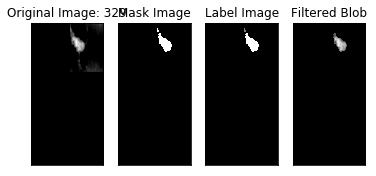

Image Peak: 23.32952685029605
1


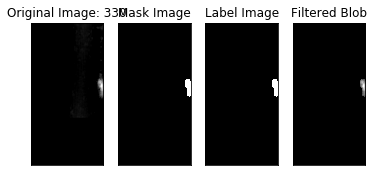

Image Peak: 4.824365871653022
1


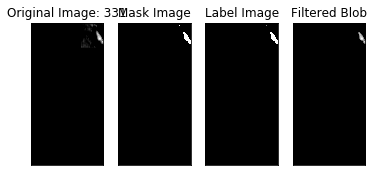

Image Peak: 11.271276816757181
1


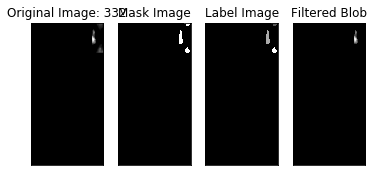

Image Peak: 6.683693048485441
1


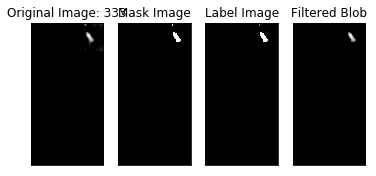

Image Peak: 3.9552961976172845
1


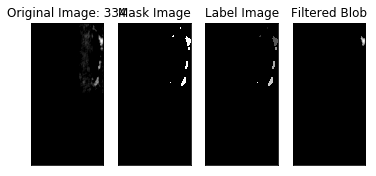

Image Peak: 5.700994552614695
2


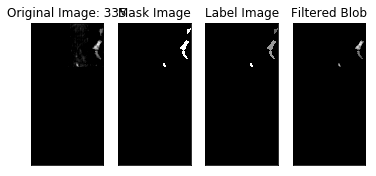

Image Peak: 4.629928019001791
1


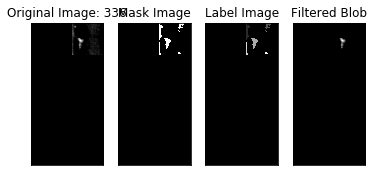

Image Peak: 6.070059487514487
1


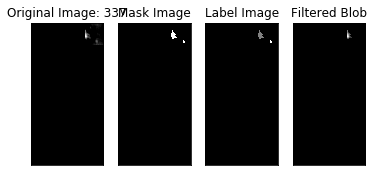

Image Peak: 9.925909262753832
1


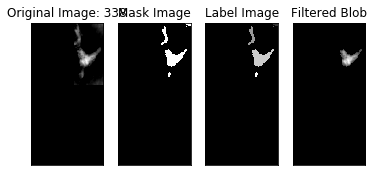

Image Peak: 12.553519206439061
1


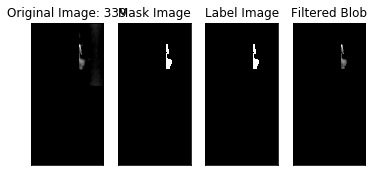

Image Peak: 4.504092426523356
1


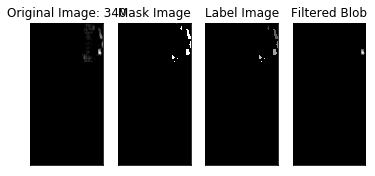

Image Peak: 6.920207247134636
1


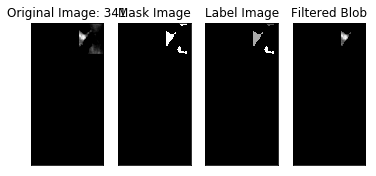

Image Peak: 13.746417390093809
1


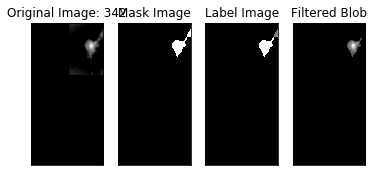

Image Peak: 4.974612448809016
1


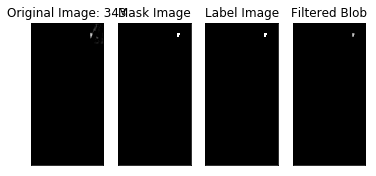

Image Peak: 4.989847275602248
1


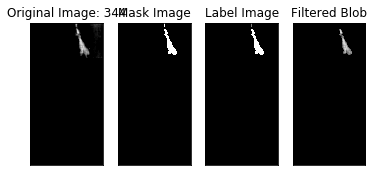

Image Peak: 8.641901406941251
1


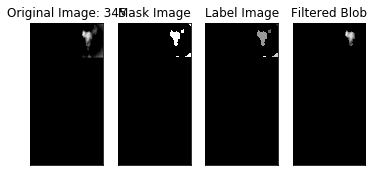

Image Peak: 28.533870011916466
2


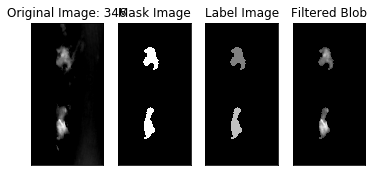

Image Peak: 16.393006355940962
2


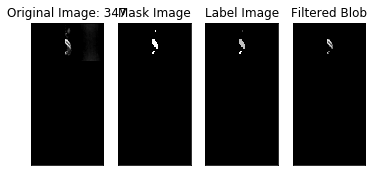

Image Peak: 10.05225399170304
1


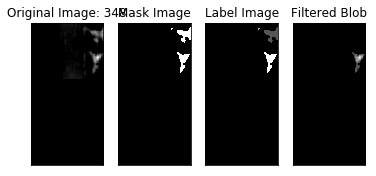

Image Peak: 4.661666312341646
1


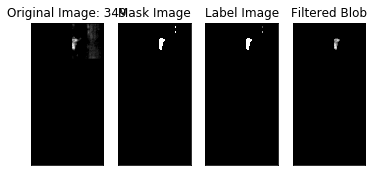

Image Peak: 7.665951287772606
1


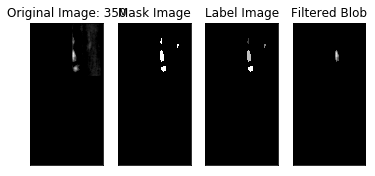

Image Peak: 8.094108541477432
1


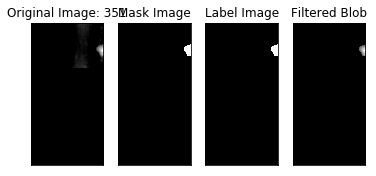

Image Peak: 6.917842953632238
1


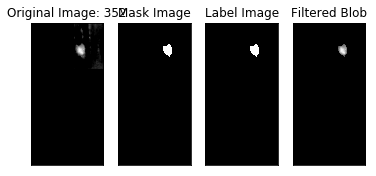

Image Peak: 7.769837578871186
1


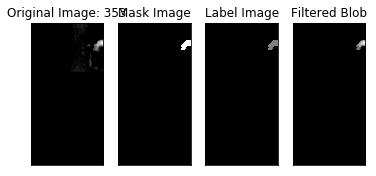

Image Peak: 1.2879390153188073
2


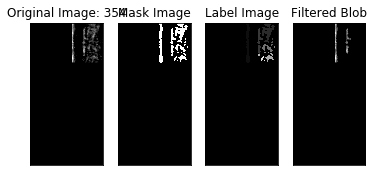

Image Peak: 11.109794863363959
1


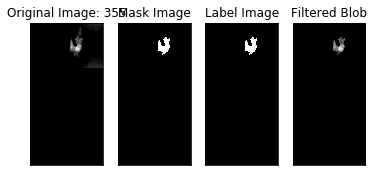

Image Peak: 6.398699626905022
1


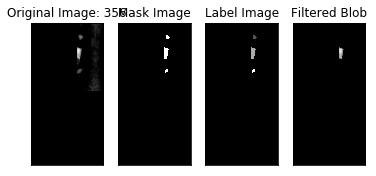

Image Peak: 19.513187167851356
2


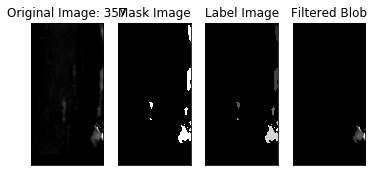

Image Peak: 9.703866893037896
1


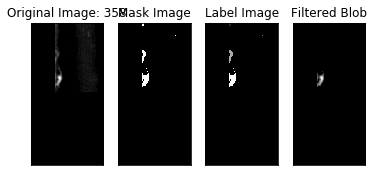

Image Peak: 7.290147646931412
2


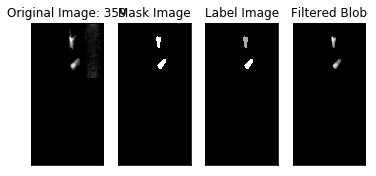

Image Peak: 5.209282121951803
1


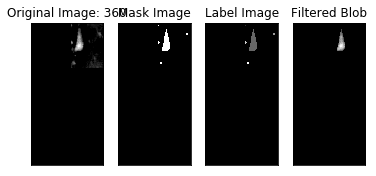

Image Peak: 8.905957866272942
1


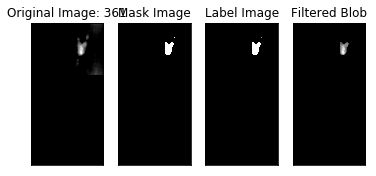

Image Peak: 9.828684560557534
3


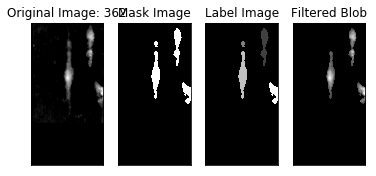

Image Peak: 4.952458361443391
1


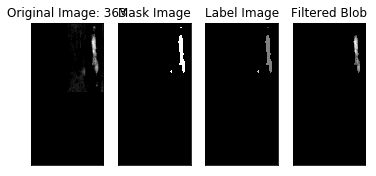

Image Peak: 10.346990574929585
1


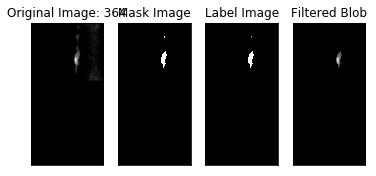

Image Peak: 4.064578278721073
1


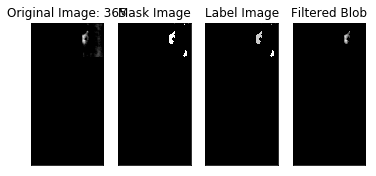

Image Peak: 16.901203306740932
1


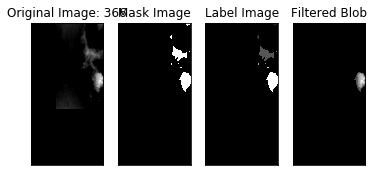

Image Peak: 8.174290755719358
2


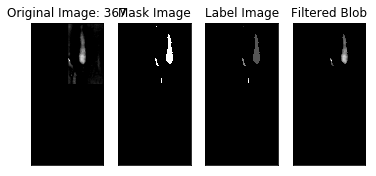

Image Peak: 10.1383714338767
1


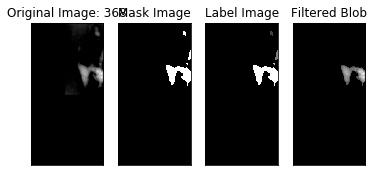

Image Peak: 11.378425482934961
2


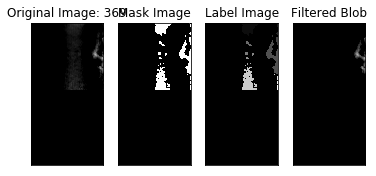

Image Peak: 6.696278146278006
1


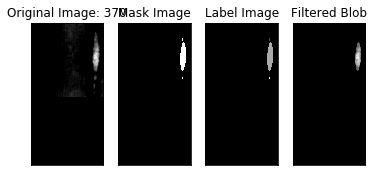

Image Peak: 8.459170296670704
1


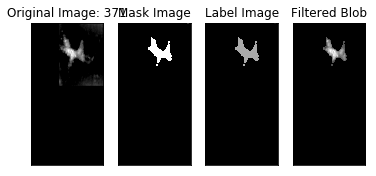

Image Peak: 6.577711384849547
1


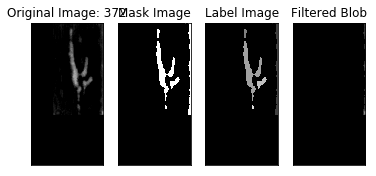

Image Peak: 8.775024211856886
1


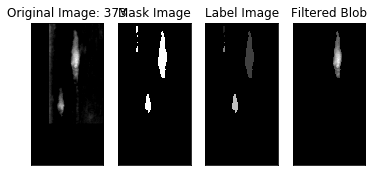

Image Peak: 11.714176343635462
1


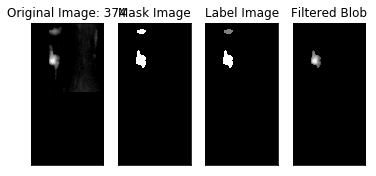

Image Peak: 12.802490968669064
2


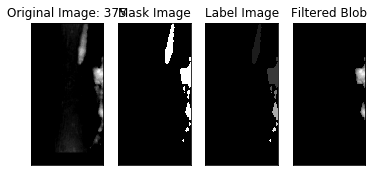

Image Peak: 9.708417504248098
1


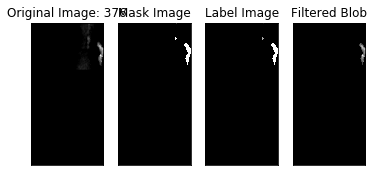

Image Peak: 8.562640871884144
1


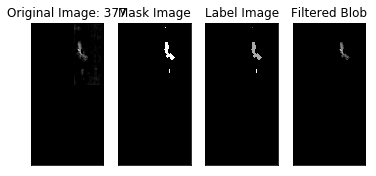

Image Peak: 5.9933282794282885
2


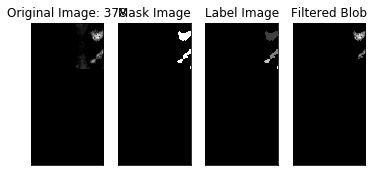

Image Peak: 18.74132920755083
1


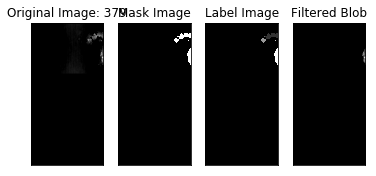

Image Peak: 8.153116362240594
1


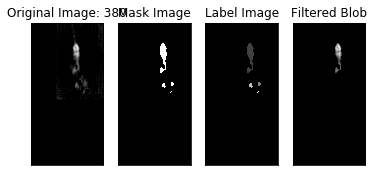

Image Peak: 22.062539887990535
1


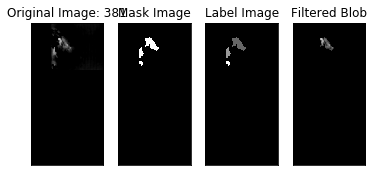

Image Peak: 11.283185624331786
1


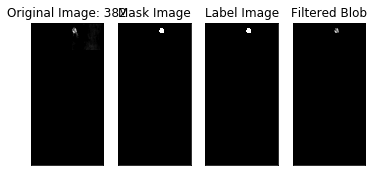

Image Peak: 11.061322698950633
1


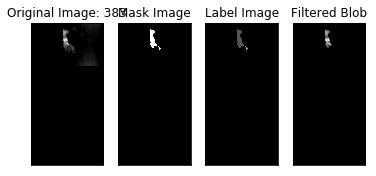

Image Peak: 11.694712894293003
1


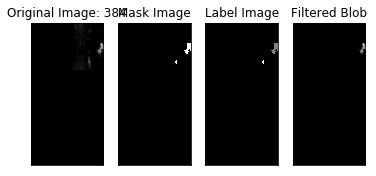

Image Peak: 21.4273353150707
1


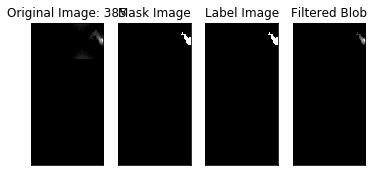

Image Peak: 5.58003284404962
1


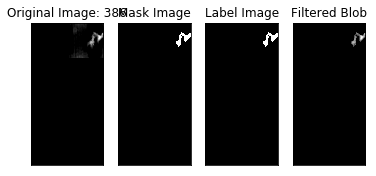

Image Peak: 15.963822535185086
1


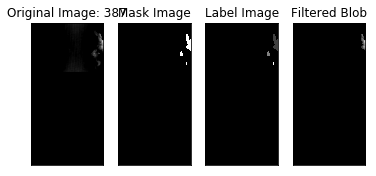

Image Peak: 5.980978848110395
1


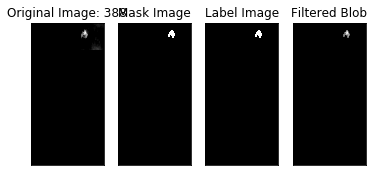

Image Peak: 33.704193471161716
1


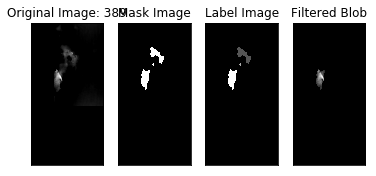

Image Peak: 5.347917948752371
1


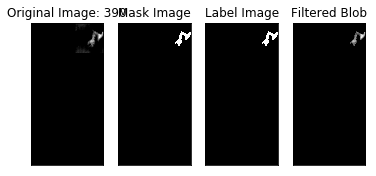

Image Peak: 3.6714341552634893
1


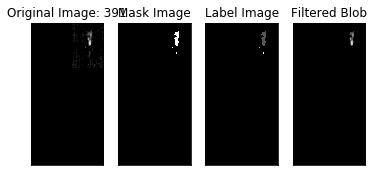

Image Peak: 8.81422772716142
1


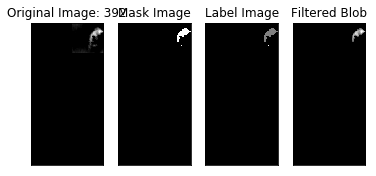

Image Peak: 8.279027545072038
1


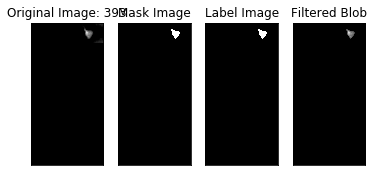

Image Peak: 4.982725421545554
2


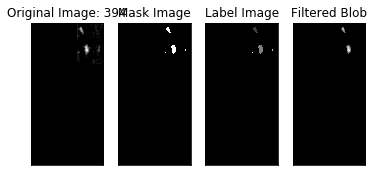

Image Peak: 5.070633700143265
1


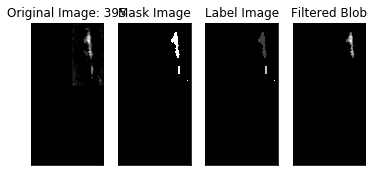

Image Peak: 12.097402292917083
1


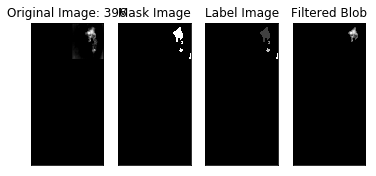

Image Peak: 4.640026532495113
1


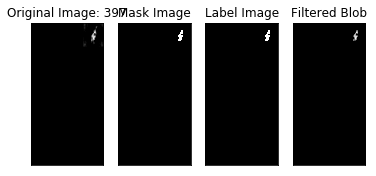

Image Peak: 3.2460031863698995
1


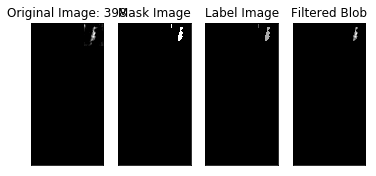

Image Peak: 5.141912525443123
1


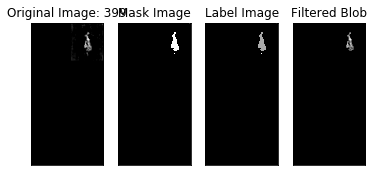

Image Peak: 9.21858955000867
1


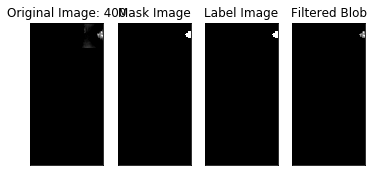

Image Peak: 7.249988854876749
1


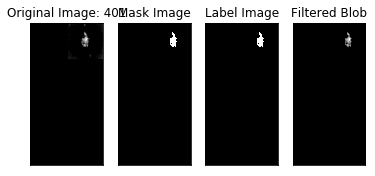

<Figure size 432x288 with 0 Axes>

In [7]:
#binarizer = preprocessing.Binarizer().fit(imgs[0])
#edges = binarizer.transform(imgs[0])

#edges = feature.canny(imgs[0], sigma=3)

# Otsu's thresholding after Gaussian filtering

img_masks = []
label_imgs = []
num_peaks = []
save_plt = True

for c in range(imgs.shape[0]):
# for c in range(2,3):
    img = imgs[c]
    
    img_peak = img.max()
    peak_thresh = img_peak * 0.75
    
    blur = ndimage.gaussian_filter(imgs[c], sigma=3)
    thresh = threshold_otsu(blur)
    binary = blur > thresh
    
    img_peak = img[binary].max()
    peak_thresh = img_peak * 0.75

    label_im, nb_labels = ndimage.label(binary) # Seperate each blob into a different label
    
    

    # Find biggest blob
    max_area = 0
    mask = np.zeros((img.shape[0], img.shape[1]))
    max_index = 0
    masks = 0
    
    print("Image Peak: " + str(img_peak))

    for i in range(1,nb_labels+1):
        label = label_im == i
        
        ''' if label.sum() > max_area:
            max_area = label.sum()
            max_index = i '''
            
        if img[label].max() > peak_thresh:
            mask = np.maximum(mask, label)
            masks += 1

    # max_index = 2
    # mask = label_im == max_index
    img_masks.append(mask)
    num_peaks.append(masks)
    label_imgs.append(label_im)
    
    print(masks)

    if save_plt:
        plt.subplot(141),plt.imshow(imgs[c],cmap = 'gray')
        plt.title('Original Image: ' + str(c)), plt.xticks([]), plt.yticks([])
        plt.subplot(142),plt.imshow(binary,cmap = 'gray')
        plt.title('Mask Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(143),plt.imshow(label_im,cmap = 'gray')
        plt.title('Label Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(144),plt.imshow(np.multiply(img, mask),cmap = 'gray')
        plt.title('Filtered Blob'), plt.xticks([]), plt.yticks([])
        plt.show()
        plt.savefig(f"{dest_path}image{c}.png")

img_masks = np.array(img_masks)

In [8]:
df['num_peaks'] = num_peaks

In [9]:
masked_imgs = np.multiply(imgs, img_masks)

C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


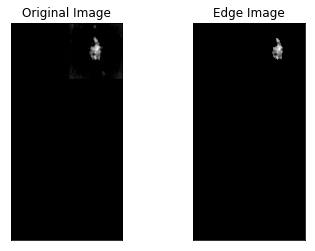

In [10]:
for c in range(masked_imgs.shape[0]):
    plt.subplot(121),plt.imshow(imgs[c],cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(masked_imgs[c],cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    
    if save_plt:
        plt.savefig(f"{dest_path}image{c}.png")

## Center of Gravity

## Axis of Least Inertia

## Scikit Learn Feature Extraction

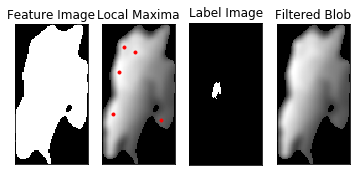

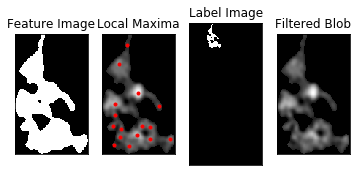

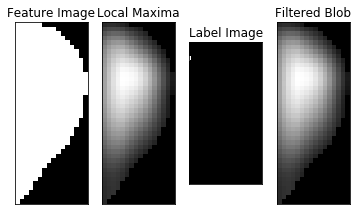

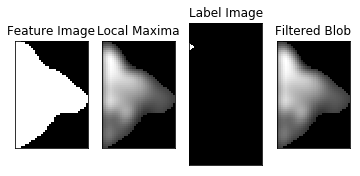

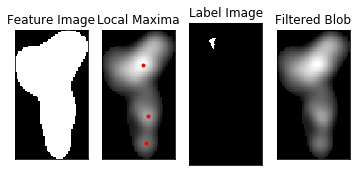

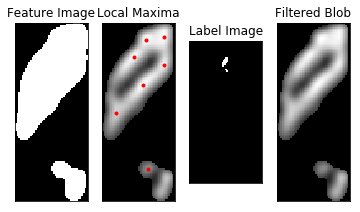

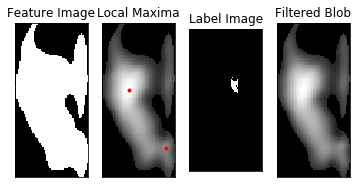

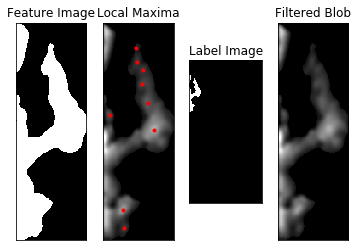

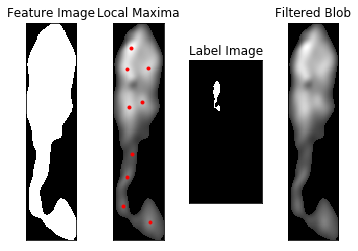

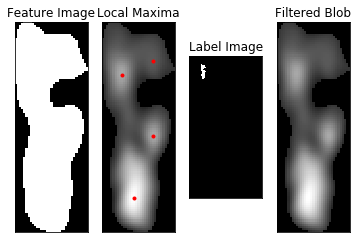

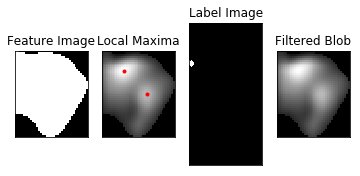

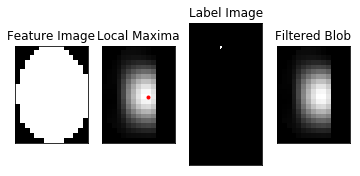

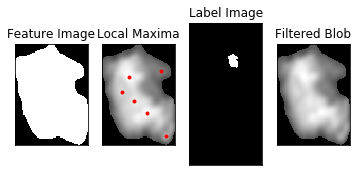

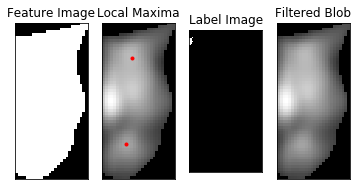

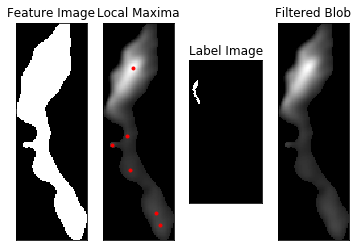

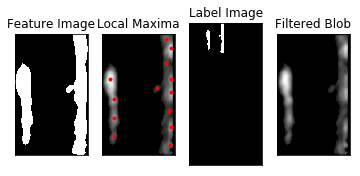

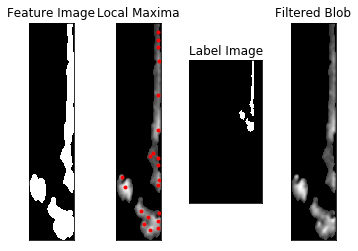

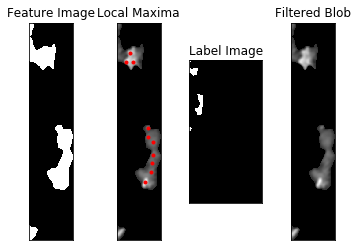

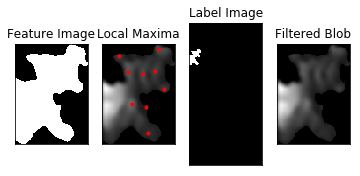

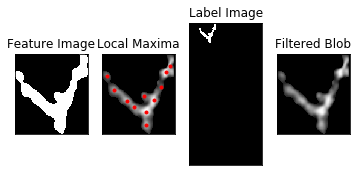

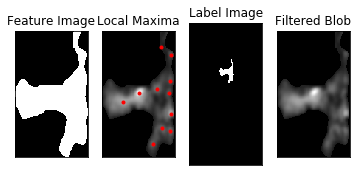

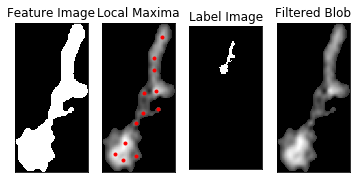

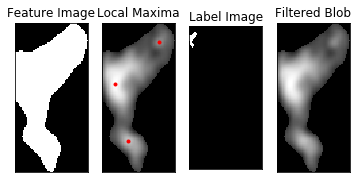

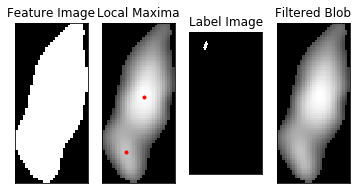

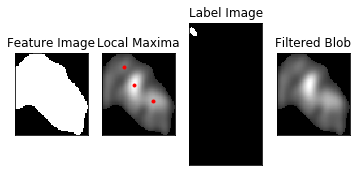

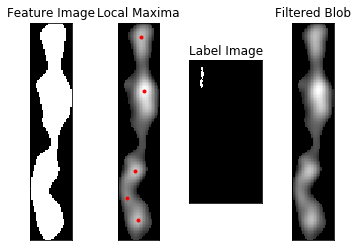

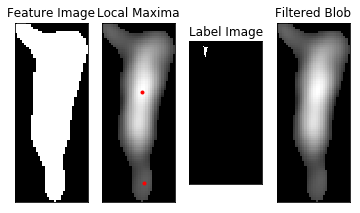

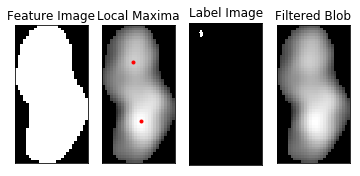

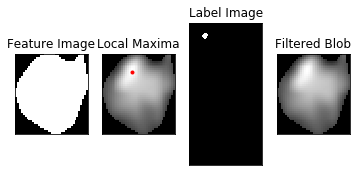

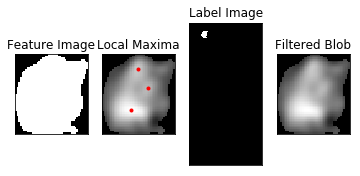

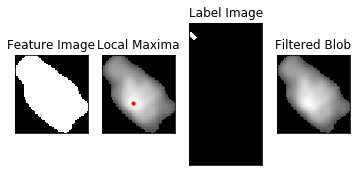

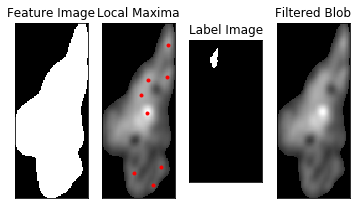

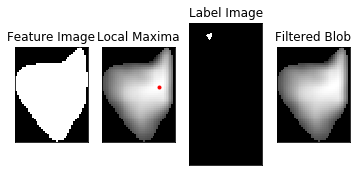

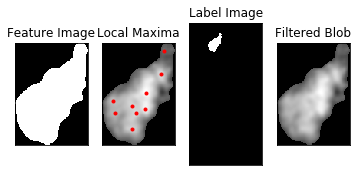

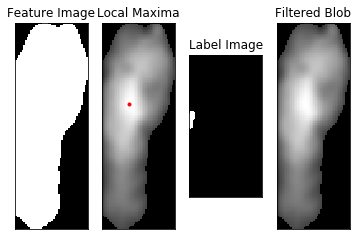

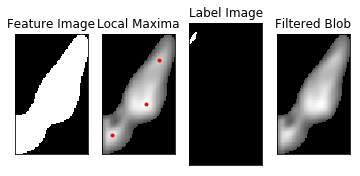

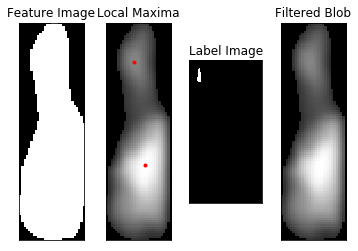

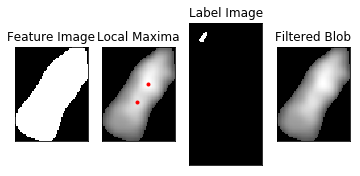

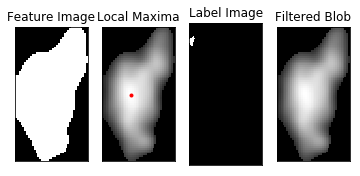

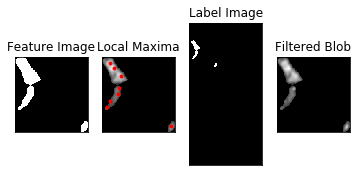

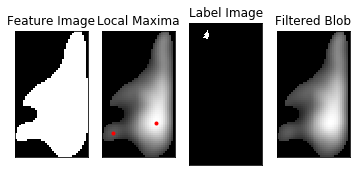

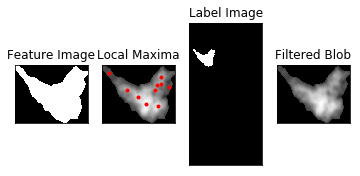

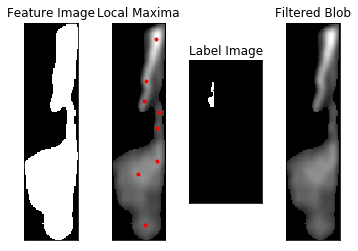

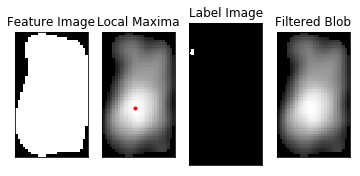

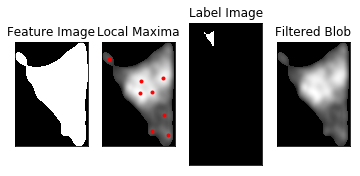

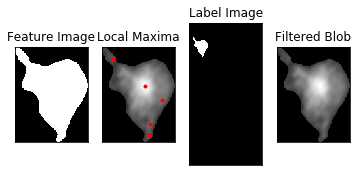

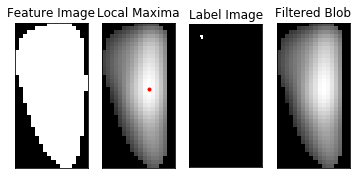

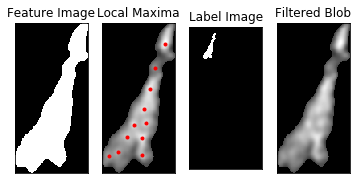

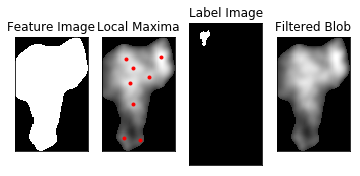

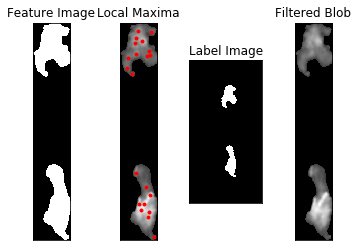

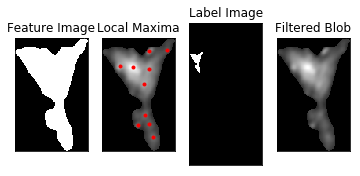

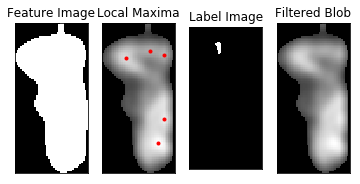

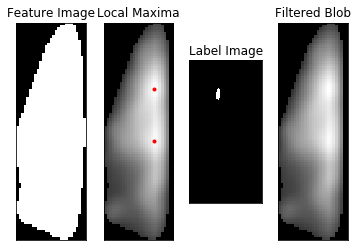

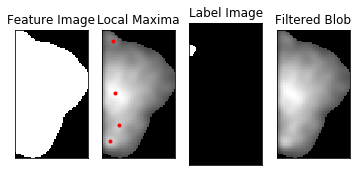

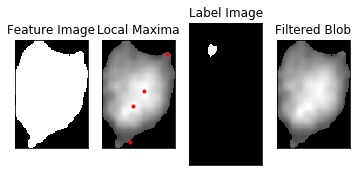

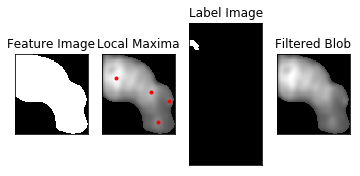

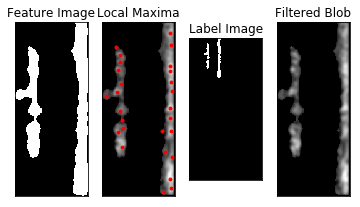

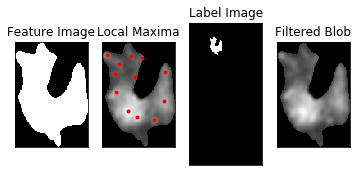

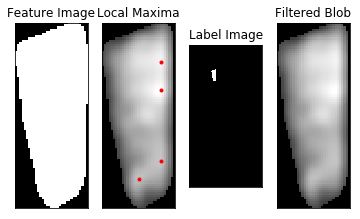

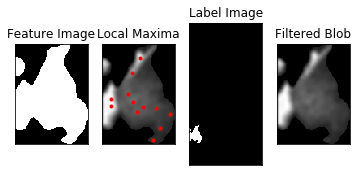

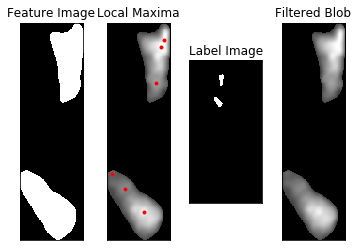

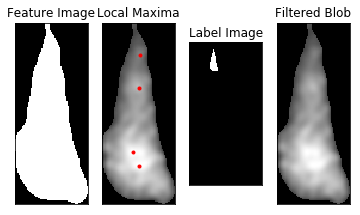

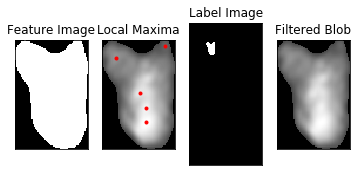

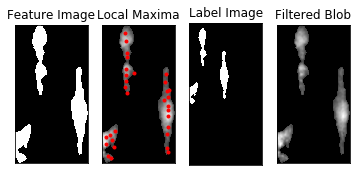

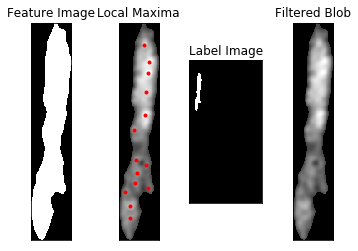

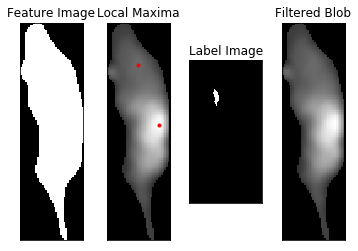

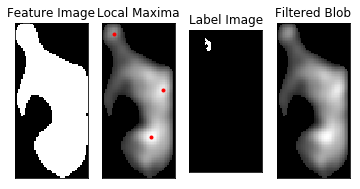

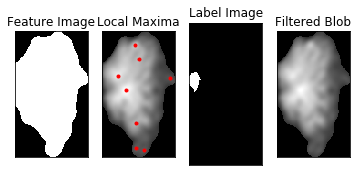

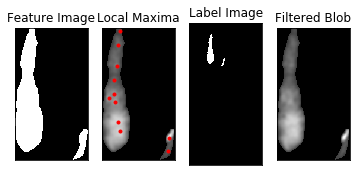

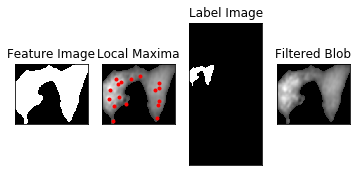

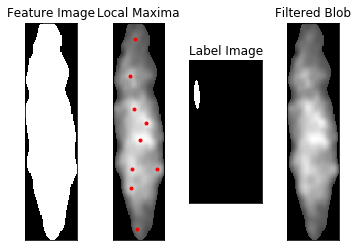

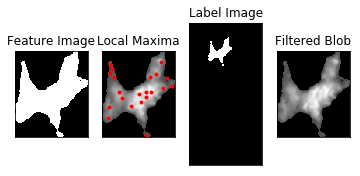

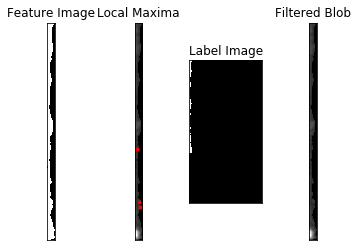

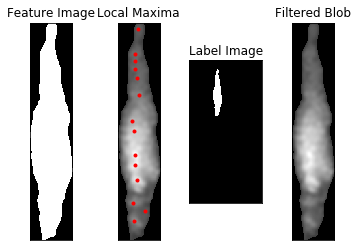

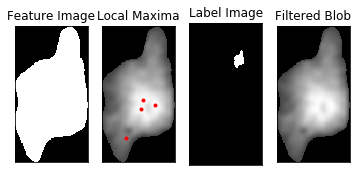

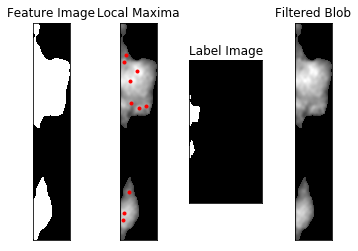

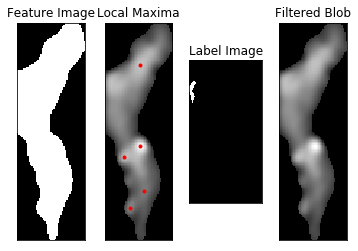

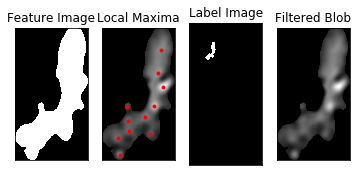

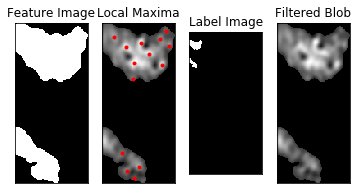

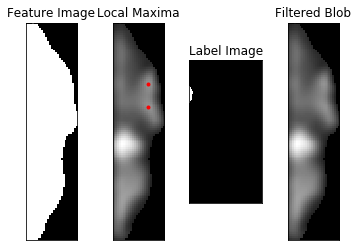

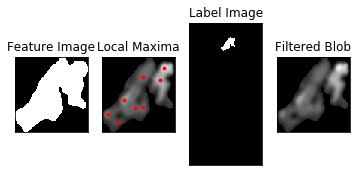

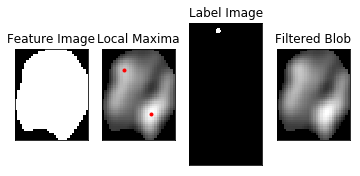

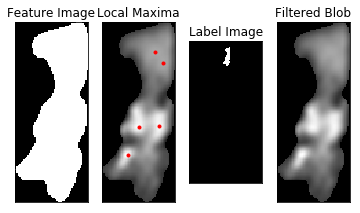

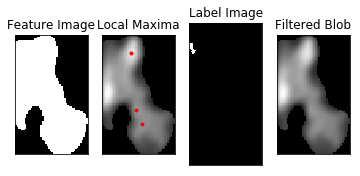

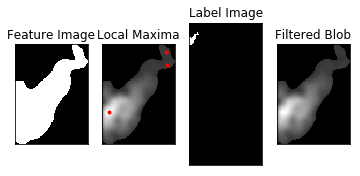

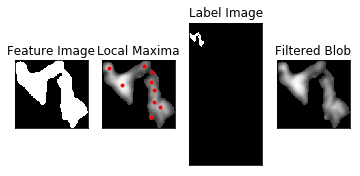

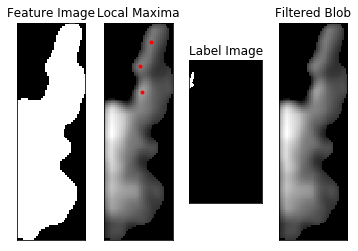

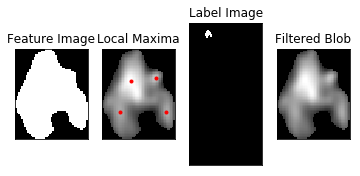

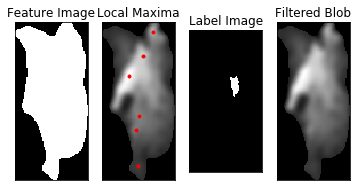

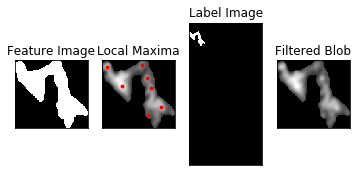

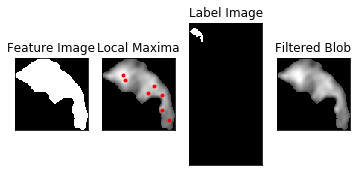

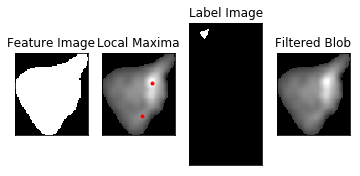

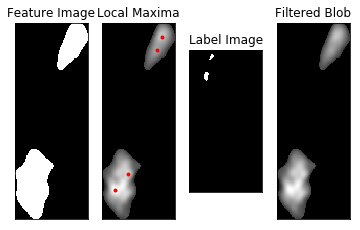

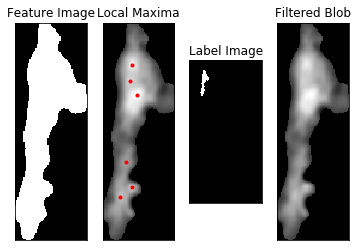

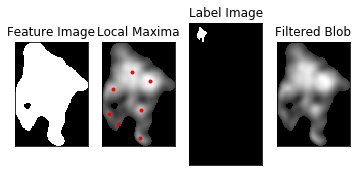

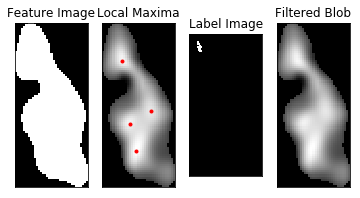

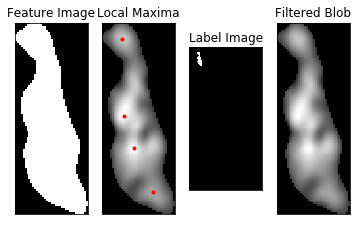

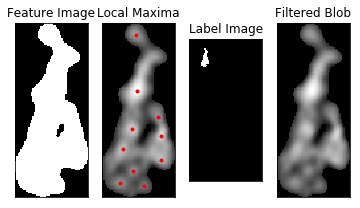

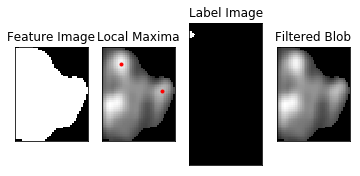

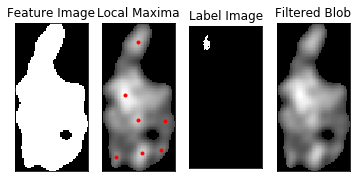

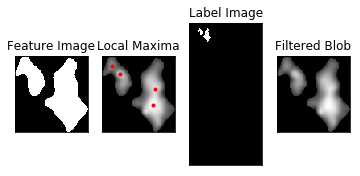

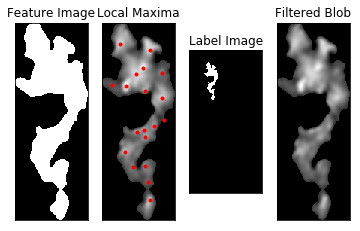

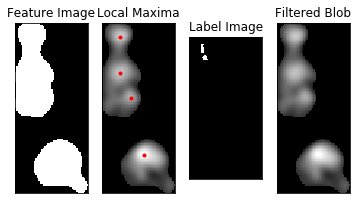

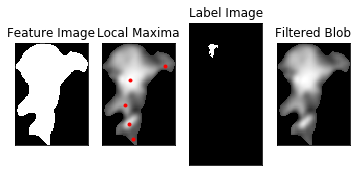

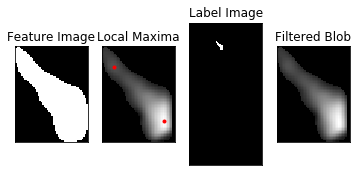

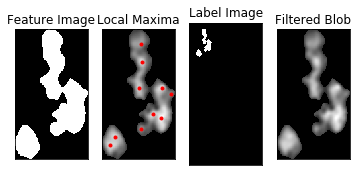

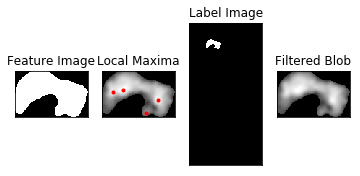

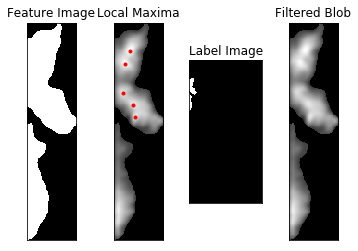

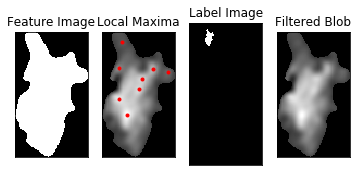

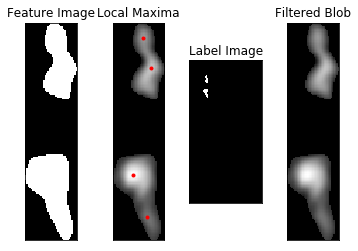

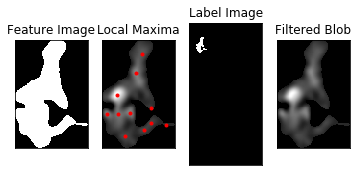

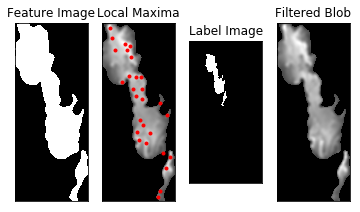

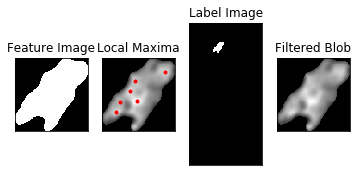

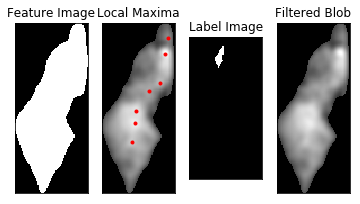

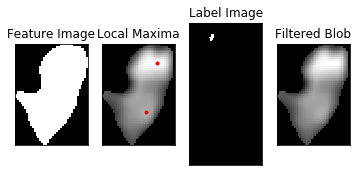

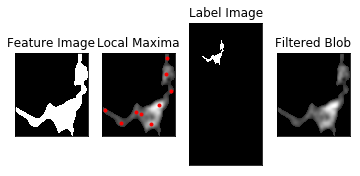

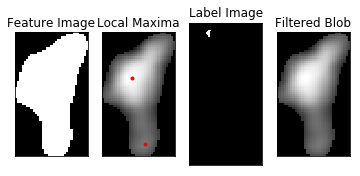

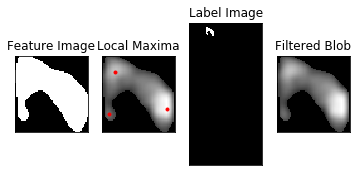

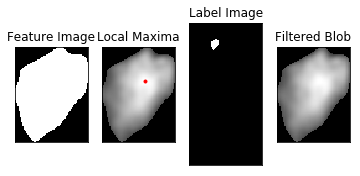

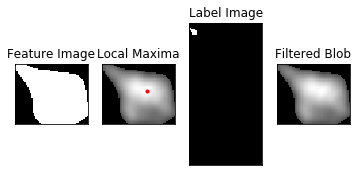

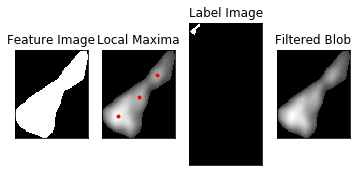

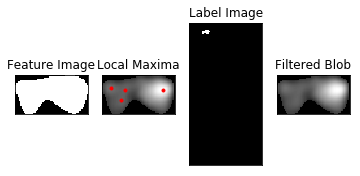

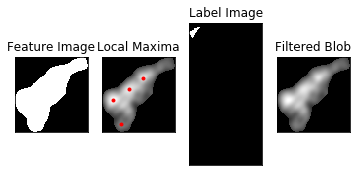

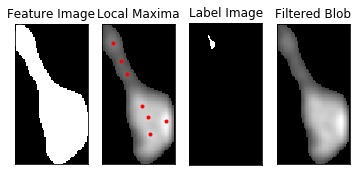

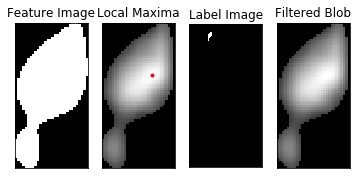

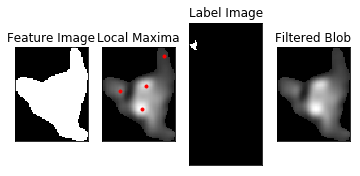

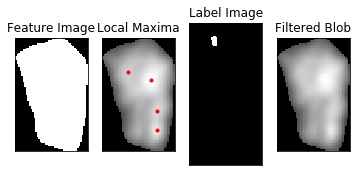

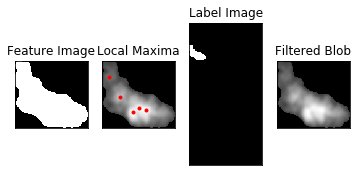

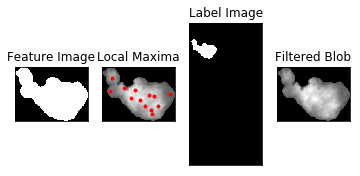

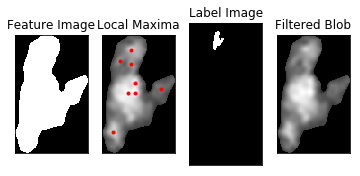

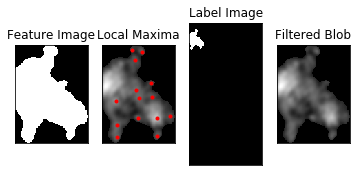

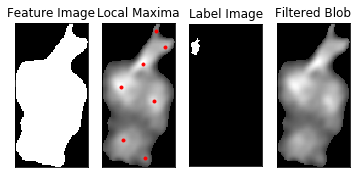

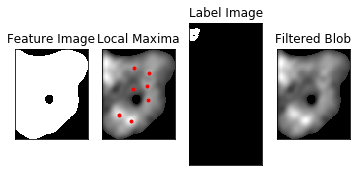

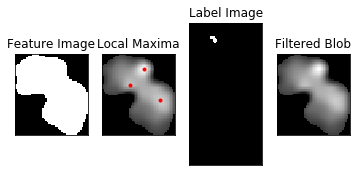

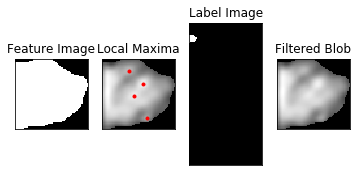

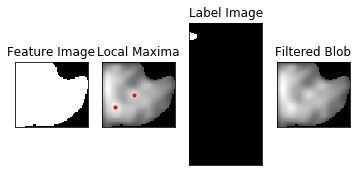

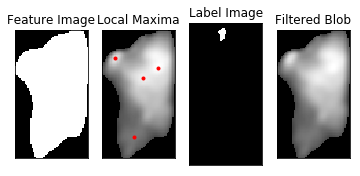

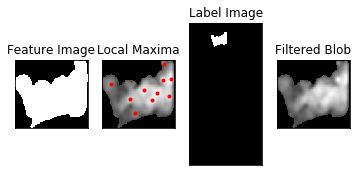

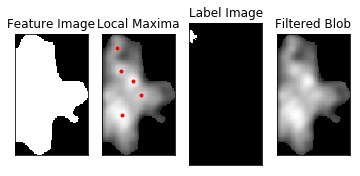

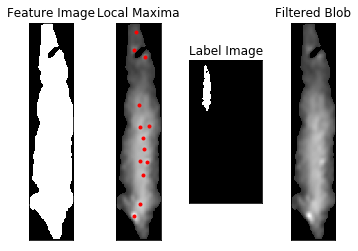

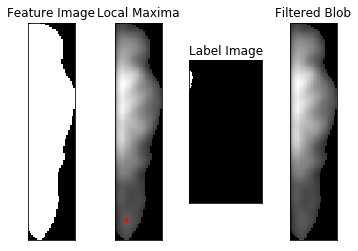

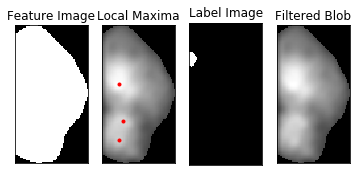

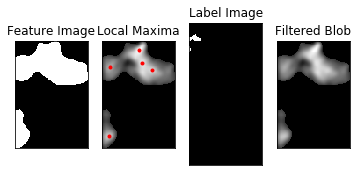

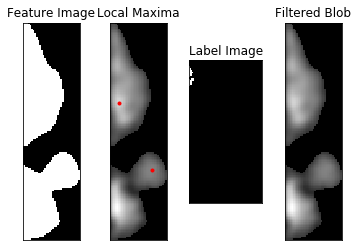

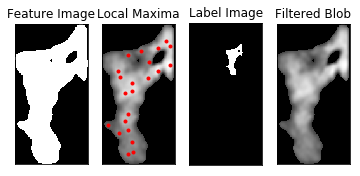

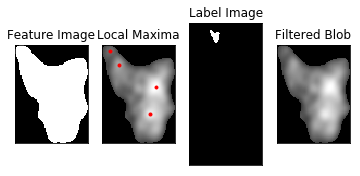

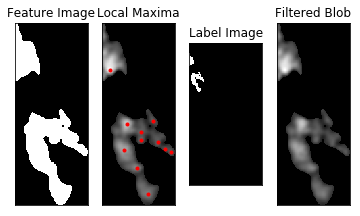

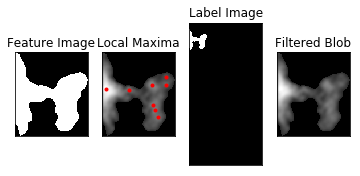

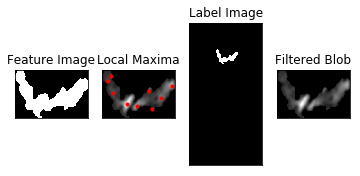

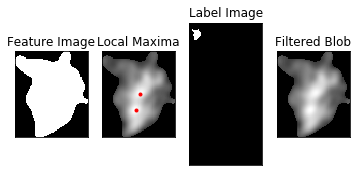

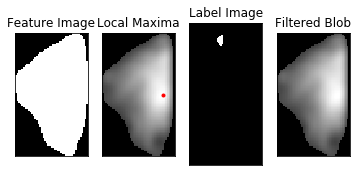

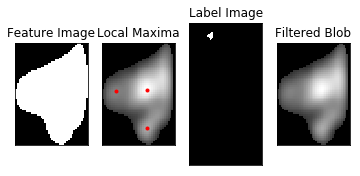

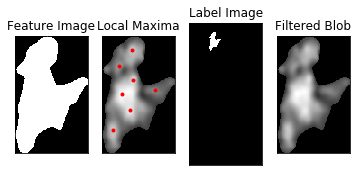

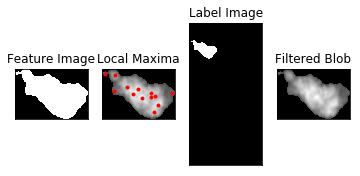

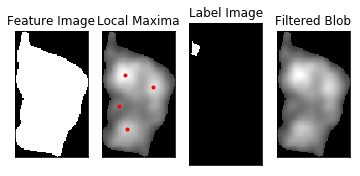

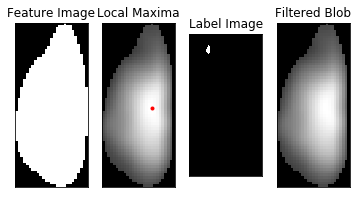

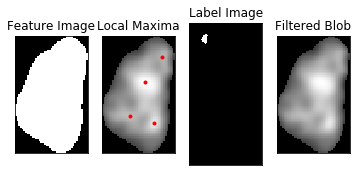

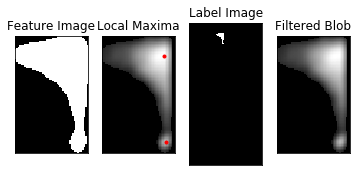

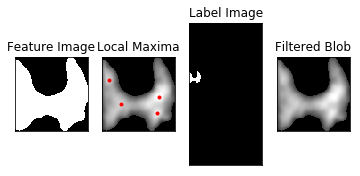

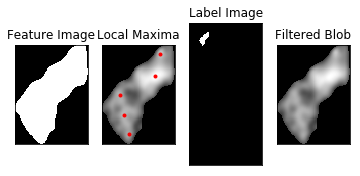

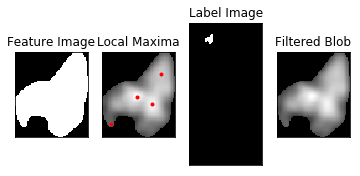

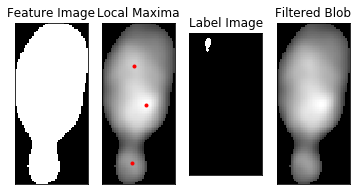

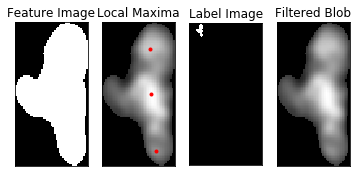

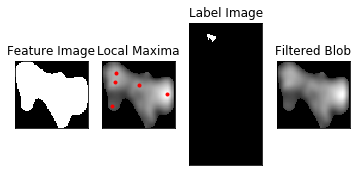

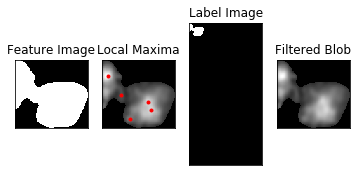

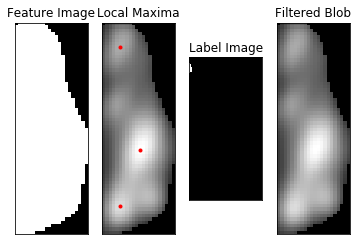

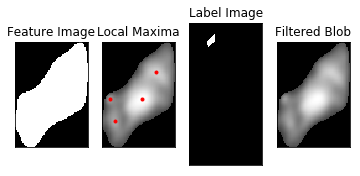

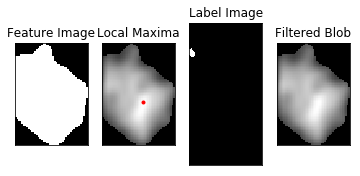

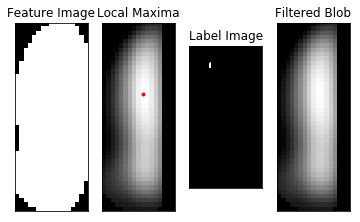

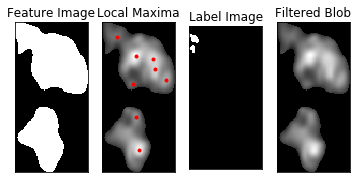

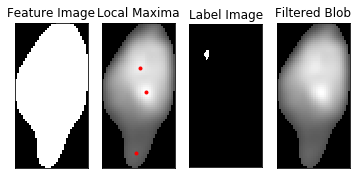

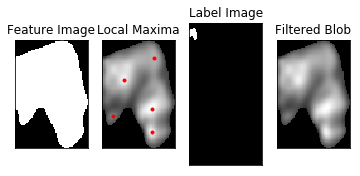

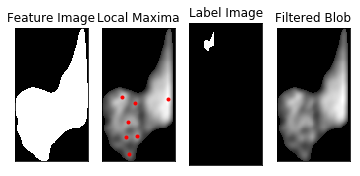

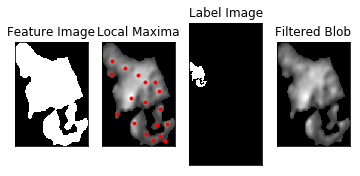

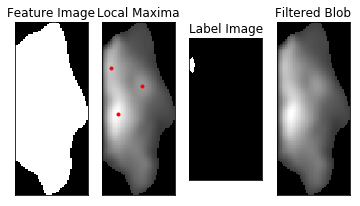

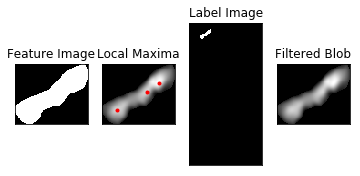

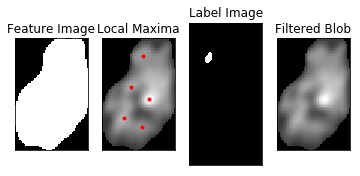

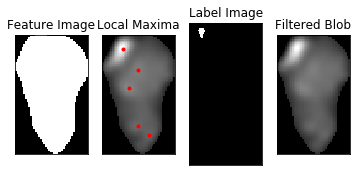

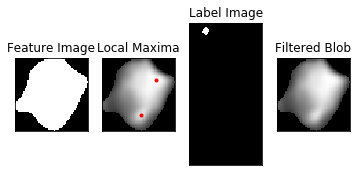

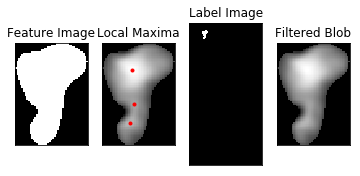

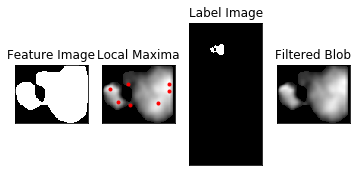

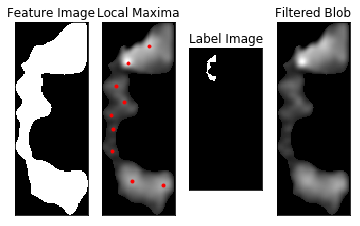

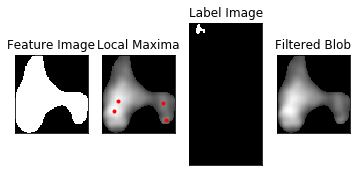

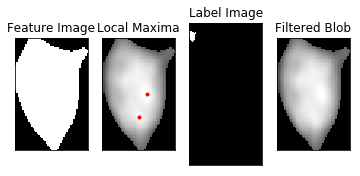

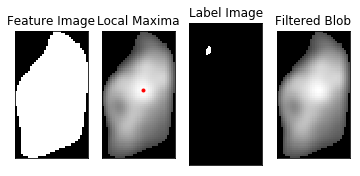

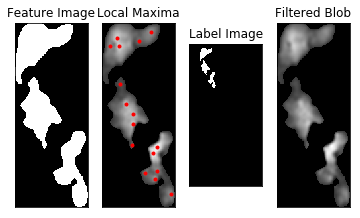

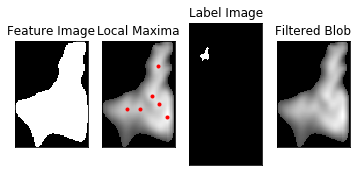

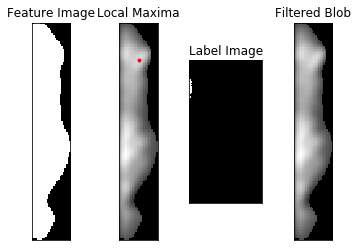

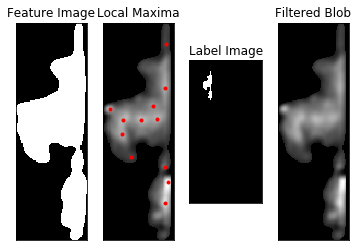

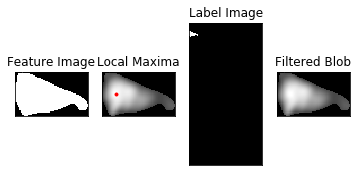

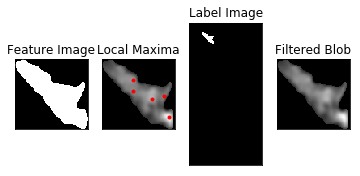

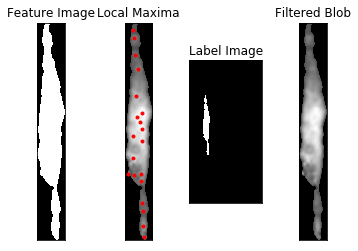

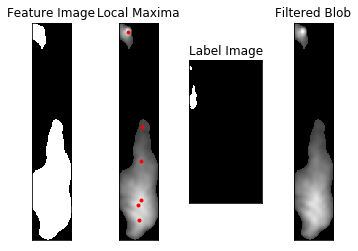

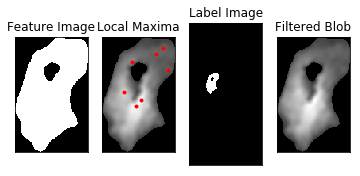

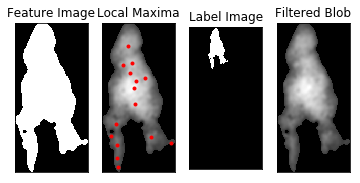

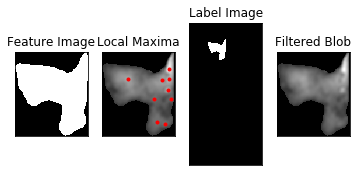

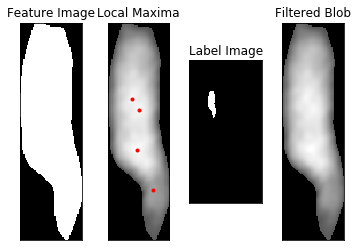

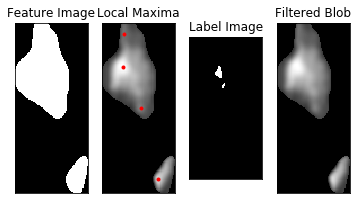

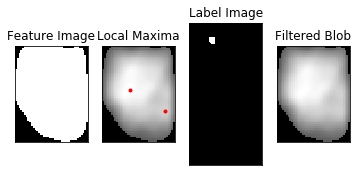

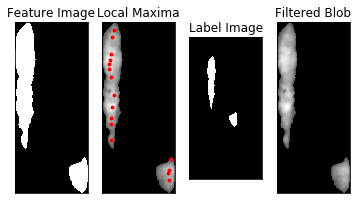

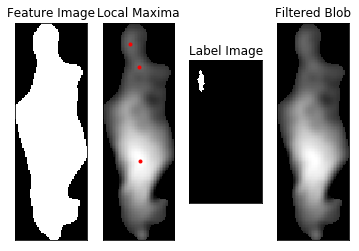

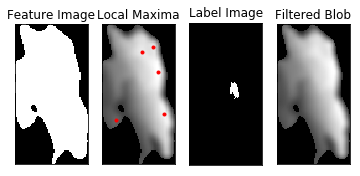

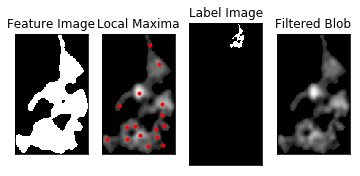

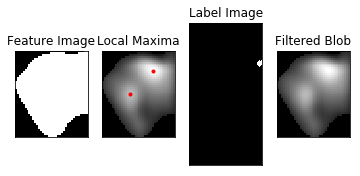

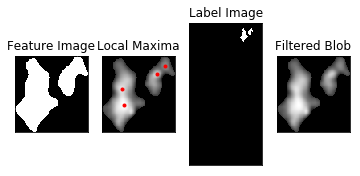

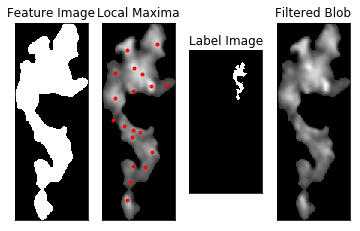

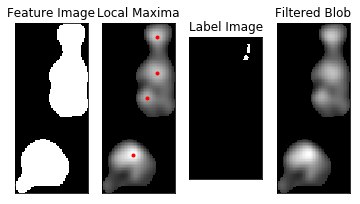

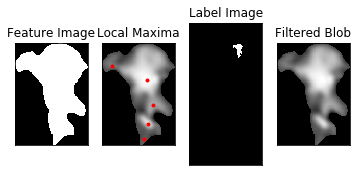

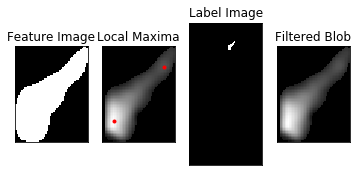

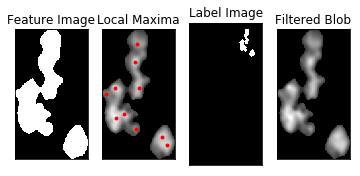

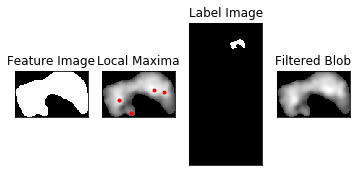

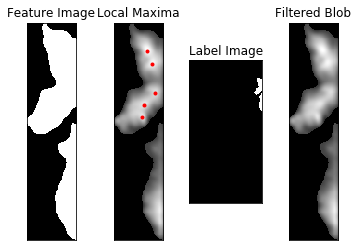

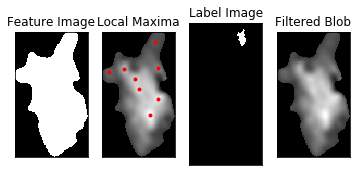

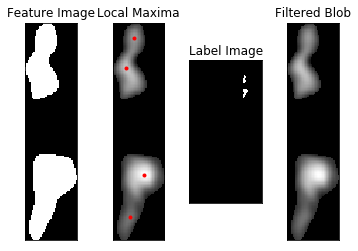

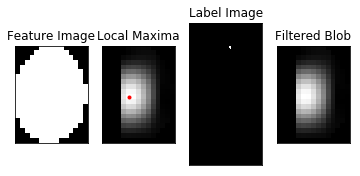

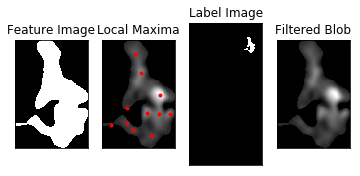

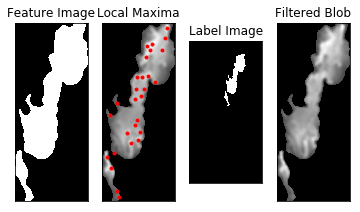

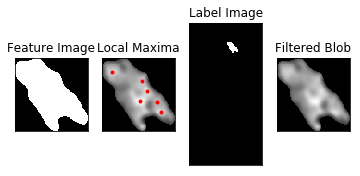

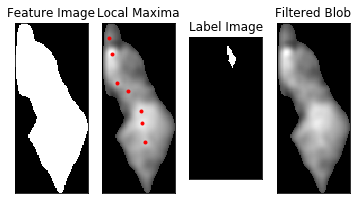

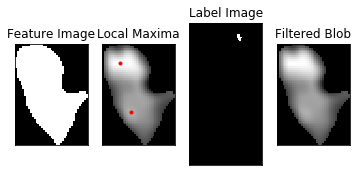

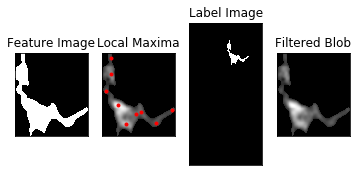

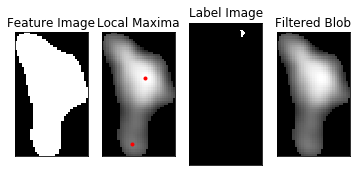

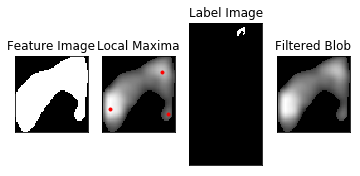

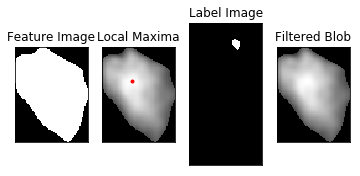

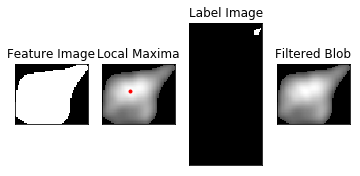

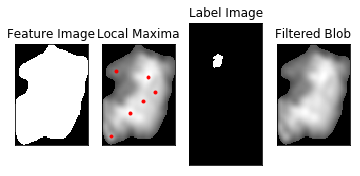

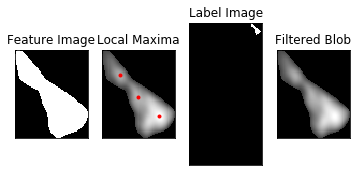

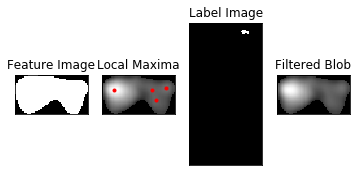

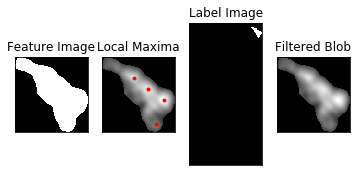

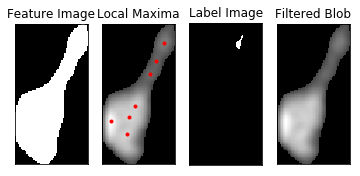

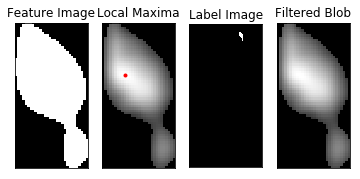

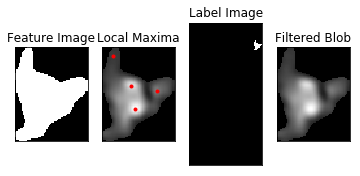

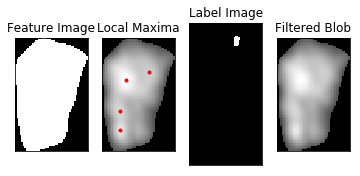

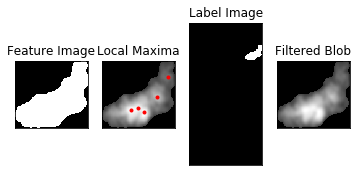

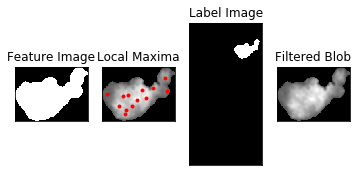

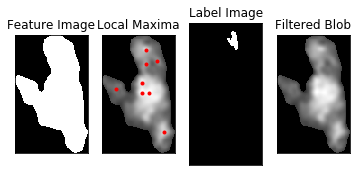

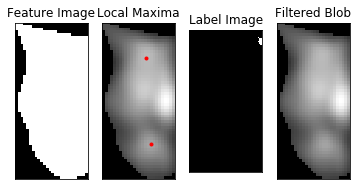

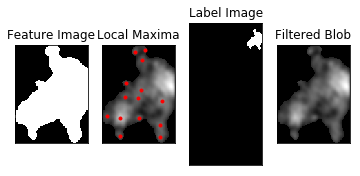

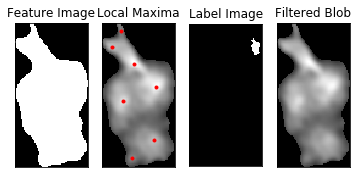

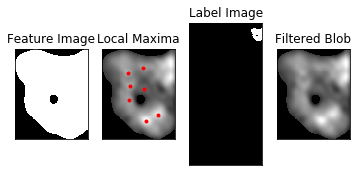

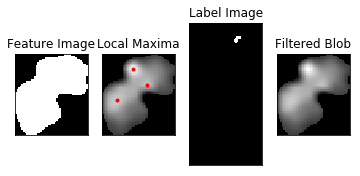

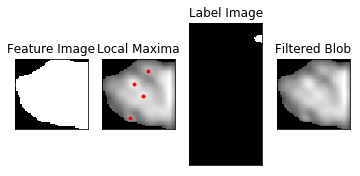

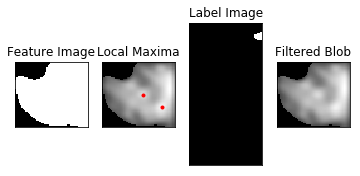

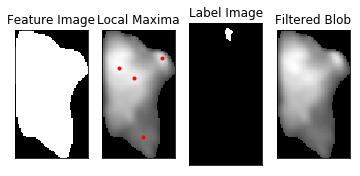

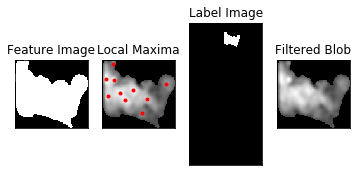

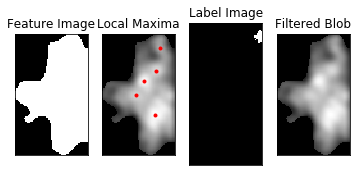

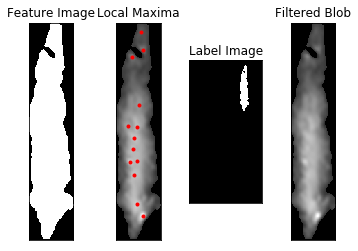

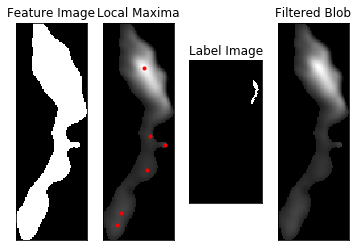

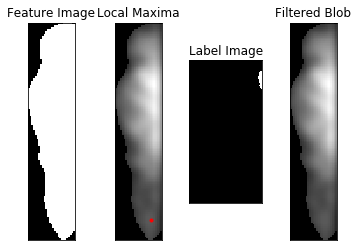

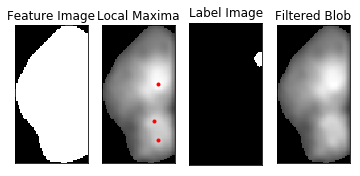

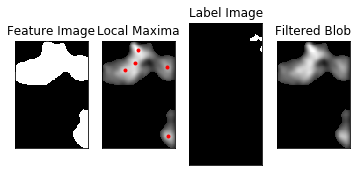

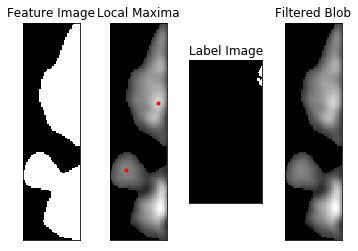

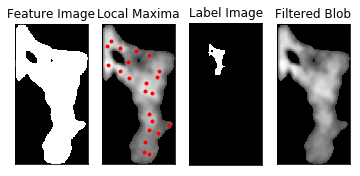

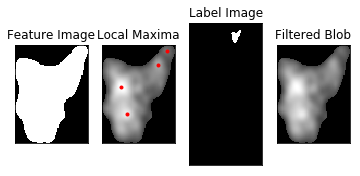

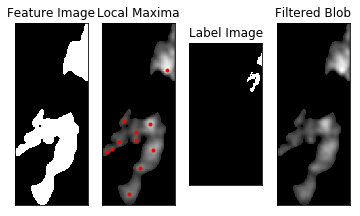

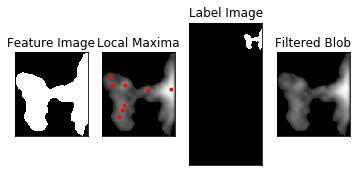

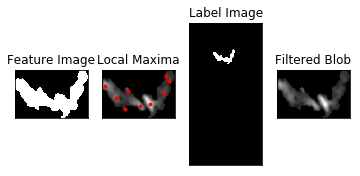

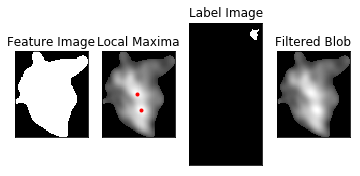

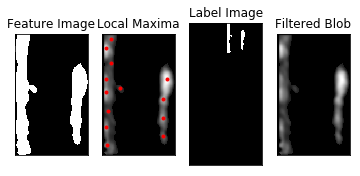

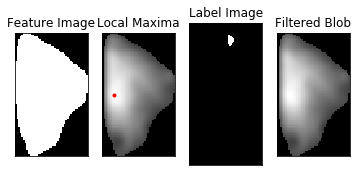

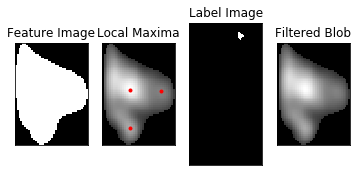

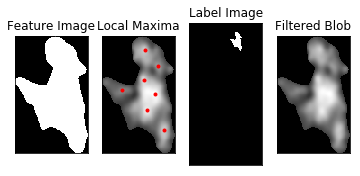

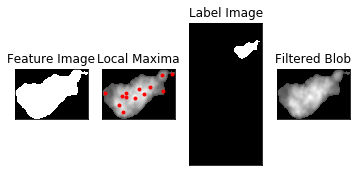

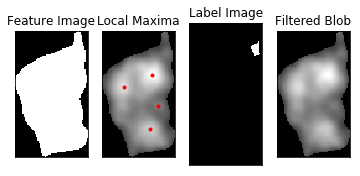

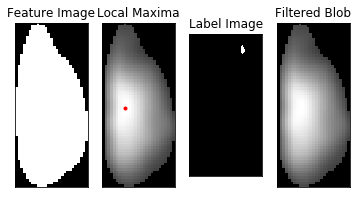

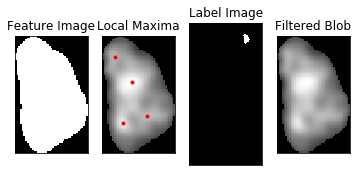

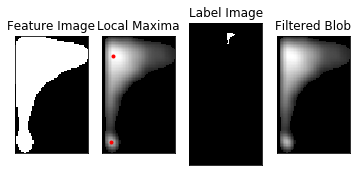

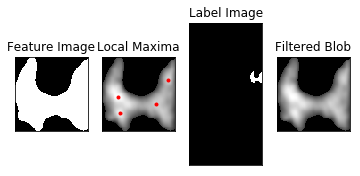

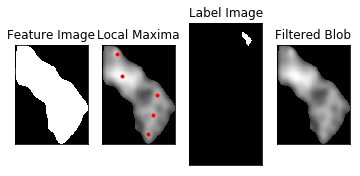

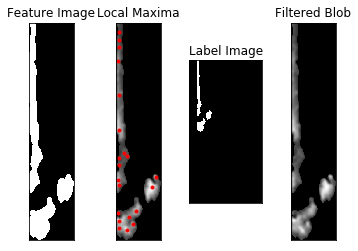

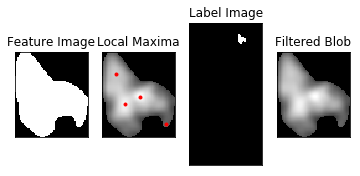

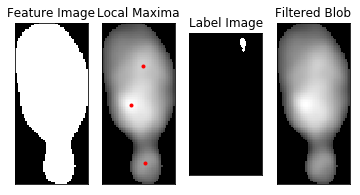

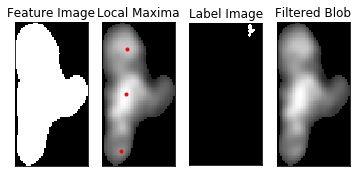

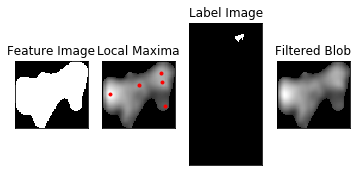

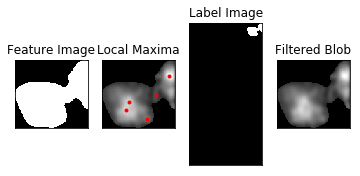

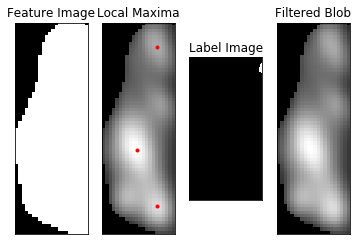

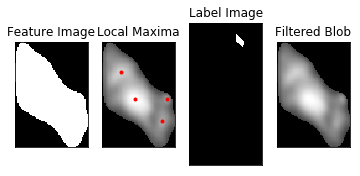

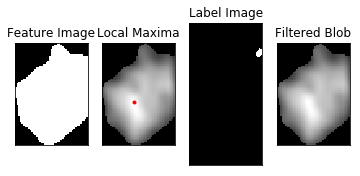

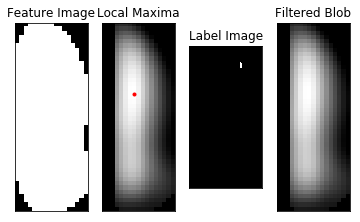

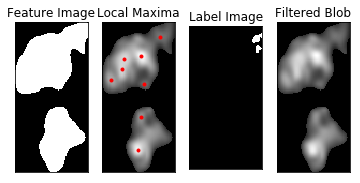

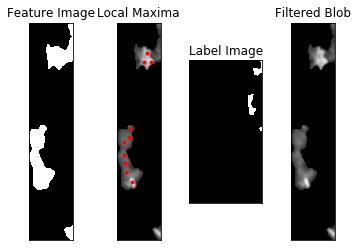

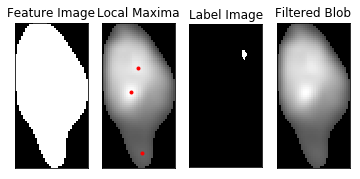

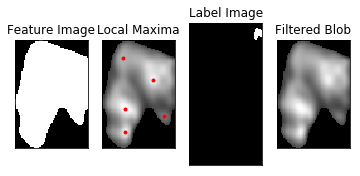

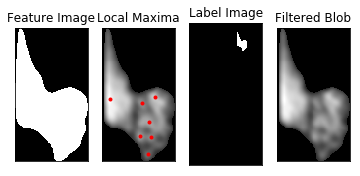

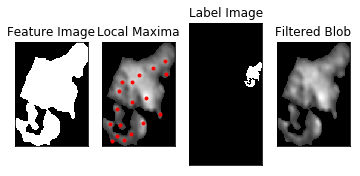

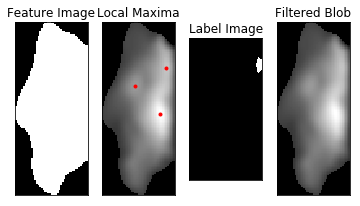

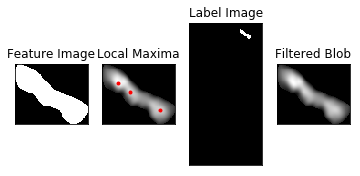

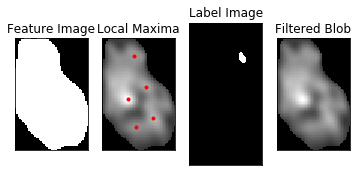

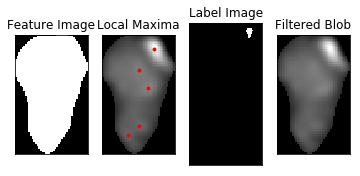

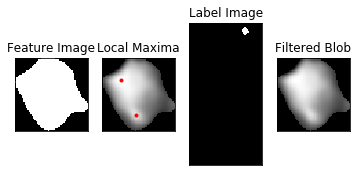

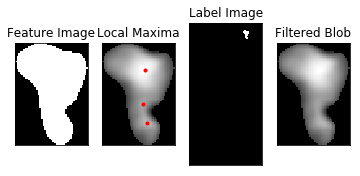

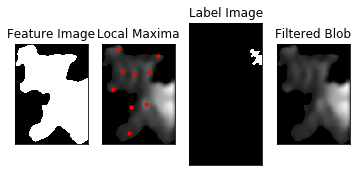

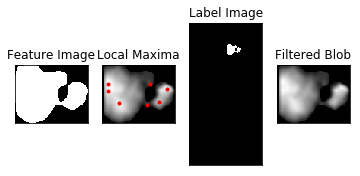

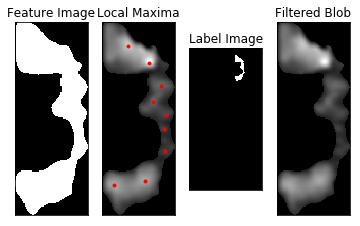

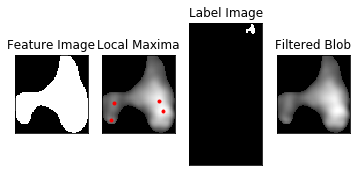

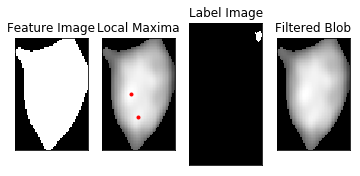

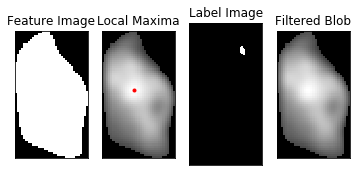

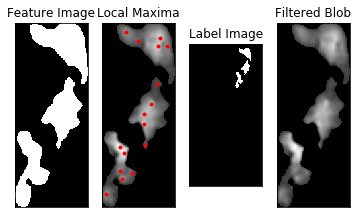

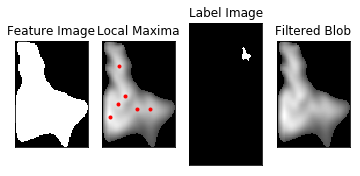

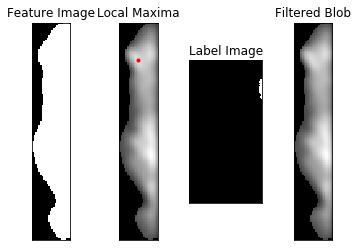

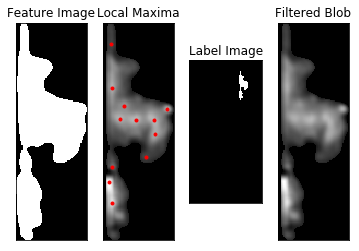

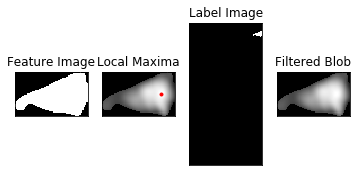

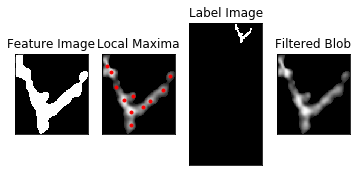

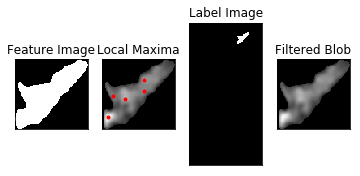

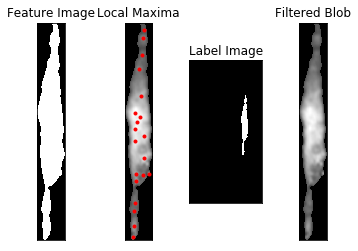

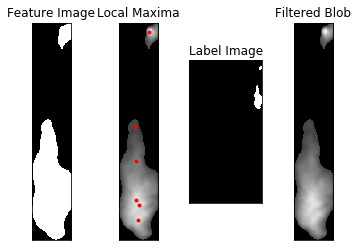

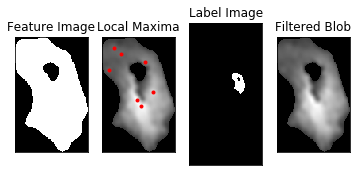

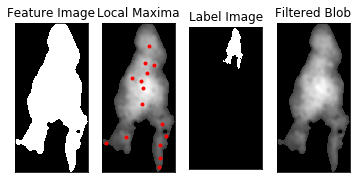

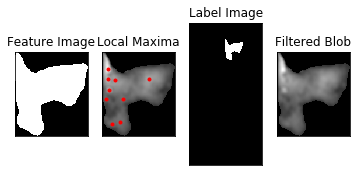

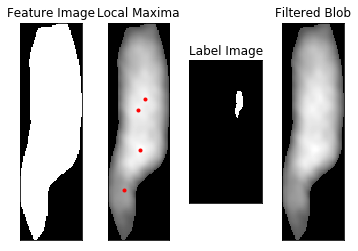

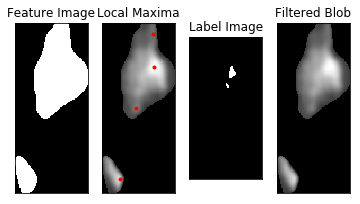

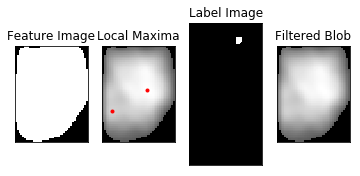

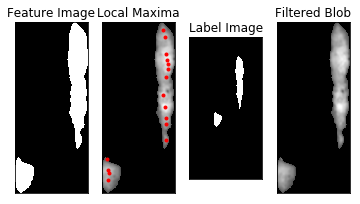

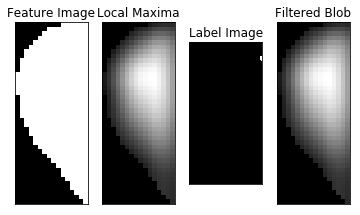

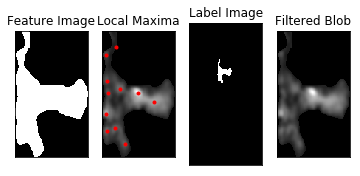

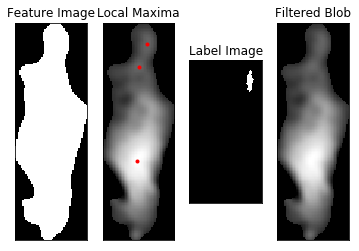

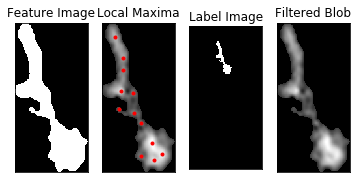

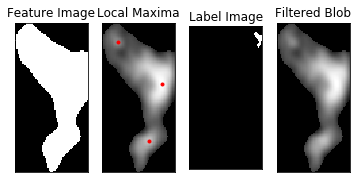

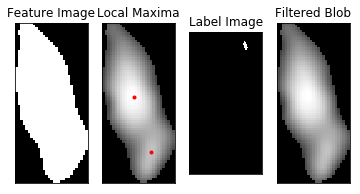

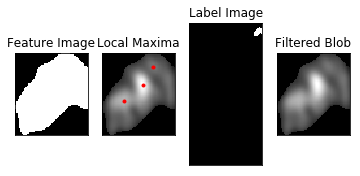

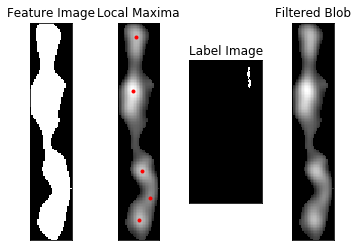

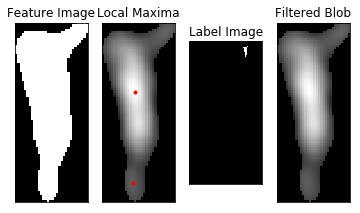

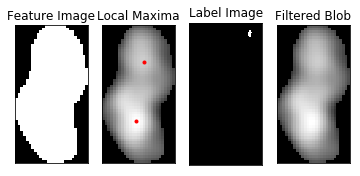

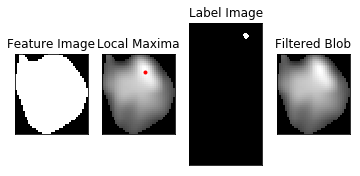

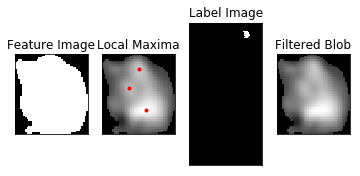

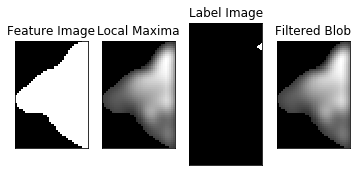

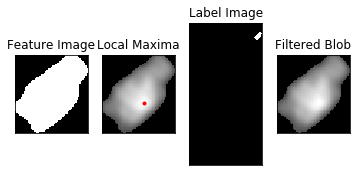

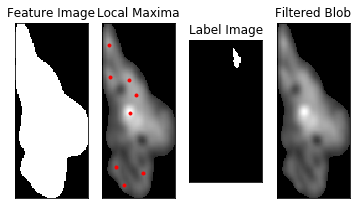

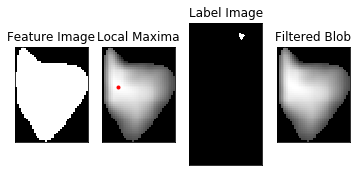

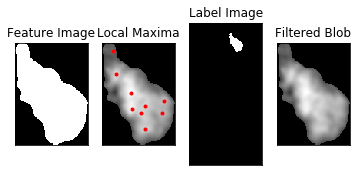

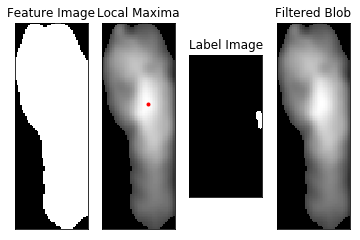

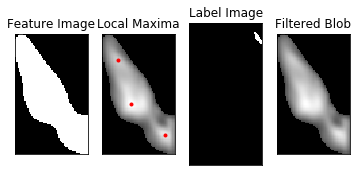

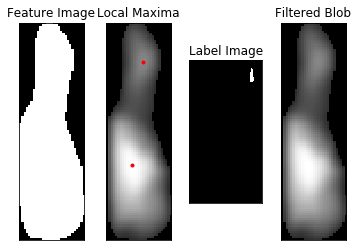

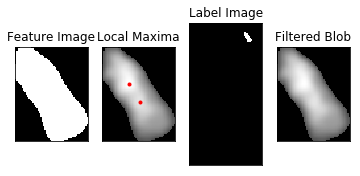

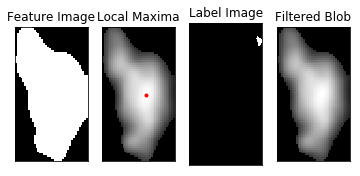

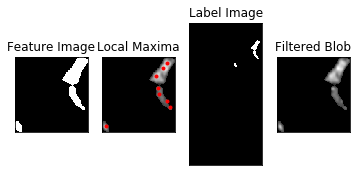

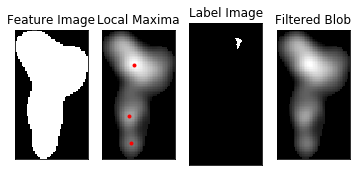

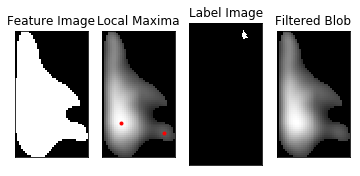

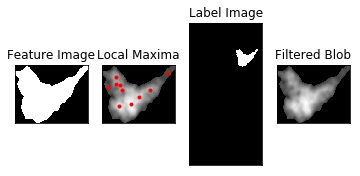

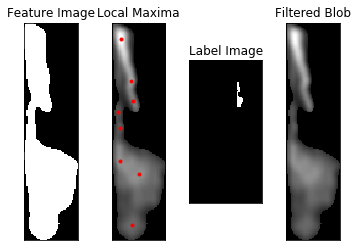

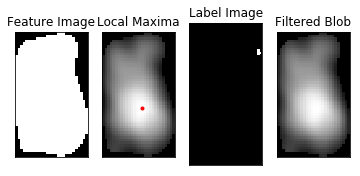

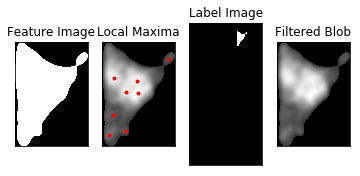

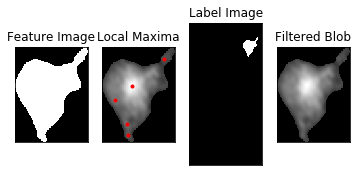

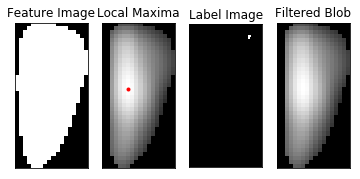

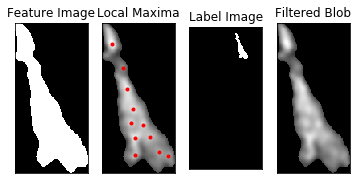

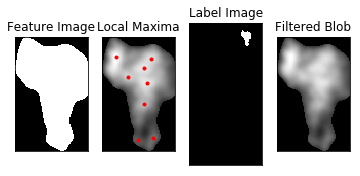

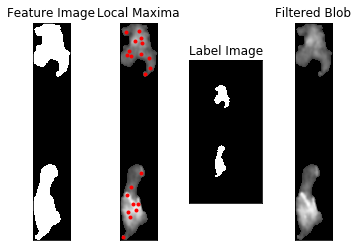

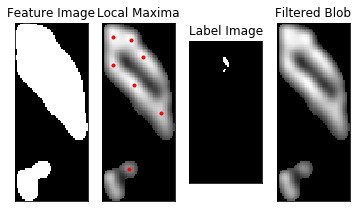

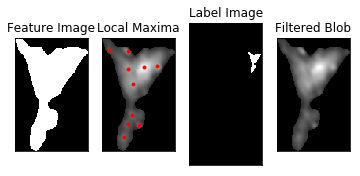

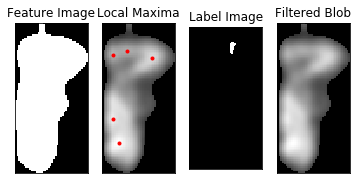

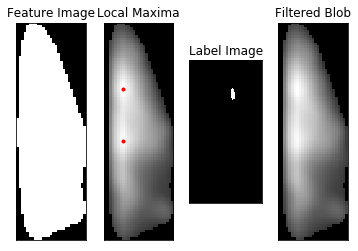

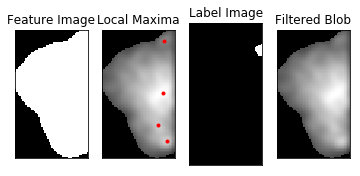

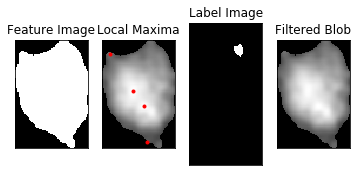

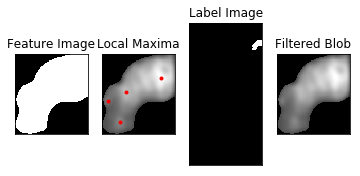

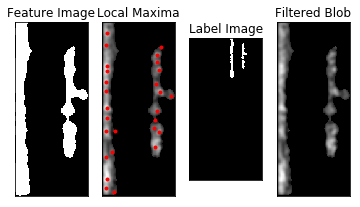

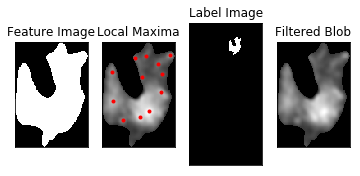

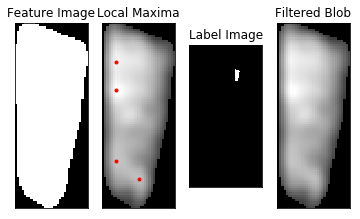

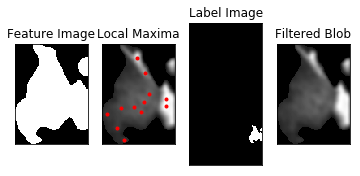

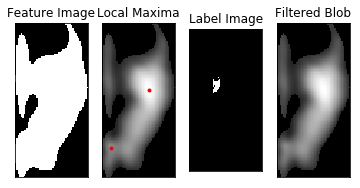

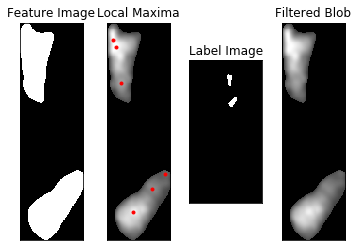

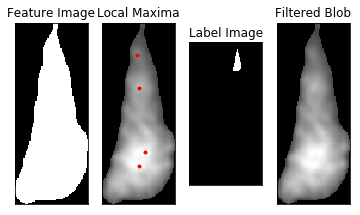

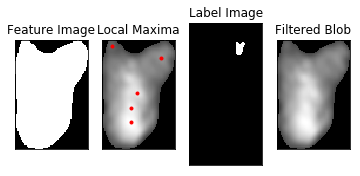

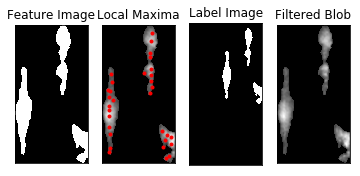

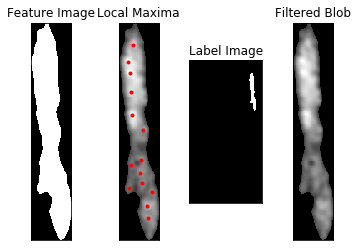

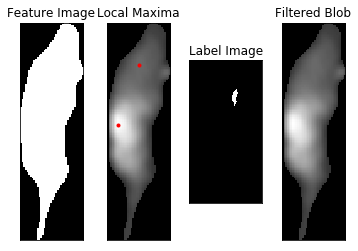

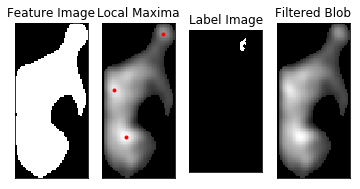

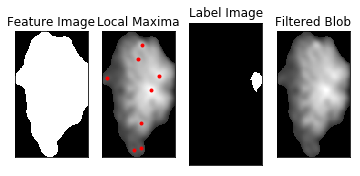

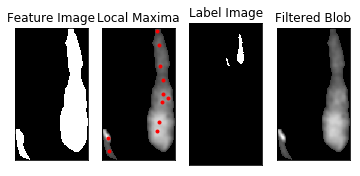

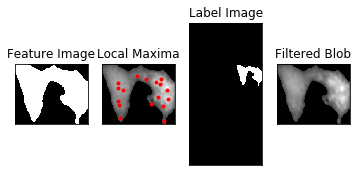

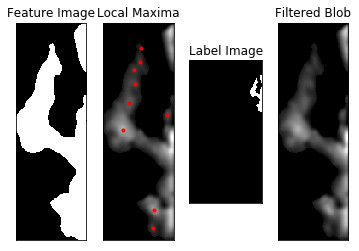

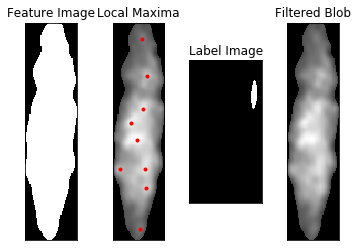

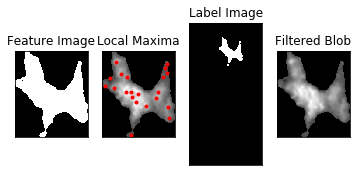

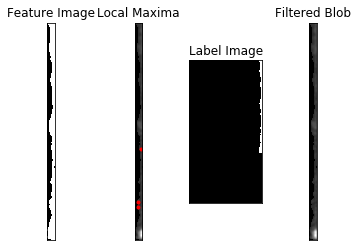

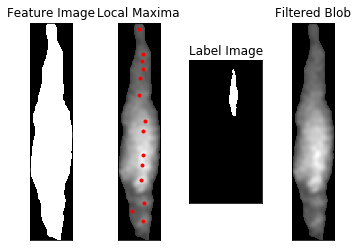

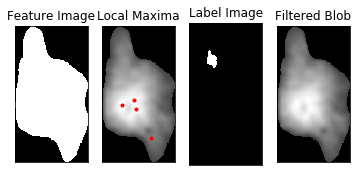

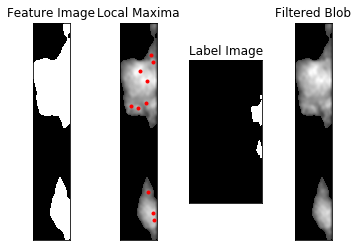

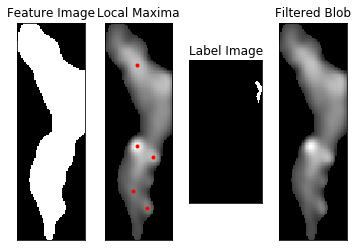

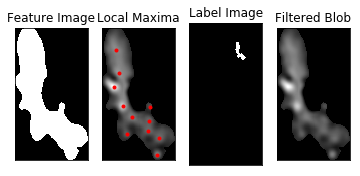

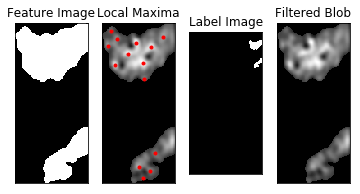

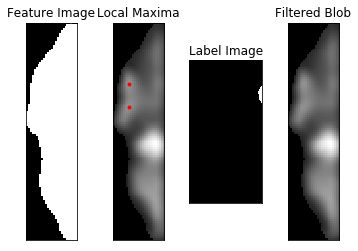

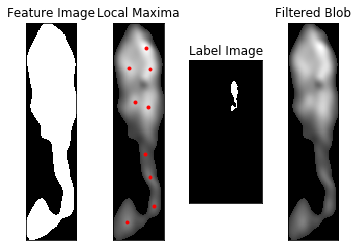

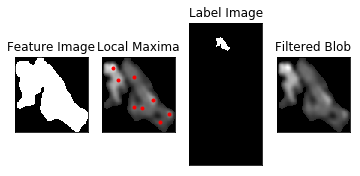

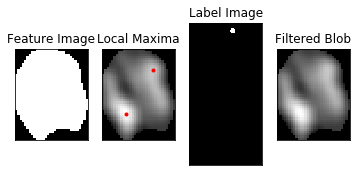

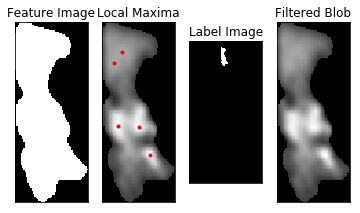

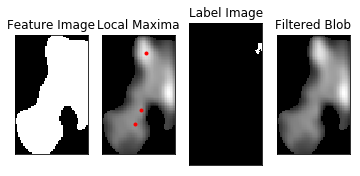

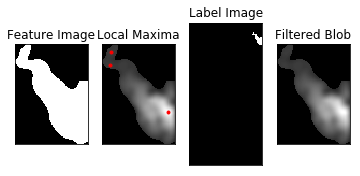

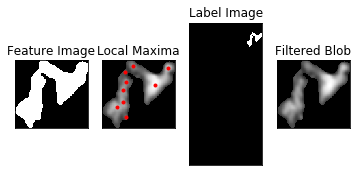

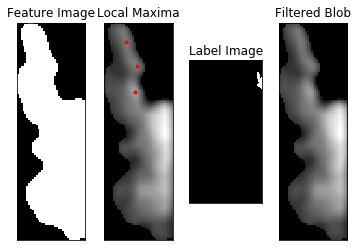

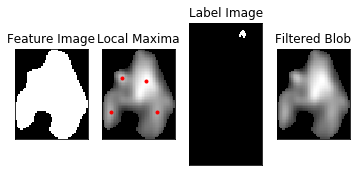

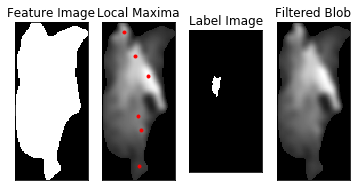

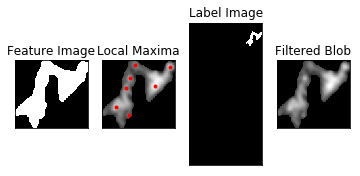

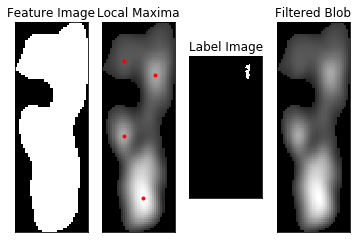

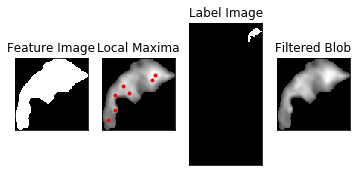

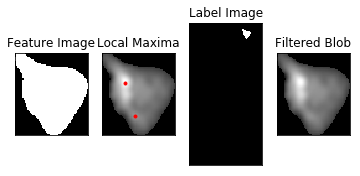

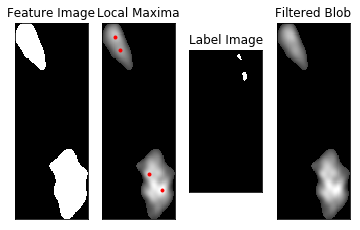

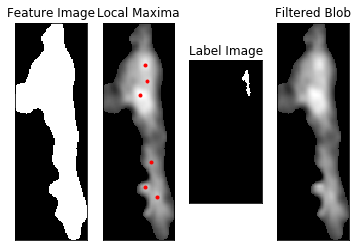

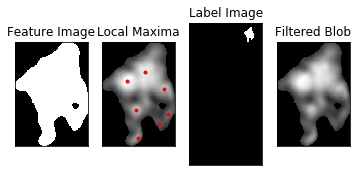

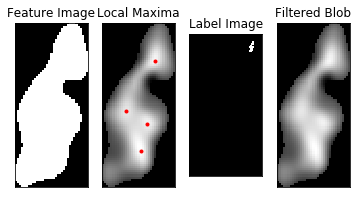

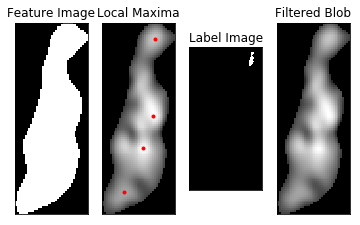

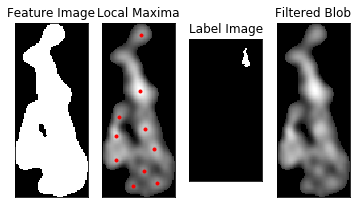

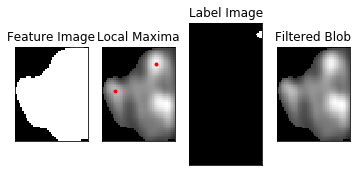

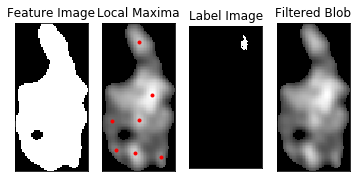

In [11]:
img_features = []

eccentricity = []
euler_number = []
extent = []
inertia_tensor = []

intensity_img = []
mask_img = []

mean_intensity = []

moments = []

orientation = []
perimeter = []

area = []
volume = []

sd = []
num_local_peaks = []

cropped_imgs = []
img_details = []

for i in range(len(masked_imgs)):
    features = measure.regionprops(img_masks[i].astype(int),masked_imgs[i])
    
    region = features[0]
    
    img_detail = {}
    
    eccentricity.append(region.eccentricity)
    euler_number.append(region.euler_number)
    extent.append(region.extent)
    inertia_tensor.append(region.inertia_tensor)
    
    intensity_img.append(region.intensity_image)
    mask_img.append(region.image)
    
    mean_intensity.append(region.mean_intensity)
    moments.append(region.moments)
    
    orientation.append(region.orientation)
    perimeter.append(region.perimeter)
    
    area.append(region.area)
    volume.append(masked_imgs[i].sum())
    
    sd.append(np.std(intensity_img[i]))
    
    # We find all local maxima
    '''local_maxima = extrema.local_maxima(intensity_img[i])
    label_maxima = label(local_maxima)
    overlay = color.label2rgb(label_maxima, intensity_img[i], alpha=0.7, bg_label=0,
                              bg_color=None, colors=[(1, 0, 0)])
    
    print(sum(label_maxima))'''
    
    coordinates = peak_local_max(intensity_img[i], min_distance=5)
    num_local_peaks.append(len(coordinates))
    
    #img_detail['local_maxima'] = list(coordinates)
    
    img_detail['local_maxima'] = []
    
    for a in list(coordinates):
        img_detail['local_maxima'].append(a.tolist())
    
    img_detail['moments'] = []
    
    for a in list(region.moments):
        img_detail['moments'].append(a.tolist())
    
    img_detail['inertia_tensor'] = []
    
    for a in list(region.inertia_tensor):
        img_detail['inertia_tensor'].append(a.tolist())
    
    plt.subplot(141),plt.imshow(region.image,cmap = 'gray')
    plt.title('Feature Image'), plt.xticks([]), plt.yticks([])
    #plt.subplot(142),plt.imshow(label_maxima,cmap = 'gray')
    plt.subplot(142),plt.imshow(intensity_img[i],cmap = 'gray')
    plt.plot(coordinates[:, 1], coordinates[:, 0], 'r.')
    plt.title('Local Maxima'), plt.xticks([]), plt.yticks([])
    plt.subplot(143),plt.imshow(img_masks[i],cmap = 'gray')
    plt.title('Label Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(144),plt.imshow(intensity_img[i],cmap = 'gray') #masked_imgs[i]
    plt.title('Filtered Blob'), plt.xticks([]), plt.yticks([])
    plt.show()
    
    img_features.append(features[0])
    img_details.append(img_detail)
    
df['eccentricity'] = eccentricity
df['euler_number'] = euler_number
df['extent'] = extent
df['inertia_tensor'] = inertia_tensor
df['mean_intensity'] = mean_intensity
df['moments'] = moments
df['orientation'] = orientation
df['perimeter'] = perimeter
df['volume'] = volume
df['area'] = area
df['sd'] = sd
df['num_local_peaks'] = num_local_peaks
# df['surface_area'] = surface_area

In [12]:
max_x = 0
max_y = 0

for img in intensity_img:
    max_x = max(max_x, img.shape[0])
    max_y = max(max_y, img.shape[1])

for i in range(len(intensity_img)):
    m = intensity_img[i]
    img = np.pad(np.copy(m), ((0,max_x-m.shape[0]),(0,max_y-m.shape[1])), 'constant', constant_values=(0))
    name = df['name'][i]
    
    if save_plt:
        np.save(f"{dest_path}\cropped\{name}.npy",img)

In [13]:
print(list(df))

['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'name', 'date', 'flow_rate', 'source', 'peak_val', 'area', 'volume', 'eccentricity', 'euler_number', 'extent', 'mean_intensity', 'moments', 'orientation', 'perimeter', 'inertia_tensor', 'cluster', 'num_peaks', 'sd', 'num_local_peaks']


In [21]:
df.head()

name        date  flow_rate                 source   peak_val  area  \
0    0  2017.11.09       1800  chip2_02heightmap.mat  58.496427  4489   
1    1  2017.11.09       1800  chip2_03heightmap.mat   5.237538  6324   
2    2  2017.11.09       1800  chip2_04heightmap.mat  16.623206   443   
3    3  2017.11.09       1800  chip2_05heightmap.mat  12.465707  1054   
4    4  2017.11.09       1800  chip2_06heightmap.mat   4.629928  1929   

          volume  eccentricity  euler_number    extent  mean_intensity  \
0  152983.389556      0.866207             0  0.673316       34.079615   
1   10642.551390      0.871961            -1  0.383273        1.682883   
2    3682.088758      0.902466             1  0.692187        8.311713   
3    6977.762945      0.615661             1  0.552411        6.620268   
4    3566.980825      0.871295             1  0.562063        1.849135   

                                             moments  orientation   perimeter  \
0  [[4489.0, 235521.0, 15668235.0, 1173875229.0],...     1.309976  365.220346   
1  [[6324.0, 659633.0, 78156101.0, 9945709871.0],...    -1.266807  732.523953   
2  [[443.0, 7342.0, 161000.0, 4054708.0], [2628.0...     1.470180   94.526912   
3  [[1054.0, 28070.0, 886760.0, 30910334.0], [127...    -1.477930  148.225397   
4  [[1929.0, 63756.0, 2846930.0, 149169090.0], [4...    -1.543902  209.095454   

                                      inertia_tensor  cluster  num_peaks  \
0  [[232.59219643413306, 145.14005796501348], [14...        0          1   
1  [[488.4762156984758, -344.6067622224463], [-34...        1          1   
2  [[17.340786449867274, 7.283970873736935], [7.2...        0          1   
3  [[82.71136251525773, -4.637329915133083], [-4....        0          1   
4  [[92.61777389714315, -7.829650089853888], [-7....        1          1   

          sd  num_local_peaks  
0  19.032488                5  
1   0.961866               16  
2   5.236119                0  
3   3.834650                0  
4   1.191269                3

In [20]:
if save_plt:
    df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])
    df.to_csv(dest_path+id_file_name)

In [18]:
if save_plt:
    with open(dest_path+json_file_name, 'w') as outfile:
        json.dump(img_details, outfile)